Running Model-8: 4500it [00:04, 1046.25it/s]<?, ?it/s]
Running Model-8: 100%|██████████| 1/1 [00:04<00:00,  4.37s/it]


Fitting node Ridge-8...


Running Model-8: 490it [00:00, 1169.02it/s]           


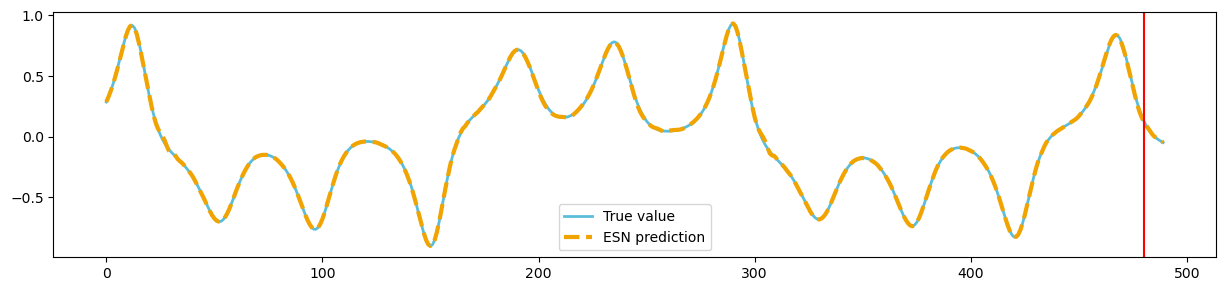

In [12]:
#Для построения архитектуры ESN использовалась библиотека reservoirPy, основанная на графовых вычислениях
import numpy as np
import math
import matplotlib.pyplot as plt
from reservoirpy.datasets import to_forecasting # разбиение на train/test
import reservoirpy as rpy
from reservoirpy.nodes import Reservoir, Ridge #узлы резервуара и считывающего слоя
from reservoirpy.observables import nrmse, rsquare
import json
from scipy.integrate import solve_ivp

length = 5000
train = 4500
forecast = 10

###ПОДГОТОВКА ДАННЫХ
#9
import warnings
from nolitsa import data

dt = 0.01
x0 = [0.1, -0.1, 1.0]

#000
x1 = data.lorenz(length=6500, sample=dt, x0=x0,
               sigma=16.0, beta=4.0, rho=45.92)[1]

#11
import copy
time = copy.deepcopy(x1) 
X1 = time[:,0] 
X1 = X1.reshape(6500,1) 
X1 = 2 * (X1 - X1.min()) / (X1.max() - X1.min()) - 1 
#000
    
X = X1[:5000]
    
###HERE0
from reservoirpy.datasets import to_forecasting

x, y = to_forecasting(X, forecast=forecast)

X_train1, y_train1 = x[:train], y[:train]
X_test1, y_test1 = x[train:], y[train:]

units = 830
leak_rate = 0.55
spectral_radius = 0.6
input_scaling = 3.
connectivity = 0.51
input_connectivity = 0.51
regularization = 1.e-08
seed = 1934

#узел резервуара
reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                      lr=leak_rate, rc_connectivity=connectivity,
                      input_connectivity=input_connectivity, seed=seed)
#выходной слой(считывающее устройство)
readout = Ridge(1, ridge=regularization) # 1 - кол-во выходных нейронов
#соединяем узлы и таким образом получаем модель 
esn = reservoir >> readout

#обучение модели
esn = esn.fit(X_train1, y_train1)
#делаем предсказание
y_pred1 = esn.run(X_test1, reset=False)

def results(y_pred, y_test):
    fig = plt.figure(figsize=(15, 7))
    ax = plt.subplot(211)
    #ax.plot(np.arange(sample), y_test[len(y_test)-sample:], lw=2, label="True value", color="black")
    #ax.plot(np.arange(sample), y_pred[len(y_pred)-sample:], lw=3, label="ESN prediction", color="gray", linestyle="--")

    ax.plot(np.arange(len(y_test)), y_test, lw=2, label="True value", color="#5cbdd9")
    ax.plot(np.arange(len(y_pred)), y_pred, lw=3, label="ESN prediction", color="#f1a300", linestyle="--")
    ax.axvline(x=len(y_test)-forecast, color="red")  # Add vertical line
    ax.legend()
    plt.show()

results(y_pred1, X[train+forecast:])
###HERE1

In [16]:
def rmse(x_test, x_sim):
        res = 0
        for i in range(len(x_sim)):
            res = res + (x_sim[i] - x_test[i])**2
        res = math.sqrt(res/len(x_sim))
        return res

rmse(y_pred1[-100:], X[-100:])

C:\Users\nicks\AppData\Local\Temp\ipykernel_7176\561460902.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim))


0.08999638206423798

In [17]:
BestRmse = 0.08999638206423798
BestHyp = np.empty((8, 1))

BestHyp[0] = 830
BestHyp[1] = 0.55
BestHyp[2] = 0.6
BestHyp[3] = 3.
BestHyp[4] = 0.51
BestHyp[5] = 0.51
BestHyp[6] = 1.e-08
BestHyp[7] = 1934

units = 830
leak_rate = 0.55
spectral_radius = 0.6
input_scaling = 3.
connectivity = 0.51
input_connectivity = 0.51
regularization = 1.e-08
seed = 1934

In [18]:
Units = np.arange(700, 850, 50)
Leak_rate = np.arange(0.4, 0.6, 0.1)
Spectral_radius = np.arange(0.5, 0.7, 0.1)
Input_scaling = np.arange(2.5, 4.0, 0.5)
Connectivity = np.arange(0.51, 0.71, 0.1)
Input_connectivity = np.arange(0.51, 0.81, 0.1)
Regularization = np.arange((1.e-08)-1, (1.e-08)+1, 1.0)
Seed = np.arange(1734, 2434, 400)

In [19]:
print(Units.shape)
print(Leak_rate.shape)
print(Spectral_radius.shape) 
print(Input_scaling.shape) 
print(Connectivity.shape) 
print(Input_connectivity.shape) 
print(Regularization.shape) 
print(Seed.shape) 

(3,)
(2,)
(2,)
(3,)
(2,)
(4,)
(2,)
(2,)


In [20]:
for q in range(len(Units)):
    for w in range(len(Leak_rate)):
        for e in range(len(Spectral_radius)):
            for r in range(len(Input_scaling)):
                for t in range(len(Connectivity)):
                    for z in range(len(Input_connectivity)):
                        for u in range(len(Regularization)):
                            for a in range(len(Seed)):
                                #Первый тестовый набор параметров 
                                units = Units[q]
                                leak_rate = Leak_rate[w] #коэффициент утечки от 0 до 1
                                spectral_radius = Spectral_radius[e] #от 0.1 до 1
                                input_scaling = Input_scaling[r]
                                connectivity = Connectivity[t] #от 0 до 1
                                input_connectivity = Input_connectivity[z] #тоже %
                                regularization = Regularization[u]
                                seed = Seed[a]

                                #узел резервуара
                                reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                                                    lr=leak_rate, rc_connectivity=connectivity,
                                                    input_connectivity=input_connectivity, seed=seed)
                                #выходной слой(считывающее устройство)
                                readout = Ridge(1, ridge=regularization) # 1 - кол-во выходных нейронов
                                #соединяем узлы и таким образом получаем модель 
                                esn = reservoir >> readout

                                #обучение модели
                                esn = esn.fit(X_train1, y_train1)
                                #делаем предсказание
                                y_pred1 = esn.run(X_test1, reset=False)
                                #results(y_pred1, X[train+forecast:])
                                Rmse = rmse(y_pred1[-100:], X[-100:])
                                if (Rmse<BestRmse):
                                    BestRmse = Rmse
                                    BestHyp[0] = Units[q]
                                    BestHyp[1] = Leak_rate[w]
                                    BestHyp[2] = Spectral_radius[e]
                                    BestHyp[3] = Input_scaling[r]
                                    BestHyp[4] = Connectivity[t]
                                    BestHyp[5] = Input_connectivity[z]
                                    BestHyp[6] = Regularization[u]
                                    BestHyp[7] = Seed[a]


Running Model-3: 4500it [00:02, 1957.35it/s]<?, ?it/s]
Running Model-3: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


Fitting node Ridge-3...


Running Model-3: 470it [00:00, 2088.60it/s]           
C:\Users\nicks\AppData\Local\Temp\ipykernel_7176\561460902.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim))
Running Model-4: 4500it [00:02, 1720.14it/s]<?, ?it/s]
Running Model-4: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-4...


Running Model-4: 470it [00:00, 2097.62it/s]           
Running Model-5: 4500it [00:02, 2036.48it/s]<?, ?it/s]
Running Model-5: 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


Fitting node Ridge-5...


Running Model-5: 470it [00:00, 2052.36it/s]           
Running Model-6: 4500it [00:02, 1879.77it/s]<?, ?it/s]
Running Model-6: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


Fitting node Ridge-6...


Running Model-6: 470it [00:00, 1930.56it/s]           
Running Model-7: 4500it [00:02, 2106.00it/s]<?, ?it/s]
Running Model-7: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-7...


Running Model-7: 470it [00:00, 2052.47it/s]           
Running Model-8: 4500it [00:02, 2065.51it/s]<?, ?it/s]
Running Model-8: 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


Fitting node Ridge-8...


Running Model-8: 470it [00:00, 1880.08it/s]           
Running Model-9: 4500it [00:02, 2159.13it/s]<?, ?it/s]
Running Model-9: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


Fitting node Ridge-9...


Running Model-9: 470it [00:00, 1933.18it/s]           
Running Model-10: 4500it [00:02, 2138.13it/s]<?, ?it/s]
Running Model-10: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Fitting node Ridge-10...


Running Model-10: 470it [00:00, 1828.74it/s]           
Running Model-11: 4500it [00:02, 1906.09it/s]<?, ?it/s]
Running Model-11: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-11...


Running Model-11: 470it [00:00, 2238.01it/s]           
Running Model-12: 4500it [00:02, 2019.68it/s]<?, ?it/s]
Running Model-12: 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


Fitting node Ridge-12...


Running Model-12: 470it [00:00, 2195.74it/s]           
Running Model-13: 4500it [00:02, 1921.25it/s]<?, ?it/s]
Running Model-13: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-13...


Running Model-13: 470it [00:00, 1840.21it/s]           
Running Model-14: 4500it [00:02, 2016.52it/s]<?, ?it/s]
Running Model-14: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


Fitting node Ridge-14...


Running Model-14: 470it [00:00, 1137.73it/s]           
Running Model-15: 4500it [00:02, 2026.83it/s]<?, ?it/s]
Running Model-15: 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


Fitting node Ridge-15...


Running Model-15: 470it [00:00, 1857.50it/s]           
Running Model-16: 4500it [00:02, 1566.67it/s]<?, ?it/s]
Running Model-16: 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]


Fitting node Ridge-16...


Running Model-16: 470it [00:00, 2270.82it/s]           
Running Model-17: 4500it [00:02, 1951.76it/s]<?, ?it/s]
Running Model-17: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


Fitting node Ridge-17...


Running Model-17: 470it [00:00, 2349.72it/s]           
Running Model-18: 4500it [00:02, 1966.76it/s]<?, ?it/s]
Running Model-18: 100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


Fitting node Ridge-18...


Running Model-18: 470it [00:00, 2410.63it/s]           
Running Model-19: 4500it [00:02, 1687.88it/s]<?, ?it/s]
Running Model-19: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Fitting node Ridge-19...


Running Model-19: 470it [00:00, 1887.03it/s]           
Running Model-20: 4500it [00:02, 1645.17it/s]<?, ?it/s]
Running Model-20: 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


Fitting node Ridge-20...


Running Model-20: 470it [00:00, 1464.12it/s]           
Running Model-21: 4500it [00:02, 1724.39it/s]<?, ?it/s]
Running Model-21: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-21...


Running Model-21: 470it [00:00, 1952.64it/s]           
Running Model-22: 4500it [00:02, 1849.83it/s]<?, ?it/s]
Running Model-22: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Fitting node Ridge-22...


Running Model-22: 470it [00:00, 1964.98it/s]           
Running Model-23: 4500it [00:02, 1774.37it/s]<?, ?it/s]
Running Model-23: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Fitting node Ridge-23...


Running Model-23: 470it [00:00, 1821.91it/s]           
Running Model-24: 4500it [00:02, 1777.56it/s]<?, ?it/s]
Running Model-24: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-24...


Running Model-24: 470it [00:00, 1487.29it/s]           
Running Model-25: 4500it [00:02, 1675.47it/s]<?, ?it/s]
Running Model-25: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


Fitting node Ridge-25...


Running Model-25: 470it [00:00, 1747.02it/s]           
Running Model-26: 4500it [00:02, 1744.25it/s]<?, ?it/s]
Running Model-26: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-26...


Running Model-26: 470it [00:00, 1950.23it/s]           
Running Model-27: 4500it [00:02, 1900.06it/s]<?, ?it/s]
Running Model-27: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-27...


Running Model-27: 470it [00:00, 1981.26it/s]           
Running Model-28: 4500it [00:02, 1802.32it/s]<?, ?it/s]
Running Model-28: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-28...


Running Model-28: 470it [00:00, 1671.67it/s]           
Running Model-29: 4500it [00:02, 1825.72it/s]<?, ?it/s]
Running Model-29: 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


Fitting node Ridge-29...


Running Model-29: 470it [00:00, 1990.77it/s]           
Running Model-30: 4500it [00:02, 1749.55it/s]<?, ?it/s]
Running Model-30: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-30...


Running Model-30: 470it [00:00, 1850.37it/s]           
Running Model-31: 4500it [00:02, 1683.01it/s]<?, ?it/s]
Running Model-31: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


Fitting node Ridge-31...


Running Model-31: 470it [00:00, 1983.10it/s]           
Running Model-32: 4500it [00:02, 1540.65it/s]<?, ?it/s]
Running Model-32: 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]


Fitting node Ridge-32...


Running Model-32: 470it [00:00, 1803.60it/s]           
Running Model-33: 4500it [00:02, 1799.56it/s]<?, ?it/s]
Running Model-33: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-33...


Running Model-33: 470it [00:00, 1895.06it/s]           
Running Model-34: 4500it [00:02, 1761.92it/s]<?, ?it/s]
Running Model-34: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


Fitting node Ridge-34...


Running Model-34: 470it [00:00, 1821.64it/s]           
Running Model-35: 4500it [00:02, 1892.45it/s]<?, ?it/s]
Running Model-35: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-35...


Running Model-35: 470it [00:00, 2120.86it/s]           
Running Model-36: 4500it [00:02, 2030.44it/s]<?, ?it/s]
Running Model-36: 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


Fitting node Ridge-36...


Running Model-36: 470it [00:00, 2216.80it/s]           
Running Model-37: 4500it [00:02, 2147.15it/s]<?, ?it/s]
Running Model-37: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-37...


Running Model-37: 470it [00:00, 2277.21it/s]           
Running Model-38: 4500it [00:02, 2129.28it/s]<?, ?it/s]
Running Model-38: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-38...


Running Model-38: 470it [00:00, 2206.45it/s]           
Running Model-39: 4500it [00:02, 2084.68it/s]<?, ?it/s]
Running Model-39: 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


Fitting node Ridge-39...


Running Model-39: 470it [00:00, 2281.07it/s]           
Running Model-40: 4500it [00:02, 1965.37it/s]<?, ?it/s]
Running Model-40: 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


Fitting node Ridge-40...


Running Model-40: 470it [00:00, 1934.08it/s]           
Running Model-41: 4500it [00:02, 1853.44it/s]<?, ?it/s]
Running Model-41: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


Fitting node Ridge-41...


Running Model-41: 470it [00:00, 2043.55it/s]           
Running Model-42: 4500it [00:02, 2091.91it/s]<?, ?it/s]
Running Model-42: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-42...


Running Model-42: 470it [00:00, 2315.22it/s]           
Running Model-43: 4500it [00:01, 2269.35it/s]<?, ?it/s]
Running Model-43: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Fitting node Ridge-43...


Running Model-43: 470it [00:00, 2314.38it/s]           
Running Model-44: 4500it [00:02, 2247.23it/s]<?, ?it/s]
Running Model-44: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Fitting node Ridge-44...


Running Model-44: 470it [00:00, 2434.92it/s]           
Running Model-45: 4500it [00:02, 2167.47it/s]<?, ?it/s]
Running Model-45: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


Fitting node Ridge-45...


Running Model-45: 470it [00:00, 2008.61it/s]           
Running Model-46: 4500it [00:02, 2061.67it/s]<?, ?it/s]
Running Model-46: 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


Fitting node Ridge-46...


Running Model-46: 470it [00:00, 1753.62it/s]           
Running Model-47: 4500it [00:02, 2215.61it/s]<?, ?it/s]
Running Model-47: 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


Fitting node Ridge-47...


Running Model-47: 470it [00:00, 2239.09it/s]           
Running Model-48: 4500it [00:01, 2286.39it/s]<?, ?it/s]
Running Model-48: 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


Fitting node Ridge-48...


Running Model-48: 470it [00:00, 2291.92it/s]           
Running Model-49: 4500it [00:01, 2259.64it/s]<?, ?it/s]
Running Model-49: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Fitting node Ridge-49...


Running Model-49: 470it [00:00, 1991.56it/s]           
Running Model-50: 4500it [00:01, 2253.39it/s]<?, ?it/s]
Running Model-50: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Fitting node Ridge-50...


Running Model-50: 470it [00:00, 2326.50it/s]           
Running Model-51: 4500it [00:02, 1686.95it/s]<?, ?it/s]
Running Model-51: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Fitting node Ridge-51...


Running Model-51: 470it [00:00, 1695.37it/s]           
Running Model-52: 4500it [00:02, 1829.13it/s]<?, ?it/s]
Running Model-52: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


Fitting node Ridge-52...


Running Model-52: 470it [00:00, 1974.38it/s]           
Running Model-53: 4500it [00:02, 1891.79it/s]<?, ?it/s]
Running Model-53: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-53...


Running Model-53: 470it [00:00, 1902.31it/s]           
Running Model-54: 4500it [00:02, 1908.85it/s]<?, ?it/s]
Running Model-54: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-54...


Running Model-54: 470it [00:00, 1991.47it/s]           
Running Model-55: 4500it [00:02, 1863.81it/s]<?, ?it/s]
Running Model-55: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-55...


Running Model-55: 470it [00:00, 1821.50it/s]           
Running Model-56: 4500it [00:02, 1689.78it/s]<?, ?it/s]
Running Model-56: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Fitting node Ridge-56...


Running Model-56: 470it [00:00, 1793.87it/s]           
Running Model-57: 4500it [00:02, 1825.04it/s]<?, ?it/s]
Running Model-57: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


Fitting node Ridge-57...


Running Model-57: 470it [00:00, 1902.66it/s]           
Running Model-58: 4500it [00:02, 1904.74it/s]<?, ?it/s]
Running Model-58: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-58...


Running Model-58: 470it [00:00, 1894.57it/s]           
Running Model-59: 4500it [00:02, 1876.48it/s]<?, ?it/s]
Running Model-59: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-59...


Running Model-59: 470it [00:00, 2061.07it/s]           
Running Model-60: 4500it [00:02, 1871.68it/s]<?, ?it/s]
Running Model-60: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-60...


Running Model-60: 470it [00:00, 1991.76it/s]           
Running Model-61: 4500it [00:02, 1741.12it/s]<?, ?it/s]
Running Model-61: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


Fitting node Ridge-61...


Running Model-61: 470it [00:00, 1787.02it/s]           
Running Model-62: 4500it [00:02, 1860.27it/s]<?, ?it/s]
Running Model-62: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-62...


Running Model-62: 470it [00:00, 1895.08it/s]           
Running Model-63: 4500it [00:02, 1908.96it/s]<?, ?it/s]
Running Model-63: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-63...


Running Model-63: 470it [00:00, 1950.03it/s]           
Running Model-64: 4500it [00:02, 1871.45it/s]<?, ?it/s]
Running Model-64: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Fitting node Ridge-64...


Running Model-64: 470it [00:00, 1814.78it/s]           
Running Model-65: 4500it [00:02, 1867.72it/s]<?, ?it/s]
Running Model-65: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-65...


Running Model-65: 470it [00:00, 1917.93it/s]           
Running Model-66: 4500it [00:02, 1561.82it/s]<?, ?it/s]
Running Model-66: 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]


Fitting node Ridge-66...


Running Model-66: 470it [00:00, 1773.60it/s]           
Running Model-67: 4500it [00:02, 2143.75it/s]<?, ?it/s]
Running Model-67: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Fitting node Ridge-67...


Running Model-67: 470it [00:00, 2540.39it/s]           
Running Model-68: 4500it [00:01, 2274.23it/s]<?, ?it/s]
Running Model-68: 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


Fitting node Ridge-68...


Running Model-68: 470it [00:00, 2338.31it/s]           
Running Model-69: 4500it [00:02, 2241.33it/s]<?, ?it/s]
Running Model-69: 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


Fitting node Ridge-69...


Running Model-69: 470it [00:00, 2263.93it/s]           
Running Model-70: 4500it [00:02, 2244.35it/s]<?, ?it/s]
Running Model-70: 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


Fitting node Ridge-70...


Running Model-70: 470it [00:00, 2460.56it/s]           
Running Model-71: 4500it [00:02, 2138.10it/s]<?, ?it/s]
Running Model-71: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-71...


Running Model-71: 470it [00:00, 2186.04it/s]           
Running Model-72: 4500it [00:02, 2048.40it/s]<?, ?it/s]
Running Model-72: 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]


Fitting node Ridge-72...


Running Model-72: 470it [00:00, 1763.47it/s]           
Running Model-73: 4500it [00:02, 2129.22it/s]<?, ?it/s]
Running Model-73: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-73...


Running Model-73: 470it [00:00, 2397.71it/s]           
Running Model-74: 4500it [00:01, 2268.01it/s]<?, ?it/s]
Running Model-74: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Fitting node Ridge-74...


Running Model-74: 470it [00:00, 2292.50it/s]           
Running Model-75: 4500it [00:02, 1984.95it/s]<?, ?it/s]
Running Model-75: 100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


Fitting node Ridge-75...


Running Model-75: 470it [00:00, 2281.17it/s]           
Running Model-76: 4500it [00:01, 2270.28it/s]<?, ?it/s]
Running Model-76: 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


Fitting node Ridge-76...


Running Model-76: 470it [00:00, 2685.53it/s]           
Running Model-77: 4500it [00:02, 2122.63it/s]<?, ?it/s]
Running Model-77: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-77...


Running Model-77: 470it [00:00, 2146.10it/s]           
Running Model-78: 4500it [00:01, 2348.66it/s]<?, ?it/s]
Running Model-78: 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]


Fitting node Ridge-78...


Running Model-78: 470it [00:00, 2698.87it/s]           
Running Model-79: 4500it [00:01, 2505.41it/s]<?, ?it/s]
Running Model-79: 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


Fitting node Ridge-79...


Running Model-79: 470it [00:00, 2596.55it/s]           
Running Model-80: 4500it [00:01, 2518.14it/s]<?, ?it/s]
Running Model-80: 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


Fitting node Ridge-80...


Running Model-80: 470it [00:00, 2670.06it/s]           
Running Model-81: 4500it [00:01, 2525.39it/s]<?, ?it/s]
Running Model-81: 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


Fitting node Ridge-81...


Running Model-81: 470it [00:00, 2639.98it/s]           
Running Model-82: 4500it [00:01, 2494.44it/s]<?, ?it/s]
Running Model-82: 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


Fitting node Ridge-82...


Running Model-82: 470it [00:00, 2568.22it/s]           
Running Model-83: 4500it [00:02, 1867.22it/s]<?, ?it/s]
Running Model-83: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Fitting node Ridge-83...


Running Model-83: 470it [00:00, 2008.38it/s]           
Running Model-84: 4500it [00:02, 2035.28it/s]<?, ?it/s]
Running Model-84: 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Fitting node Ridge-84...


Running Model-84: 470it [00:00, 2216.69it/s]           
Running Model-85: 4500it [00:02, 2120.61it/s]<?, ?it/s]
Running Model-85: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-85...


Running Model-85: 470it [00:00, 2206.60it/s]           
Running Model-86: 4500it [00:02, 2116.64it/s]<?, ?it/s]
Running Model-86: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-86...


Running Model-86: 470it [00:00, 2155.77it/s]           
Running Model-87: 4500it [00:02, 2116.63it/s]<?, ?it/s]
Running Model-87: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-87...


Running Model-87: 470it [00:00, 1982.48it/s]           
Running Model-88: 4500it [00:02, 2102.98it/s]<?, ?it/s]
Running Model-88: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-88...


Running Model-88: 470it [00:00, 1966.42it/s]           
Running Model-89: 4500it [00:02, 1847.94it/s]<?, ?it/s]
Running Model-89: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Fitting node Ridge-89...


Running Model-89: 470it [00:00, 2079.34it/s]           
Running Model-90: 4500it [00:02, 2085.27it/s]<?, ?it/s]
Running Model-90: 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


Fitting node Ridge-90...


Running Model-90: 470it [00:00, 2237.80it/s]           
Running Model-91: 4500it [00:02, 2091.34it/s]<?, ?it/s]
Running Model-91: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


Fitting node Ridge-91...


Running Model-91: 470it [00:00, 2165.76it/s]           
Running Model-92: 4500it [00:02, 2121.63it/s]<?, ?it/s]
Running Model-92: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-92...


Running Model-92: 470it [00:00, 2146.07it/s]           
Running Model-93: 4500it [00:02, 2121.43it/s]<?, ?it/s]
Running Model-93: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-93...


Running Model-93: 470it [00:00, 2175.68it/s]           
Running Model-94: 4500it [00:02, 1926.34it/s]<?, ?it/s]
Running Model-94: 100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


Fitting node Ridge-94...


Running Model-94: 470it [00:00, 1753.58it/s]           
Running Model-95: 4500it [00:02, 2001.64it/s]<?, ?it/s]
Running Model-95: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


Fitting node Ridge-95...


Running Model-95: 470it [00:00, 2227.13it/s]           
Running Model-96: 4500it [00:02, 1733.44it/s]<?, ?it/s]
Running Model-96: 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Fitting node Ridge-96...


Running Model-96: 470it [00:00, 1690.50it/s]           
Running Model-97: 4500it [00:02, 1876.37it/s]<?, ?it/s]
Running Model-97: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-97...


Running Model-97: 470it [00:00, 1850.22it/s]           
Running Model-98: 4500it [00:02, 1813.72it/s]<?, ?it/s]
Running Model-98: 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]


Fitting node Ridge-98...


Running Model-98: 470it [00:00, 1407.17it/s]           
Running Model-99: 4500it [00:02, 1687.20it/s]<?, ?it/s]
Running Model-99: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


Fitting node Ridge-99...


Running Model-99: 470it [00:00, 1474.59it/s]           
Running Model-100: 4500it [00:02, 1963.34it/s]<?, ?it/s]
Running Model-100: 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


Fitting node Ridge-100...


Running Model-100: 470it [00:00, 2155.71it/s]           
Running Model-101: 4500it [00:02, 2084.19it/s]<?, ?it/s]
Running Model-101: 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


Fitting node Ridge-101...


Running Model-101: 470it [00:00, 2126.69it/s]           
Running Model-102: 4500it [00:02, 2180.91it/s]<?, ?it/s]
Running Model-102: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


Fitting node Ridge-102...


Running Model-102: 470it [00:00, 2251.02it/s]           
Running Model-103: 4500it [00:02, 2209.12it/s]<?, ?it/s]
Running Model-103: 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


Fitting node Ridge-103...


Running Model-103: 470it [00:00, 2070.60it/s]           
Running Model-104: 4500it [00:02, 2033.85it/s]<?, ?it/s]
Running Model-104: 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


Fitting node Ridge-104...


Running Model-104: 470it [00:00, 1850.31it/s]           
Running Model-105: 4500it [00:02, 2000.01it/s]<?, ?it/s]
Running Model-105: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


Fitting node Ridge-105...


Running Model-105: 470it [00:00, 2237.16it/s]           
Running Model-106: 4500it [00:02, 2131.16it/s]<?, ?it/s]
Running Model-106: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-106...


Running Model-106: 470it [00:00, 2098.15it/s]           
Running Model-107: 4500it [00:02, 2091.44it/s]<?, ?it/s]
Running Model-107: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-107...


Running Model-107: 470it [00:00, 2349.27it/s]           
Running Model-108: 4500it [00:02, 2186.53it/s]<?, ?it/s]
Running Model-108: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


Fitting node Ridge-108...


Running Model-108: 470it [00:00, 2155.26it/s]           
Running Model-109: 4500it [00:02, 2027.19it/s]<?, ?it/s]
Running Model-109: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


Fitting node Ridge-109...


Running Model-109: 470it [00:00, 1730.75it/s]           
Running Model-110: 4500it [00:02, 1992.99it/s]<?, ?it/s]
Running Model-110: 100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


Fitting node Ridge-110...


Running Model-110: 470it [00:00, 2021.08it/s]           
Running Model-111: 4500it [00:02, 2082.25it/s]<?, ?it/s]
Running Model-111: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


Fitting node Ridge-111...


Running Model-111: 470it [00:00, 2126.33it/s]           
Running Model-112: 4500it [00:02, 1798.84it/s]<?, ?it/s]
Running Model-112: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-112...


Running Model-112: 470it [00:00, 2230.65it/s]           
Running Model-113: 4500it [00:02, 2169.65it/s]<?, ?it/s]
Running Model-113: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


Fitting node Ridge-113...


Running Model-113: 470it [00:00, 2320.84it/s]           
Running Model-114: 4500it [00:02, 2157.39it/s]<?, ?it/s]
Running Model-114: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


Fitting node Ridge-114...


Running Model-114: 470it [00:00, 2107.65it/s]           
Running Model-115: 4500it [00:02, 1657.08it/s]<?, ?it/s]
Running Model-115: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


Fitting node Ridge-115...


Running Model-115: 470it [00:00, 1727.85it/s]           
Running Model-116: 4500it [00:02, 1809.89it/s]<?, ?it/s]
Running Model-116: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-116...


Running Model-116: 470it [00:00, 1999.92it/s]           
Running Model-117: 4500it [00:02, 1836.14it/s]<?, ?it/s]
Running Model-117: 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


Fitting node Ridge-117...


Running Model-117: 470it [00:00, 1868.82it/s]           
Running Model-118: 4500it [00:02, 1810.39it/s]<?, ?it/s]
Running Model-118: 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]


Fitting node Ridge-118...


Running Model-118: 470it [00:00, 1910.18it/s]           
Running Model-119: 4500it [00:02, 1796.42it/s]<?, ?it/s]
Running Model-119: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-119...


Running Model-119: 470it [00:00, 1678.12it/s]           
Running Model-120: 4500it [00:02, 1679.97it/s]<?, ?it/s]
Running Model-120: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


Fitting node Ridge-120...


Running Model-120: 470it [00:00, 1676.66it/s]           
Running Model-121: 4500it [00:02, 1752.41it/s]<?, ?it/s]
Running Model-121: 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


Fitting node Ridge-121...


Running Model-121: 470it [00:00, 1913.95it/s]           
Running Model-122: 4500it [00:02, 1829.18it/s]<?, ?it/s]
Running Model-122: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


Fitting node Ridge-122...


Running Model-122: 470it [00:00, 1807.57it/s]           
Running Model-123: 4500it [00:02, 1770.25it/s]<?, ?it/s]
Running Model-123: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Fitting node Ridge-123...


Running Model-123: 470it [00:00, 1902.56it/s]           
Running Model-124: 4500it [00:02, 1727.98it/s]<?, ?it/s]
Running Model-124: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-124...


Running Model-124: 470it [00:00, 1654.91it/s]           
Running Model-125: 4500it [00:02, 1676.86it/s]<?, ?it/s]
Running Model-125: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


Fitting node Ridge-125...


Running Model-125: 470it [00:00, 1879.84it/s]           
Running Model-126: 4500it [00:02, 1807.94it/s]<?, ?it/s]
Running Model-126: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-126...


Running Model-126: 470it [00:00, 1926.11it/s]           
Running Model-127: 4500it [00:02, 1830.34it/s]<?, ?it/s]
Running Model-127: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


Fitting node Ridge-127...


Running Model-127: 470it [00:00, 1740.24it/s]           
Running Model-128: 4500it [00:02, 1839.48it/s]<?, ?it/s]
Running Model-128: 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


Fitting node Ridge-128...


Running Model-128: 470it [00:00, 1734.42it/s]           
Running Model-129: 4500it [00:02, 1744.99it/s]<?, ?it/s]
Running Model-129: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-129...


Running Model-129: 470it [00:00, 1603.68it/s]           
Running Model-130: 4500it [00:02, 1706.41it/s]<?, ?it/s]
Running Model-130: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


Fitting node Ridge-130...


Running Model-130: 470it [00:00, 1566.62it/s]           
Running Model-131: 4500it [00:02, 2138.34it/s]<?, ?it/s]
Running Model-131: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-131...


Running Model-131: 470it [00:00, 2270.35it/s]           
Running Model-132: 4500it [00:02, 2147.91it/s]<?, ?it/s]
Running Model-132: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Fitting node Ridge-132...


Running Model-132: 470it [00:00, 2106.24it/s]           
Running Model-133: 4500it [00:02, 2134.56it/s]<?, ?it/s]
Running Model-133: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Fitting node Ridge-133...


Running Model-133: 470it [00:00, 2331.41it/s]           
Running Model-134: 4500it [00:02, 2004.73it/s]<?, ?it/s]
Running Model-134: 100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


Fitting node Ridge-134...


Running Model-134: 470it [00:00, 1894.83it/s]           
Running Model-135: 4500it [00:02, 1956.11it/s]<?, ?it/s]
Running Model-135: 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


Fitting node Ridge-135...


Running Model-135: 470it [00:00, 1964.00it/s]           
Running Model-136: 4500it [00:02, 2103.13it/s]<?, ?it/s]
Running Model-136: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-136...


Running Model-136: 470it [00:00, 2204.84it/s]           
Running Model-137: 4500it [00:02, 2213.70it/s]<?, ?it/s]
Running Model-137: 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


Fitting node Ridge-137...


Running Model-137: 470it [00:00, 1880.00it/s]           
Running Model-138: 4500it [00:02, 2159.06it/s]<?, ?it/s]
Running Model-138: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


Fitting node Ridge-138...


Running Model-138: 470it [00:00, 2354.81it/s]           
Running Model-139: 4500it [00:02, 2136.37it/s]<?, ?it/s]
Running Model-139: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Fitting node Ridge-139...


Running Model-139: 470it [00:00, 2088.90it/s]           
Running Model-140: 4500it [00:02, 1878.32it/s]<?, ?it/s]
Running Model-140: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-140...


Running Model-140: 470it [00:00, 2460.75it/s]           
Running Model-141: 4500it [00:02, 2236.30it/s]<?, ?it/s]
Running Model-141: 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


Fitting node Ridge-141...


Running Model-141: 470it [00:00, 2361.69it/s]           
Running Model-142: 4500it [00:01, 2255.63it/s]<?, ?it/s]
Running Model-142: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Fitting node Ridge-142...


Running Model-142: 470it [00:00, 2422.54it/s]           
Running Model-143: 4500it [00:01, 2280.79it/s]<?, ?it/s]
Running Model-143: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Fitting node Ridge-143...


Running Model-143: 470it [00:00, 2361.33it/s]           
Running Model-144: 4500it [00:01, 2285.40it/s]<?, ?it/s]
Running Model-144: 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


Fitting node Ridge-144...


Running Model-144: 470it [00:00, 2434.93it/s]           
Running Model-145: 4500it [00:02, 2075.63it/s]<?, ?it/s]
Running Model-145: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


Fitting node Ridge-145...


Running Model-145: 470it [00:00, 2116.97it/s]           
Running Model-146: 4500it [00:02, 1862.89it/s]<?, ?it/s]
Running Model-146: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


Fitting node Ridge-146...


Running Model-146: 470it [00:00, 2070.40it/s]           
Running Model-147: 4500it [00:02, 1821.11it/s]<?, ?it/s]
Running Model-147: 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


Fitting node Ridge-147...


Running Model-147: 470it [00:00, 2117.20it/s]           
Running Model-148: 4500it [00:02, 1930.15it/s]<?, ?it/s]
Running Model-148: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-148...


Running Model-148: 470it [00:00, 2017.17it/s]           
Running Model-149: 4500it [00:02, 1898.33it/s]<?, ?it/s]
Running Model-149: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-149...


Running Model-149: 470it [00:00, 2126.63it/s]           
Running Model-150: 4500it [00:02, 1851.10it/s]<?, ?it/s]
Running Model-150: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Fitting node Ridge-150...


Running Model-150: 470it [00:00, 1753.67it/s]           
Running Model-151: 4500it [00:02, 1773.34it/s]<?, ?it/s]
Running Model-151: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


Fitting node Ridge-151...


Running Model-151: 470it [00:00, 1780.09it/s]           
Running Model-152: 4500it [00:02, 1911.14it/s]<?, ?it/s]
Running Model-152: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-152...


Running Model-152: 470it [00:00, 1982.91it/s]           
Running Model-153: 4500it [00:02, 1943.27it/s]<?, ?it/s]
Running Model-153: 100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


Fitting node Ridge-153...


Running Model-153: 470it [00:00, 2061.45it/s]           
Running Model-154: 4500it [00:02, 1923.05it/s]<?, ?it/s]
Running Model-154: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-154...


Running Model-154: 470it [00:00, 2034.57it/s]           
Running Model-155: 4500it [00:02, 1905.14it/s]<?, ?it/s]
Running Model-155: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-155...


Running Model-155: 470it [00:00, 1879.85it/s]           
Running Model-156: 4500it [00:02, 1712.19it/s]<?, ?it/s]
Running Model-156: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


Fitting node Ridge-156...


Running Model-156: 470it [00:00, 1918.11it/s]           
Running Model-157: 4500it [00:02, 1870.32it/s]<?, ?it/s]
Running Model-157: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Fitting node Ridge-157...


Running Model-157: 470it [00:00, 1966.22it/s]           
Running Model-158: 4500it [00:02, 1913.12it/s]<?, ?it/s]
Running Model-158: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-158...


Running Model-158: 470it [00:00, 2000.13it/s]           
Running Model-159: 4500it [00:02, 1943.30it/s]<?, ?it/s]
Running Model-159: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


Fitting node Ridge-159...


Running Model-159: 470it [00:00, 2107.44it/s]           
Running Model-160: 4500it [00:02, 1982.38it/s]<?, ?it/s]
Running Model-160: 100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


Fitting node Ridge-160...


Running Model-160: 470it [00:00, 1842.99it/s]           
Running Model-161: 4500it [00:02, 1710.80it/s]<?, ?it/s]
Running Model-161: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


Fitting node Ridge-161...


Running Model-161: 470it [00:00, 2043.23it/s]           
Running Model-162: 4500it [00:02, 1870.30it/s]<?, ?it/s]
Running Model-162: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Fitting node Ridge-162...


Running Model-162: 470it [00:00, 1966.53it/s]           
Running Model-163: 4500it [00:01, 2270.73it/s]<?, ?it/s]
Running Model-163: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Fitting node Ridge-163...


Running Model-163: 470it [00:00, 2447.63it/s]           
Running Model-164: 4500it [00:01, 2299.43it/s]<?, ?it/s]
Running Model-164: 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]


Fitting node Ridge-164...


Running Model-164: 470it [00:00, 2238.19it/s]           
Running Model-165: 4500it [00:01, 2250.00it/s]<?, ?it/s]
Running Model-165: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Fitting node Ridge-165...


Running Model-165: 470it [00:00, 2473.71it/s]           
Running Model-166: 4500it [00:02, 1981.51it/s]<?, ?it/s]
Running Model-166: 100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


Fitting node Ridge-166...


Running Model-166: 470it [00:00, 2008.71it/s]           
Running Model-167: 4500it [00:02, 2088.41it/s]<?, ?it/s]
Running Model-167: 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


Fitting node Ridge-167...


Running Model-167: 470it [00:00, 2447.77it/s]           
Running Model-168: 4500it [00:02, 2187.63it/s]<?, ?it/s]
Running Model-168: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Fitting node Ridge-168...


Running Model-168: 470it [00:00, 2473.69it/s]           
Running Model-169: 4500it [00:02, 2248.88it/s]<?, ?it/s]
Running Model-169: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Fitting node Ridge-169...


Running Model-169: 470it [00:00, 2397.57it/s]           
Running Model-170: 4500it [00:02, 2226.59it/s]<?, ?it/s]
Running Model-170: 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


Fitting node Ridge-170...


Running Model-170: 470it [00:00, 2409.92it/s]           
Running Model-171: 4500it [00:01, 2256.75it/s]<?, ?it/s]
Running Model-171: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Fitting node Ridge-171...


Running Model-171: 470it [00:00, 2206.53it/s]           
Running Model-172: 4500it [00:02, 1887.59it/s]<?, ?it/s]
Running Model-172: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-172...


Running Model-172: 470it [00:00, 2184.52it/s]           
Running Model-173: 4500it [00:02, 2125.21it/s]<?, ?it/s]
Running Model-173: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-173...


Running Model-173: 470it [00:00, 2385.42it/s]           
Running Model-174: 4500it [00:02, 2218.23it/s]<?, ?it/s]
Running Model-174: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


Fitting node Ridge-174...


Running Model-174: 470it [00:00, 2512.96it/s]           
Running Model-175: 4500it [00:01, 2288.93it/s]<?, ?it/s]
Running Model-175: 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


Fitting node Ridge-175...


Running Model-175: 470it [00:00, 2034.70it/s]           
Running Model-176: 4500it [00:02, 2246.62it/s]<?, ?it/s]
Running Model-176: 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


Fitting node Ridge-176...


Running Model-176: 470it [00:00, 2338.25it/s]           
Running Model-177: 4500it [00:02, 2082.37it/s]<?, ?it/s]
Running Model-177: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


Fitting node Ridge-177...


Running Model-177: 470it [00:00, 2126.66it/s]           
Running Model-178: 4500it [00:02, 2003.02it/s]<?, ?it/s]
Running Model-178: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


Fitting node Ridge-178...


Running Model-178: 470it [00:00, 2373.37it/s]           
Running Model-179: 4500it [00:02, 1899.51it/s]<?, ?it/s]
Running Model-179: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-179...


Running Model-179: 470it [00:00, 1974.79it/s]           
Running Model-180: 4500it [00:02, 1918.21it/s]<?, ?it/s]
Running Model-180: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-180...


Running Model-180: 470it [00:00, 1966.53it/s]           
Running Model-181: 4500it [00:02, 1937.98it/s]<?, ?it/s]
Running Model-181: 100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


Fitting node Ridge-181...


Running Model-181: 470it [00:00, 2052.40it/s]           
Running Model-182: 4500it [00:02, 1842.25it/s]<?, ?it/s]
Running Model-182: 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


Fitting node Ridge-182...


Running Model-182: 470it [00:00, 1865.07it/s]           
Running Model-183: 4500it [00:02, 1727.75it/s]<?, ?it/s]
Running Model-183: 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]


Fitting node Ridge-183...


Running Model-183: 470it [00:00, 1587.96it/s]           
Running Model-184: 4500it [00:02, 1891.42it/s]<?, ?it/s]
Running Model-184: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-184...


Running Model-184: 470it [00:00, 2052.02it/s]           
Running Model-185: 4500it [00:02, 1948.87it/s]<?, ?it/s]
Running Model-185: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


Fitting node Ridge-185...


Running Model-185: 470it [00:00, 1690.59it/s]           
Running Model-186: 4500it [00:02, 1936.37it/s]<?, ?it/s]
Running Model-186: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-186...


Running Model-186: 470it [00:00, 1672.53it/s]           
Running Model-187: 4500it [00:02, 1928.01it/s]<?, ?it/s]
Running Model-187: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-187...


Running Model-187: 470it [00:00, 1672.57it/s]           
Running Model-188: 4500it [00:02, 1771.35it/s]<?, ?it/s]
Running Model-188: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


Fitting node Ridge-188...


Running Model-188: 470it [00:00, 1918.43it/s]           
Running Model-189: 4500it [00:02, 1941.32it/s]<?, ?it/s]
Running Model-189: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-189...


Running Model-189: 470it [00:00, 2043.41it/s]           
Running Model-190: 4500it [00:02, 1901.14it/s]<?, ?it/s]
Running Model-190: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-190...


Running Model-190: 470it [00:00, 1983.11it/s]           
Running Model-191: 4500it [00:02, 1944.69it/s]<?, ?it/s]
Running Model-191: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


Fitting node Ridge-191...


Running Model-191: 470it [00:00, 2088.71it/s]           
Running Model-192: 4500it [00:02, 1946.13it/s]<?, ?it/s]
Running Model-192: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-192...


Running Model-192: 470it [00:00, 1843.28it/s]           
Running Model-193: 4500it [00:02, 1692.00it/s]<?, ?it/s]
Running Model-193: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Fitting node Ridge-193...


Running Model-193: 470it [00:00, 2008.48it/s]           
Running Model-194: 4500it [00:02, 1878.13it/s]<?, ?it/s]
Running Model-194: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-194...


Running Model-194: 470it [00:00, 1910.44it/s]           
Running Model-195: 4500it [00:01, 2279.60it/s]<?, ?it/s]
Running Model-195: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Fitting node Ridge-195...


Running Model-195: 470it [00:00, 1835.72it/s]           
Running Model-196: 4500it [00:01, 2292.37it/s]<?, ?it/s]
Running Model-196: 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


Fitting node Ridge-196...


Running Model-196: 470it [00:00, 2460.32it/s]           
Running Model-197: 4500it [00:01, 2279.26it/s]<?, ?it/s]
Running Model-197: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Fitting node Ridge-197...


Running Model-197: 470it [00:00, 2434.92it/s]           
Running Model-198: 4500it [00:02, 1991.17it/s]<?, ?it/s]
Running Model-198: 100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


Fitting node Ridge-198...


Running Model-198: 470it [00:00, 1974.71it/s]           
Running Model-199: 4500it [00:02, 2055.55it/s]<?, ?it/s]
Running Model-199: 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


Fitting node Ridge-199...


Running Model-199: 470it [00:00, 2460.39it/s]           
Running Model-200: 4500it [00:02, 2246.59it/s]<?, ?it/s]
Running Model-200: 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


Fitting node Ridge-200...


Running Model-200: 470it [00:00, 2292.30it/s]           
Running Model-201: 4500it [00:01, 2263.56it/s]<?, ?it/s]
Running Model-201: 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


Fitting node Ridge-201...


Running Model-201: 470it [00:00, 2410.34it/s]           
Running Model-202: 4500it [00:01, 2273.88it/s]<?, ?it/s]
Running Model-202: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Fitting node Ridge-202...


Running Model-202: 470it [00:00, 2447.95it/s]           
Running Model-203: 4500it [00:01, 2274.12it/s]<?, ?it/s]
Running Model-203: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Fitting node Ridge-203...


Running Model-203: 470it [00:00, 1814.66it/s]           
Running Model-204: 4500it [00:02, 1892.33it/s]<?, ?it/s]
Running Model-204: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-204...


Running Model-204: 470it [00:00, 2170.70it/s]           
Running Model-205: 4500it [00:02, 2152.25it/s]<?, ?it/s]
Running Model-205: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


Fitting node Ridge-205...


Running Model-205: 470it [00:00, 2216.97it/s]           
Running Model-206: 4500it [00:01, 2295.92it/s]<?, ?it/s]
Running Model-206: 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


Fitting node Ridge-206...


Running Model-206: 470it [00:00, 2373.56it/s]           
Running Model-207: 4500it [00:02, 2167.96it/s]<?, ?it/s]
Running Model-207: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


Fitting node Ridge-207...


Running Model-207: 470it [00:00, 2338.28it/s]           
Running Model-208: 4500it [00:01, 2281.94it/s]<?, ?it/s]
Running Model-208: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Fitting node Ridge-208...


Running Model-208: 470it [00:00, 2270.64it/s]           
Running Model-209: 4500it [00:02, 2068.96it/s]<?, ?it/s]
Running Model-209: 100%|██████████| 1/1 [00:02<00:00,  2.22s/it]


Fitting node Ridge-209...


Running Model-209: 470it [00:00, 2070.50it/s]           
Running Model-210: 4500it [00:02, 2098.34it/s]<?, ?it/s]
Running Model-210: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-210...


Running Model-210: 470it [00:00, 2136.40it/s]           
Running Model-211: 4500it [00:02, 1937.07it/s]<?, ?it/s]
Running Model-211: 100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


Fitting node Ridge-211...


Running Model-211: 470it [00:00, 1966.25it/s]           
Running Model-212: 4500it [00:02, 1921.67it/s]<?, ?it/s]
Running Model-212: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-212...


Running Model-212: 470it [00:00, 1999.98it/s]           
Running Model-213: 4500it [00:02, 1897.93it/s]<?, ?it/s]
Running Model-213: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-213...


Running Model-213: 470it [00:00, 2034.54it/s]           
Running Model-214: 4500it [00:02, 1888.68it/s]<?, ?it/s]
Running Model-214: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-214...


Running Model-214: 470it [00:00, 1684.62it/s]           
Running Model-215: 4500it [00:02, 1748.74it/s]<?, ?it/s]
Running Model-215: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-215...


Running Model-215: 470it [00:00, 1926.24it/s]           
Running Model-216: 4500it [00:02, 1901.94it/s]<?, ?it/s]
Running Model-216: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-216...


Running Model-216: 470it [00:00, 2034.58it/s]           
Running Model-217: 4500it [00:02, 1900.34it/s]<?, ?it/s]
Running Model-217: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-217...


Running Model-217: 470it [00:00, 2088.73it/s]           
Running Model-218: 4500it [00:02, 1961.62it/s]<?, ?it/s]
Running Model-218: 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


Fitting node Ridge-218...


Running Model-218: 470it [00:00, 1984.68it/s]           
Running Model-219: 4500it [00:02, 1931.33it/s]<?, ?it/s]
Running Model-219: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-219...


Running Model-219: 470it [00:00, 1760.17it/s]           
Running Model-220: 4500it [00:02, 1662.07it/s]<?, ?it/s]
Running Model-220: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


Fitting node Ridge-220...


Running Model-220: 470it [00:00, 2079.59it/s]           
Running Model-221: 4500it [00:02, 1878.91it/s]<?, ?it/s]
Running Model-221: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-221...


Running Model-221: 470it [00:00, 1974.58it/s]           
Running Model-222: 4500it [00:02, 1947.37it/s]<?, ?it/s]
Running Model-222: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


Fitting node Ridge-222...


Running Model-222: 470it [00:00, 1966.42it/s]           
Running Model-223: 4500it [00:02, 1913.27it/s]<?, ?it/s]
Running Model-223: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-223...


Running Model-223: 470it [00:00, 1950.21it/s]           
Running Model-224: 4500it [00:02, 1959.04it/s]<?, ?it/s]
Running Model-224: 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


Fitting node Ridge-224...


Running Model-224: 470it [00:00, 1987.59it/s]           
Running Model-225: 4500it [00:02, 1633.38it/s]<?, ?it/s]
Running Model-225: 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


Fitting node Ridge-225...


Running Model-225: 470it [00:00, 1917.56it/s]           
Running Model-226: 4500it [00:02, 1898.71it/s]<?, ?it/s]
Running Model-226: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-226...


Running Model-226: 470it [00:00, 1974.69it/s]           
Running Model-227: 4500it [00:02, 1997.31it/s]<?, ?it/s]
Running Model-227: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


Fitting node Ridge-227...


Running Model-227: 470it [00:00, 2473.43it/s]           
Running Model-228: 4500it [00:02, 2224.43it/s]<?, ?it/s]
Running Model-228: 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


Fitting node Ridge-228...


Running Model-228: 470it [00:00, 2409.86it/s]           
Running Model-229: 4500it [00:01, 2265.84it/s]<?, ?it/s]
Running Model-229: 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


Fitting node Ridge-229...


Running Model-229: 470it [00:00, 2370.06it/s]           
Running Model-230: 4500it [00:02, 1810.84it/s]<?, ?it/s]
Running Model-230: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-230...


Running Model-230: 470it [00:00, 1880.05it/s]           
Running Model-231: 4500it [00:02, 2084.89it/s]<?, ?it/s]
Running Model-231: 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


Fitting node Ridge-231...


Running Model-231: 470it [00:00, 2422.69it/s]           
Running Model-232: 4500it [00:01, 2288.65it/s]<?, ?it/s]
Running Model-232: 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


Fitting node Ridge-232...


Running Model-232: 470it [00:00, 2382.97it/s]           
Running Model-233: 4500it [00:01, 2270.44it/s]<?, ?it/s]
Running Model-233: 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


Fitting node Ridge-233...


Running Model-233: 470it [00:00, 2270.48it/s]           
Running Model-234: 4500it [00:02, 2237.66it/s]<?, ?it/s]
Running Model-234: 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


Fitting node Ridge-234...


Running Model-234: 470it [00:00, 2373.54it/s]           
Running Model-235: 4500it [00:01, 2273.87it/s]<?, ?it/s]
Running Model-235: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Fitting node Ridge-235...


Running Model-235: 470it [00:00, 2025.93it/s]           
Running Model-236: 4500it [00:02, 1988.90it/s]<?, ?it/s]
Running Model-236: 100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


Fitting node Ridge-236...


Running Model-236: 470it [00:00, 2397.94it/s]           
Running Model-237: 4500it [00:02, 2200.45it/s]<?, ?it/s]
Running Model-237: 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


Fitting node Ridge-237...


Running Model-237: 470it [00:00, 2349.89it/s]           
Running Model-238: 4500it [00:01, 2301.79it/s]<?, ?it/s]
Running Model-238: 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]


Fitting node Ridge-238...


Running Model-238: 470it [00:00, 1895.16it/s]           
Running Model-239: 4500it [00:01, 2283.86it/s]<?, ?it/s]
Running Model-239: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Fitting node Ridge-239...


Running Model-239: 470it [00:00, 2281.54it/s]           
Running Model-240: 4500it [00:01, 2275.25it/s]<?, ?it/s]
Running Model-240: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Fitting node Ridge-240...


Running Model-240: 470it [00:00, 2349.68it/s]           
Running Model-241: 4500it [00:02, 2110.69it/s]<?, ?it/s]
Running Model-241: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-241...


Running Model-241: 470it [00:00, 2248.76it/s]           
Running Model-242: 4500it [00:02, 2028.69it/s]<?, ?it/s]
Running Model-242: 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


Fitting node Ridge-242...


Running Model-242: 470it [00:00, 2337.93it/s]           
Running Model-243: 4500it [00:02, 1885.20it/s]<?, ?it/s]
Running Model-243: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-243...


Running Model-243: 470it [00:00, 1942.12it/s]           
Running Model-244: 4500it [00:02, 1927.11it/s]<?, ?it/s]
Running Model-244: 100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


Fitting node Ridge-244...


Running Model-244: 470it [00:00, 2052.24it/s]           
Running Model-245: 4500it [00:02, 1928.23it/s]<?, ?it/s]
Running Model-245: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-245...


Running Model-245: 470it [00:00, 1941.90it/s]           
Running Model-246: 4500it [00:02, 1784.30it/s]<?, ?it/s]
Running Model-246: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-246...


Running Model-246: 470it [00:00, 1702.89it/s]           
Running Model-247: 4500it [00:02, 1702.28it/s]<?, ?it/s]
Running Model-247: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


Fitting node Ridge-247...


Running Model-247: 470it [00:00, 1702.80it/s]           
Running Model-248: 4500it [00:02, 1847.30it/s]<?, ?it/s]
Running Model-248: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Fitting node Ridge-248...


Running Model-248: 470it [00:00, 1958.25it/s]           
Running Model-249: 4500it [00:02, 1880.48it/s]<?, ?it/s]
Running Model-249: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-249...


Running Model-249: 470it [00:00, 1793.94it/s]           
Running Model-250: 4500it [00:02, 2060.47it/s]<?, ?it/s]
Running Model-250: 100%|██████████| 1/1 [00:02<00:00,  2.22s/it]


Fitting node Ridge-250...


Running Model-250: 470it [00:00, 2185.77it/s]           
Running Model-251: 4500it [00:02, 2130.78it/s]<?, ?it/s]
Running Model-251: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-251...


Running Model-251: 470it [00:00, 1740.69it/s]           
Running Model-252: 4500it [00:02, 1826.15it/s]<?, ?it/s]
Running Model-252: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


Fitting node Ridge-252...


Running Model-252: 470it [00:00, 2186.27it/s]           
Running Model-253: 4500it [00:02, 2030.67it/s]<?, ?it/s]
Running Model-253: 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


Fitting node Ridge-253...


Running Model-253: 470it [00:00, 2238.08it/s]           
Running Model-254: 4500it [00:02, 2125.63it/s]<?, ?it/s]
Running Model-254: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-254...


Running Model-254: 470it [00:00, 2237.85it/s]           
Running Model-255: 4500it [00:02, 2129.89it/s]<?, ?it/s]
Running Model-255: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-255...


Running Model-255: 470it [00:00, 2206.59it/s]           
Running Model-256: 4500it [00:02, 2104.53it/s]<?, ?it/s]
Running Model-256: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-256...


Running Model-256: 470it [00:00, 2034.37it/s]           
Running Model-257: 4500it [00:02, 1923.54it/s]<?, ?it/s]
Running Model-257: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-257...


Running Model-257: 470it [00:00, 1773.55it/s]           
Running Model-258: 4500it [00:02, 1956.67it/s]<?, ?it/s]
Running Model-258: 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


Fitting node Ridge-258...


Running Model-258: 470it [00:00, 2136.21it/s]           
Running Model-259: 4500it [00:01, 2378.43it/s]<?, ?it/s]
Running Model-259: 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


Fitting node Ridge-259...


Running Model-259: 470it [00:00, 2640.51it/s]           
Running Model-260: 4500it [00:01, 2495.67it/s]<?, ?it/s]
Running Model-260: 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


Fitting node Ridge-260...


Running Model-260: 470it [00:00, 2669.98it/s]           
Running Model-261: 4500it [00:01, 2468.45it/s]<?, ?it/s]
Running Model-261: 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


Fitting node Ridge-261...


Running Model-261: 470it [00:00, 2568.08it/s]           
Running Model-262: 4500it [00:01, 2504.28it/s]<?, ?it/s]
Running Model-262: 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


Fitting node Ridge-262...


Running Model-262: 470it [00:00, 2685.75it/s]           
Running Model-263: 4500it [00:02, 2184.47it/s]<?, ?it/s]
Running Model-263: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


Fitting node Ridge-263...


Running Model-263: 470it [00:00, 2165.71it/s]           
Running Model-264: 4500it [00:01, 2258.89it/s]<?, ?it/s]
Running Model-264: 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


Fitting node Ridge-264...


Running Model-264: 470it [00:00, 2716.62it/s]           
Running Model-265: 4500it [00:01, 2495.52it/s]<?, ?it/s]
Running Model-265: 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


Fitting node Ridge-265...


Running Model-265: 470it [00:00, 2582.31it/s]           
Running Model-266: 4500it [00:01, 2536.64it/s]<?, ?it/s]
Running Model-266: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


Fitting node Ridge-266...


Running Model-266: 470it [00:00, 2654.90it/s]           
Running Model-267: 4500it [00:01, 2463.09it/s]<?, ?it/s]
Running Model-267: 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


Fitting node Ridge-267...


Running Model-267: 470it [00:00, 2611.03it/s]           
Running Model-268: 4500it [00:01, 2493.17it/s]<?, ?it/s]
Running Model-268: 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


Fitting node Ridge-268...


Running Model-268: 470it [00:00, 2640.12it/s]           
Running Model-269: 4500it [00:01, 2256.76it/s]<?, ?it/s]
Running Model-269: 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


Fitting node Ridge-269...


Running Model-269: 470it [00:00, 2238.10it/s]           
Running Model-270: 4500it [00:01, 2265.69it/s]<?, ?it/s]
Running Model-270: 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


Fitting node Ridge-270...


Running Model-270: 470it [00:00, 2422.73it/s]           
Running Model-271: 4500it [00:01, 2450.95it/s]<?, ?it/s]
Running Model-271: 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


Fitting node Ridge-271...


Running Model-271: 470it [00:00, 2732.42it/s]           
Running Model-272: 4500it [00:01, 2525.22it/s]<?, ?it/s]
Running Model-272: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


Fitting node Ridge-272...


Running Model-272: 470it [00:00, 2640.36it/s]           
Running Model-273: 4500it [00:01, 2535.20it/s]<?, ?it/s]
Running Model-273: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


Fitting node Ridge-273...


Running Model-273: 470it [00:00, 2540.11it/s]           
Running Model-274: 4500it [00:01, 2523.87it/s]<?, ?it/s]
Running Model-274: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


Fitting node Ridge-274...


Running Model-274: 470it [00:00, 2625.24it/s]           
Running Model-275: 4500it [00:02, 1893.42it/s]<?, ?it/s]
Running Model-275: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-275...


Running Model-275: 470it [00:00, 1864.88it/s]           
Running Model-276: 4500it [00:02, 1882.73it/s]<?, ?it/s]
Running Model-276: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-276...


Running Model-276: 470it [00:00, 2195.84it/s]           
Running Model-277: 4500it [00:02, 2119.64it/s]<?, ?it/s]
Running Model-277: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-277...


Running Model-277: 470it [00:00, 2238.04it/s]           
Running Model-278: 4500it [00:02, 2015.98it/s]<?, ?it/s]
Running Model-278: 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


Fitting node Ridge-278...


Running Model-278: 470it [00:00, 2206.57it/s]           
Running Model-279: 4500it [00:02, 2145.92it/s]<?, ?it/s]
Running Model-279: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Fitting node Ridge-279...


Running Model-279: 470it [00:00, 2155.97it/s]           
Running Model-280: 4500it [00:02, 2121.66it/s]<?, ?it/s]
Running Model-280: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Fitting node Ridge-280...


Running Model-280: 470it [00:00, 1983.04it/s]           
Running Model-281: 4500it [00:02, 1599.71it/s]<?, ?it/s]
Running Model-281: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-281...


Running Model-281: 470it [00:00, 1694.51it/s]           
Running Model-282: 4500it [00:02, 1589.43it/s]<?, ?it/s]
Running Model-282: 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]


Fitting node Ridge-282...


Running Model-282: 470it [00:00, 1807.59it/s]           
Running Model-283: 4500it [00:02, 1840.04it/s]<?, ?it/s]
Running Model-283: 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


Fitting node Ridge-283...


Running Model-283: 470it [00:00, 1902.83it/s]           
Running Model-284: 4500it [00:02, 1625.08it/s]<?, ?it/s]
Running Model-284: 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]


Fitting node Ridge-284...


Running Model-284: 470it [00:00, 1715.14it/s]           
Running Model-285: 4500it [00:02, 1647.85it/s]<?, ?it/s]
Running Model-285: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Fitting node Ridge-285...


Running Model-285: 470it [00:00, 1734.38it/s]           
Running Model-286: 4500it [00:02, 1726.97it/s]<?, ?it/s]
Running Model-286: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-286...


Running Model-286: 470it [00:00, 2043.28it/s]           
Running Model-287: 4500it [00:02, 1909.98it/s]<?, ?it/s]
Running Model-287: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-287...


Running Model-287: 470it [00:00, 1804.03it/s]           
Running Model-288: 4500it [00:03, 1189.57it/s]<?, ?it/s]
Running Model-288: 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]


Fitting node Ridge-288...


Running Model-288: 470it [00:00, 1312.87it/s]           
Running Model-289: 4500it [00:02, 1707.22it/s]<?, ?it/s]
Running Model-289: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


Fitting node Ridge-289...


Running Model-289: 470it [00:00, 1910.41it/s]           
Running Model-290: 4500it [00:02, 1661.98it/s]<?, ?it/s]
Running Model-290: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


Fitting node Ridge-290...


Running Model-290: 470it [00:00, 1839.14it/s]           
Running Model-291: 4500it [00:02, 2179.88it/s]<?, ?it/s]
Running Model-291: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Fitting node Ridge-291...


Running Model-291: 470it [00:00, 2391.42it/s]           
Running Model-292: 4500it [00:02, 2241.37it/s]<?, ?it/s]
Running Model-292: 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


Fitting node Ridge-292...


Running Model-292: 470it [00:00, 2435.06it/s]           
Running Model-293: 4500it [00:02, 2209.56it/s]<?, ?it/s]
Running Model-293: 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


Fitting node Ridge-293...


Running Model-293: 470it [00:00, 1942.23it/s]           
Running Model-294: 4500it [00:02, 1890.40it/s]<?, ?it/s]
Running Model-294: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-294...


Running Model-294: 470it [00:00, 1684.12it/s]           
Running Model-295: 4500it [00:02, 1566.82it/s]<?, ?it/s]
Running Model-295: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]


Fitting node Ridge-295...


Running Model-295: 470it [00:00, 2034.22it/s]           
Running Model-296: 4500it [00:02, 2183.43it/s]<?, ?it/s]
Running Model-296: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Fitting node Ridge-296...


Running Model-296: 470it [00:00, 2526.62it/s]           
Running Model-297: 4500it [00:02, 1941.39it/s]<?, ?it/s]
Running Model-297: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


Fitting node Ridge-297...


Running Model-297: 470it [00:00, 1753.34it/s]           
Running Model-298: 4500it [00:02, 1655.35it/s]<?, ?it/s]
Running Model-298: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


Fitting node Ridge-298...


Running Model-298: 470it [00:00, 1849.85it/s]           
Running Model-299: 4500it [00:01, 2266.80it/s]<?, ?it/s]
Running Model-299: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Fitting node Ridge-299...


Running Model-299: 470it [00:00, 2227.24it/s]           
Running Model-300: 4500it [00:02, 1865.73it/s]<?, ?it/s]
Running Model-300: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Fitting node Ridge-300...


Running Model-300: 470it [00:00, 2206.67it/s]           
Running Model-301: 4500it [00:02, 1885.26it/s]<?, ?it/s]
Running Model-301: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Fitting node Ridge-301...


Running Model-301: 470it [00:00, 2259.35it/s]           
Running Model-302: 4500it [00:02, 1986.03it/s]<?, ?it/s]
Running Model-302: 100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


Fitting node Ridge-302...


Running Model-302: 470it [00:00, 2349.92it/s]           
Running Model-303: 4500it [00:02, 2181.35it/s]<?, ?it/s]
Running Model-303: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Fitting node Ridge-303...


Running Model-303: 470it [00:00, 2422.42it/s]           
Running Model-304: 4500it [00:02, 2103.47it/s]<?, ?it/s]
Running Model-304: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-304...


Running Model-304: 470it [00:00, 1880.11it/s]           
Running Model-305: 4500it [00:02, 1503.58it/s]<?, ?it/s]
Running Model-305: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]


Fitting node Ridge-305...


Running Model-305: 470it [00:00, 1535.93it/s]           
Running Model-306: 4500it [00:02, 2153.79it/s]<?, ?it/s]
Running Model-306: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


Fitting node Ridge-306...


Running Model-306: 470it [00:00, 2486.48it/s]           
Running Model-307: 4500it [00:02, 1735.50it/s]<?, ?it/s]
Running Model-307: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-307...


Running Model-307: 470it [00:00, 1394.68it/s]           
Running Model-308: 4500it [00:03, 1430.84it/s]<?, ?it/s]
Running Model-308: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


Fitting node Ridge-308...


Running Model-308: 470it [00:00, 1648.92it/s]           
Running Model-309: 4500it [00:02, 2116.63it/s]<?, ?it/s]
Running Model-309: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-309...


Running Model-309: 470it [00:00, 1814.48it/s]           
Running Model-310: 4500it [00:02, 1825.40it/s]<?, ?it/s]
Running Model-310: 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


Fitting node Ridge-310...


Running Model-310: 470it [00:00, 2126.69it/s]           
Running Model-311: 4500it [00:02, 2084.30it/s]<?, ?it/s]
Running Model-311: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


Fitting node Ridge-311...


Running Model-311: 470it [00:00, 2196.26it/s]           
Running Model-312: 4500it [00:02, 2137.74it/s]<?, ?it/s]
Running Model-312: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Fitting node Ridge-312...


Running Model-312: 470it [00:00, 2155.67it/s]           
Running Model-313: 4500it [00:02, 2120.63it/s]<?, ?it/s]
Running Model-313: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-313...


Running Model-313: 470it [00:00, 2195.71it/s]           
Running Model-314: 4500it [00:02, 2145.29it/s]<?, ?it/s]
Running Model-314: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Fitting node Ridge-314...


Running Model-314: 470it [00:00, 1872.24it/s]           
Running Model-315: 4500it [00:02, 1961.29it/s]<?, ?it/s]
Running Model-315: 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


Fitting node Ridge-315...


Running Model-315: 470it [00:00, 1835.73it/s]           
Running Model-316: 4500it [00:02, 1934.80it/s]<?, ?it/s]
Running Model-316: 100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


Fitting node Ridge-316...


Running Model-316: 470it [00:00, 2176.10it/s]           
Running Model-317: 4500it [00:02, 2096.27it/s]<?, ?it/s]
Running Model-317: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-317...


Running Model-317: 470it [00:00, 2088.53it/s]           
Running Model-318: 4500it [00:02, 2132.67it/s]<?, ?it/s]
Running Model-318: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-318...


Running Model-318: 470it [00:00, 2116.86it/s]           
Running Model-319: 4500it [00:02, 2123.61it/s]<?, ?it/s]
Running Model-319: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Fitting node Ridge-319...


Running Model-319: 470it [00:00, 2185.65it/s]           
Running Model-320: 4500it [00:02, 2111.55it/s]<?, ?it/s]
Running Model-320: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-320...


Running Model-320: 470it [00:00, 2079.45it/s]           
Running Model-321: 4500it [00:02, 1832.25it/s]<?, ?it/s]
Running Model-321: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


Fitting node Ridge-321...


Running Model-321: 470it [00:00, 1813.41it/s]           
Running Model-322: 4500it [00:02, 2016.91it/s]<?, ?it/s]
Running Model-322: 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


Fitting node Ridge-322...


Running Model-322: 470it [00:00, 2175.66it/s]           
Running Model-323: 4500it [00:01, 2555.36it/s]<?, ?it/s]
Running Model-323: 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


Fitting node Ridge-323...


Running Model-323: 470it [00:00, 2315.13it/s]           
Running Model-324: 4500it [00:01, 2536.64it/s]<?, ?it/s]
Running Model-324: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


Fitting node Ridge-324...


Running Model-324: 470it [00:00, 2410.40it/s]           
Running Model-325: 4500it [00:01, 2561.18it/s]<?, ?it/s]
Running Model-325: 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


Fitting node Ridge-325...


Running Model-325: 470it [00:00, 2126.22it/s]           
Running Model-326: 4500it [00:01, 2528.05it/s]<?, ?it/s]
Running Model-326: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


Fitting node Ridge-326...


Running Model-326: 470it [00:00, 2185.84it/s]           
Running Model-327: 4500it [00:02, 2072.85it/s]<?, ?it/s]
Running Model-327: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


Fitting node Ridge-327...


Running Model-327: 470it [00:00, 2291.10it/s]           
Running Model-328: 4500it [00:01, 2412.87it/s]<?, ?it/s]
Running Model-328: 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


Fitting node Ridge-328...


Running Model-328: 470it [00:00, 2732.24it/s]           
Running Model-329: 4500it [00:01, 2473.76it/s]<?, ?it/s]
Running Model-329: 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


Fitting node Ridge-329...


Running Model-329: 470it [00:00, 2625.32it/s]           
Running Model-330: 4500it [00:01, 2559.76it/s]<?, ?it/s]
Running Model-330: 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


Fitting node Ridge-330...


Running Model-330: 470it [00:00, 2655.22it/s]           
Running Model-331: 4500it [00:01, 2479.34it/s]<?, ?it/s]
Running Model-331: 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


Fitting node Ridge-331...


Running Model-331: 470it [00:00, 2685.40it/s]           
Running Model-332: 4500it [00:01, 2492.23it/s]<?, ?it/s]
Running Model-332: 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


Fitting node Ridge-332...


Running Model-332: 470it [00:00, 2596.45it/s]           
Running Model-333: 4500it [00:02, 2094.97it/s]<?, ?it/s]
Running Model-333: 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


Fitting node Ridge-333...


Running Model-333: 470it [00:00, 2017.15it/s]           
Running Model-334: 4500it [00:01, 2379.71it/s]<?, ?it/s]
Running Model-334: 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


Fitting node Ridge-334...


Running Model-334: 470it [00:00, 2640.32it/s]           
Running Model-335: 4500it [00:01, 2526.04it/s]<?, ?it/s]
Running Model-335: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


Fitting node Ridge-335...


Running Model-335: 470it [00:00, 2582.12it/s]           
Running Model-336: 4500it [00:02, 2170.66it/s]<?, ?it/s]
Running Model-336: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


Fitting node Ridge-336...


Running Model-336: 470it [00:00, 1346.64it/s]           
Running Model-337: 4500it [00:02, 2154.15it/s]<?, ?it/s]
Running Model-337: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


Fitting node Ridge-337...


Running Model-337: 470it [00:00, 2361.62it/s]           
Running Model-338: 4500it [00:02, 1861.16it/s]<?, ?it/s]
Running Model-338: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-338...


Running Model-338: 470it [00:00, 1958.28it/s]           
Running Model-339: 4500it [00:02, 1515.67it/s]<?, ?it/s]
Running Model-339: 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]


Fitting node Ridge-339...


Running Model-339: 470it [00:00, 1246.68it/s]           
Running Model-340: 4500it [00:03, 1469.63it/s]<?, ?it/s]
Running Model-340: 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]


Fitting node Ridge-340...


Running Model-340: 470it [00:00, 2052.17it/s]           
Running Model-341: 4500it [00:02, 1646.64it/s]<?, ?it/s]
Running Model-341: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Fitting node Ridge-341...


Running Model-341: 470it [00:00, 2023.62it/s]           
Running Model-342: 4500it [00:03, 1313.19it/s]<?, ?it/s]
Running Model-342: 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]


Fitting node Ridge-342...


Running Model-342: 470it [00:00, 1160.49it/s]           
Running Model-343: 4500it [00:03, 1439.13it/s]<?, ?it/s]
Running Model-343: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]


Fitting node Ridge-343...


Running Model-343: 470it [00:00, 1793.88it/s]           
Running Model-344: 4500it [00:02, 1913.27it/s]<?, ?it/s]
Running Model-344: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-344...


Running Model-344: 470it [00:00, 1814.65it/s]           
Running Model-345: 4500it [00:03, 1466.26it/s]<?, ?it/s]
Running Model-345: 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]


Fitting node Ridge-345...


Running Model-345: 470it [00:00, 1477.92it/s]           
Running Model-346: 4500it [00:02, 1818.20it/s]<?, ?it/s]
Running Model-346: 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]


Fitting node Ridge-346...


Running Model-346: 470it [00:00, 1814.65it/s]           
Running Model-347: 4500it [00:02, 1653.00it/s]<?, ?it/s]
Running Model-347: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Fitting node Ridge-347...


Running Model-347: 470it [00:00, 1320.08it/s]           
Running Model-348: 4500it [00:03, 1362.43it/s]<?, ?it/s]
Running Model-348: 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]


Fitting node Ridge-348...


Running Model-348: 470it [00:00, 1318.39it/s]           
Running Model-349: 4500it [00:02, 1916.50it/s]<?, ?it/s]
Running Model-349: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-349...


Running Model-349: 470it [00:00, 2061.40it/s]           
Running Model-350: 4500it [00:02, 1724.41it/s]<?, ?it/s]
Running Model-350: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


Fitting node Ridge-350...


Running Model-350: 470it [00:00, 1604.10it/s]           
Running Model-351: 4500it [00:03, 1340.44it/s]<?, ?it/s]
Running Model-351: 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]


Fitting node Ridge-351...


Running Model-351: 470it [00:00, 1715.29it/s]           
Running Model-352: 4500it [00:02, 1832.13it/s]<?, ?it/s]
Running Model-352: 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


Fitting node Ridge-352...


Running Model-352: 470it [00:00, 1999.23it/s]           
Running Model-353: 4500it [00:02, 1681.32it/s]<?, ?it/s]
Running Model-353: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


Fitting node Ridge-353...


Running Model-353: 470it [00:00, 1240.11it/s]           
Running Model-354: 4500it [00:02, 1511.34it/s]<?, ?it/s]
Running Model-354: 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]


Fitting node Ridge-354...


Running Model-354: 470it [00:00, 1887.37it/s]           
Running Model-355: 4500it [00:01, 2342.96it/s]<?, ?it/s]
Running Model-355: 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


Fitting node Ridge-355...


Running Model-355: 470it [00:00, 2486.86it/s]           
Running Model-356: 4500it [00:02, 1897.14it/s]<?, ?it/s]
Running Model-356: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-356...


Running Model-356: 470it [00:00, 1666.67it/s]           
Running Model-357: 4500it [00:02, 1662.12it/s]<?, ?it/s]
Running Model-357: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


Fitting node Ridge-357...


Running Model-357: 470it [00:00, 1805.80it/s]           
Running Model-358: 4500it [00:01, 2338.91it/s]<?, ?it/s]
Running Model-358: 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]


Fitting node Ridge-358...


Running Model-358: 470it [00:00, 2422.43it/s]           
Running Model-359: 4500it [00:01, 2333.34it/s]<?, ?it/s]
Running Model-359: 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


Fitting node Ridge-359...


Running Model-359: 470it [00:00, 1678.43it/s]           
Running Model-360: 4500it [00:02, 1646.71it/s]<?, ?it/s]
Running Model-360: 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]


Fitting node Ridge-360...


Running Model-360: 470it [00:00, 1910.50it/s]           
Running Model-361: 4500it [00:02, 1900.04it/s]<?, ?it/s]
Running Model-361: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-361...


Running Model-361: 470it [00:00, 1942.14it/s]           
Running Model-362: 4500it [00:02, 2131.38it/s]<?, ?it/s]
Running Model-362: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Fitting node Ridge-362...


Running Model-362: 470it [00:00, 2422.67it/s]           
Running Model-363: 4500it [00:02, 2197.28it/s]<?, ?it/s]
Running Model-363: 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


Fitting node Ridge-363...


Running Model-363: 470it [00:00, 2410.32it/s]           
Running Model-364: 4500it [00:01, 2312.44it/s]<?, ?it/s]
Running Model-364: 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


Fitting node Ridge-364...


Running Model-364: 470it [00:00, 2361.49it/s]           
Running Model-365: 4500it [00:01, 2298.24it/s]<?, ?it/s]
Running Model-365: 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]


Fitting node Ridge-365...


Running Model-365: 470it [00:00, 2440.00it/s]           
Running Model-366: 4500it [00:02, 2247.05it/s]<?, ?it/s]
Running Model-366: 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


Fitting node Ridge-366...


Running Model-366: 470it [00:00, 1974.79it/s]           
Running Model-367: 4500it [00:02, 2071.42it/s]<?, ?it/s]
Running Model-367: 100%|██████████| 1/1 [00:02<00:00,  2.22s/it]


Fitting node Ridge-367...


Running Model-367: 470it [00:00, 2175.63it/s]           
Running Model-368: 4500it [00:01, 2349.87it/s]<?, ?it/s]
Running Model-368: 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]


Fitting node Ridge-368...


Running Model-368: 470it [00:00, 2237.90it/s]           
Running Model-369: 4500it [00:01, 2323.18it/s]<?, ?it/s]
Running Model-369: 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


Fitting node Ridge-369...


Running Model-369: 470it [00:00, 2155.70it/s]           
Running Model-370: 4500it [00:02, 2218.93it/s]<?, ?it/s]
Running Model-370: 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


Fitting node Ridge-370...


Running Model-370: 470it [00:00, 2397.61it/s]           
Running Model-371: 4500it [00:02, 1907.00it/s]<?, ?it/s]
Running Model-371: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-371...


Running Model-371: 470it [00:00, 1894.87it/s]           
Running Model-372: 4500it [00:02, 1765.94it/s]<?, ?it/s]
Running Model-372: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


Fitting node Ridge-372...


Running Model-372: 470it [00:00, 1867.06it/s]           
Running Model-373: 4500it [00:02, 1858.83it/s]<?, ?it/s]
Running Model-373: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-373...


Running Model-373: 470it [00:00, 1947.76it/s]           
Running Model-374: 4500it [00:02, 1908.73it/s]<?, ?it/s]
Running Model-374: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-374...


Running Model-374: 470it [00:00, 1857.81it/s]           
Running Model-375: 4500it [00:02, 1983.25it/s]<?, ?it/s]
Running Model-375: 100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


Fitting node Ridge-375...


Running Model-375: 470it [00:00, 1941.95it/s]           
Running Model-376: 4500it [00:02, 1907.01it/s]<?, ?it/s]
Running Model-376: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-376...


Running Model-376: 470it [00:00, 2052.22it/s]           
Running Model-377: 4500it [00:02, 1669.33it/s]<?, ?it/s]
Running Model-377: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


Fitting node Ridge-377...


Running Model-377: 470it [00:00, 1740.68it/s]           
Running Model-378: 4500it [00:02, 1843.45it/s]<?, ?it/s]
Running Model-378: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Fitting node Ridge-378...


Running Model-378: 470it [00:00, 2042.76it/s]           
Running Model-379: 4500it [00:02, 1900.65it/s]<?, ?it/s]
Running Model-379: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-379...


Running Model-379: 470it [00:00, 1850.18it/s]           
Running Model-380: 4500it [00:02, 1893.13it/s]<?, ?it/s]
Running Model-380: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-380...


Running Model-380: 470it [00:00, 1974.69it/s]           
Running Model-381: 4500it [00:02, 1923.06it/s]<?, ?it/s]
Running Model-381: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-381...


Running Model-381: 470it [00:00, 1997.91it/s]           
Running Model-382: 4500it [00:02, 1733.43it/s]<?, ?it/s]
Running Model-382: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


Fitting node Ridge-382...


Running Model-382: 470it [00:00, 1702.93it/s]           
Running Model-383: 4500it [00:02, 1851.87it/s]<?, ?it/s]
Running Model-383: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


Fitting node Ridge-383...


Running Model-383: 470it [00:00, 1863.23it/s]           
Running Model-384: 4500it [00:02, 1945.75it/s]<?, ?it/s]
Running Model-384: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


Fitting node Ridge-384...


Running Model-384: 470it [00:00, 1872.51it/s]           
Running Model-385: 4500it [00:02, 1898.86it/s]<?, ?it/s]
Running Model-385: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-385...


Running Model-385: 470it [00:00, 1983.03it/s]           
Running Model-386: 4500it [00:02, 1910.39it/s]<?, ?it/s]
Running Model-386: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-386...


Running Model-386: 470it [00:00, 2008.63it/s]           
Running Model-387: 4500it [00:02, 1920.61it/s]<?, ?it/s]
Running Model-387: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-387...


Running Model-387: 470it [00:00, 1958.28it/s]           
Running Model-388: 4500it [00:02, 1704.09it/s]<?, ?it/s]
Running Model-388: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Fitting node Ridge-388...


Running Model-388: 470it [00:00, 1477.99it/s]           
Running Model-389: 4500it [00:03, 1447.41it/s]<?, ?it/s]
Running Model-389: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Fitting node Ridge-389...


Running Model-389: 470it [00:00, 2070.37it/s]           
Running Model-390: 4500it [00:02, 1974.53it/s]<?, ?it/s]
Running Model-390: 100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


Fitting node Ridge-390...


Running Model-390: 470it [00:00, 2117.06it/s]           
Running Model-391: 4500it [00:02, 1759.19it/s]<?, ?it/s]
Running Model-391: 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Fitting node Ridge-391...


Running Model-391: 470it [00:00, 1535.86it/s]           
Running Model-392: 4500it [00:03, 1394.93it/s]<?, ?it/s]
Running Model-392: 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]


Fitting node Ridge-392...


Running Model-392: 470it [00:00, 1962.77it/s]           
Running Model-393: 4500it [00:02, 1936.26it/s]<?, ?it/s]
Running Model-393: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-393...


Running Model-393: 470it [00:00, 2094.09it/s]           
Running Model-394: 4500it [00:02, 1729.94it/s]<?, ?it/s]
Running Model-394: 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]


Fitting node Ridge-394...


Running Model-394: 470it [00:00, 1551.12it/s]           
Running Model-395: 4500it [00:02, 1545.33it/s]<?, ?it/s]
Running Model-395: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Fitting node Ridge-395...


Running Model-395: 470it [00:00, 1983.12it/s]           
Running Model-396: 4500it [00:02, 1924.06it/s]<?, ?it/s]
Running Model-396: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-396...


Running Model-396: 470it [00:00, 1814.61it/s]           
Running Model-397: 4500it [00:03, 1477.65it/s]<?, ?it/s]
Running Model-397: 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]


Fitting node Ridge-397...


Running Model-397: 470it [00:00, 1711.60it/s]           
Running Model-398: 4500it [00:02, 1572.89it/s]<?, ?it/s]
Running Model-398: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]


Fitting node Ridge-398...


Running Model-398: 470it [00:00, 1941.99it/s]           
Running Model-399: 4500it [00:02, 1936.30it/s]<?, ?it/s]
Running Model-399: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


Fitting node Ridge-399...


Running Model-399: 470it [00:00, 2043.24it/s]           
Running Model-400: 4500it [00:02, 1578.15it/s]<?, ?it/s]
Running Model-400: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]


Fitting node Ridge-400...


Running Model-400: 470it [00:00, 1446.10it/s]           
Running Model-401: 4500it [00:03, 1466.22it/s]<?, ?it/s]
Running Model-401: 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]


Fitting node Ridge-401...


Running Model-401: 470it [00:00, 1786.10it/s]           
Running Model-402: 4500it [00:02, 1944.02it/s]<?, ?it/s]
Running Model-402: 100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


Fitting node Ridge-402...


Running Model-402: 470it [00:00, 2196.09it/s]           
Running Model-403: 4500it [00:03, 1261.23it/s]<?, ?it/s]
Running Model-403: 100%|██████████| 1/1 [00:03<00:00,  3.63s/it]


Fitting node Ridge-403...


Running Model-403: 470it [00:00, 1199.00it/s]           
Running Model-404: 4500it [00:02, 1687.30it/s]<?, ?it/s]
Running Model-404: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


Fitting node Ridge-404...


Running Model-404: 470it [00:00, 1535.92it/s]           
Running Model-405: 4500it [00:03, 1270.07it/s]<?, ?it/s]
Running Model-405: 100%|██████████| 1/1 [00:03<00:00,  3.61s/it]


Fitting node Ridge-405...


Running Model-405: 470it [00:00, 1173.17it/s]           
Running Model-406: 4500it [00:03, 1402.74it/s]<?, ?it/s]
Running Model-406: 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]


Fitting node Ridge-406...


Running Model-406: 470it [00:00, 1643.24it/s]           
Running Model-407: 4500it [00:02, 1596.31it/s]<?, ?it/s]
Running Model-407: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


Fitting node Ridge-407...


Running Model-407: 470it [00:00, 1346.60it/s]           
Running Model-408: 4500it [00:03, 1289.04it/s]<?, ?it/s]
Running Model-408: 100%|██████████| 1/1 [00:03<00:00,  3.55s/it]


Fitting node Ridge-408...


Running Model-408: 470it [00:00, 1491.98it/s]           
Running Model-409: 4500it [00:02, 1577.32it/s]<?, ?it/s]
Running Model-409: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]


Fitting node Ridge-409...


Running Model-409: 470it [00:00, 1672.65it/s]           
Running Model-410: 4500it [00:03, 1346.50it/s]<?, ?it/s]
Running Model-410: 100%|██████████| 1/1 [00:03<00:00,  3.48s/it]


Fitting node Ridge-410...


Running Model-410: 470it [00:00, 1192.85it/s]           
Running Model-411: 4500it [00:02, 1625.48it/s]<?, ?it/s]
Running Model-411: 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]


Fitting node Ridge-411...


Running Model-411: 470it [00:00, 1753.61it/s]           
Running Model-412: 4500it [00:02, 1559.04it/s]<?, ?it/s]
Running Model-412: 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]


Fitting node Ridge-412...


Running Model-412: 470it [00:00, 1211.69it/s]           
Running Model-413: 4500it [00:03, 1253.31it/s]<?, ?it/s]
Running Model-413: 100%|██████████| 1/1 [00:03<00:00,  3.65s/it]


Fitting node Ridge-413...


Running Model-413: 470it [00:00, 1643.33it/s]           
Running Model-414: 4500it [00:02, 1648.14it/s]<?, ?it/s]
Running Model-414: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


Fitting node Ridge-414...


Running Model-414: 470it [00:00, 1773.58it/s]           
Running Model-415: 4500it [00:07, 636.95it/s] <?, ?it/s]
Running Model-415: 100%|██████████| 1/1 [00:07<00:00,  7.11s/it]


Fitting node Ridge-415...


Running Model-415: 470it [00:00, 1615.09it/s]           
Running Model-416: 4500it [00:02, 1712.39it/s]<?, ?it/s]
Running Model-416: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-416...


Running Model-416: 470it [00:00, 1850.21it/s]           
Running Model-417: 4500it [00:02, 1791.39it/s]<?, ?it/s]
Running Model-417: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-417...


Running Model-417: 470it [00:00, 1814.46it/s]           
Running Model-418: 4500it [00:02, 1772.35it/s]<?, ?it/s]
Running Model-418: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Fitting node Ridge-418...


Running Model-418: 470it [00:00, 1398.78it/s]           
Running Model-419: 4500it [00:02, 1552.10it/s]<?, ?it/s]
Running Model-419: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Fitting node Ridge-419...


Running Model-419: 470it [00:00, 1556.21it/s]           
Running Model-420: 4500it [00:02, 1834.98it/s]<?, ?it/s]
Running Model-420: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-420...


Running Model-420: 470it [00:00, 2002.35it/s]           
Running Model-421: 4500it [00:02, 1899.62it/s]<?, ?it/s]
Running Model-421: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-421...


Running Model-421: 470it [00:00, 1637.45it/s]           
Running Model-422: 4500it [00:03, 1486.84it/s]<?, ?it/s]
Running Model-422: 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]


Fitting node Ridge-422...


Running Model-422: 470it [00:00, 1520.90it/s]           
Running Model-423: 4500it [00:02, 2117.64it/s]<?, ?it/s]
Running Model-423: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Fitting node Ridge-423...


Running Model-423: 470it [00:00, 2098.12it/s]           
Running Model-424: 4500it [00:02, 2121.12it/s]<?, ?it/s]
Running Model-424: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Fitting node Ridge-424...


Running Model-424: 470it [00:00, 1446.07it/s]           
Running Model-425: 4500it [00:03, 1431.60it/s]<?, ?it/s]
Running Model-425: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


Fitting node Ridge-425...


Running Model-425: 470it [00:00, 1432.85it/s]           
Running Model-426: 4500it [00:02, 2071.83it/s]<?, ?it/s]
Running Model-426: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


Fitting node Ridge-426...


Running Model-426: 470it [00:00, 2175.65it/s]           
Running Model-427: 4500it [00:02, 2103.78it/s]<?, ?it/s]
Running Model-427: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-427...


Running Model-427: 470it [00:00, 2145.87it/s]           
Running Model-428: 4500it [00:02, 2125.63it/s]<?, ?it/s]
Running Model-428: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Fitting node Ridge-428...


Running Model-428: 470it [00:00, 2136.16it/s]           
Running Model-429: 4500it [00:02, 2093.08it/s]<?, ?it/s]
Running Model-429: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-429...


Running Model-429: 470it [00:00, 2107.58it/s]           
Running Model-430: 4500it [00:02, 1884.37it/s]<?, ?it/s]
Running Model-430: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-430...


Running Model-430: 470it [00:00, 2175.85it/s]           
Running Model-431: 4500it [00:02, 2013.01it/s]<?, ?it/s]
Running Model-431: 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Fitting node Ridge-431...


Running Model-431: 470it [00:00, 2116.89it/s]           
Running Model-432: 4500it [00:02, 2099.86it/s]<?, ?it/s]
Running Model-432: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-432...


Running Model-432: 470it [00:00, 2239.59it/s]           
Running Model-433: 4500it [00:02, 2131.83it/s]<?, ?it/s]
Running Model-433: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-433...


Running Model-433: 470it [00:00, 1958.32it/s]           
Running Model-434: 4500it [00:02, 1870.31it/s]<?, ?it/s]
Running Model-434: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-434...


Running Model-434: 470it [00:00, 1678.34it/s]           
Running Model-435: 4500it [00:03, 1292.62it/s]<?, ?it/s]
Running Model-435: 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]


Fitting node Ridge-435...


Running Model-435: 470it [00:00, 1793.80it/s]           
Running Model-436: 4500it [00:02, 1759.87it/s]<?, ?it/s]
Running Model-436: 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]


Fitting node Ridge-436...


Running Model-436: 470it [00:00, 1881.46it/s]           
Running Model-437: 4500it [00:03, 1285.46it/s]<?, ?it/s]
Running Model-437: 100%|██████████| 1/1 [00:03<00:00,  3.56s/it]


Fitting node Ridge-437...


Running Model-437: 470it [00:00, 1263.20it/s]           
Running Model-438: 4500it [00:02, 1698.41it/s]<?, ?it/s]
Running Model-438: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


Fitting node Ridge-438...


Running Model-438: 470it [00:00, 1715.45it/s]           
Running Model-439: 4500it [00:03, 1466.21it/s]<?, ?it/s]
Running Model-439: 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]


Fitting node Ridge-439...


Running Model-439: 470it [00:00, 1327.69it/s]           
Running Model-440: 4500it [00:03, 1315.01it/s]<?, ?it/s]
Running Model-440: 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]


Fitting node Ridge-440...


Running Model-440: 470it [00:00, 1708.96it/s]           
Running Model-441: 4500it [00:02, 1785.43it/s]<?, ?it/s]
Running Model-441: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-441...


Running Model-441: 470it [00:00, 1821.57it/s]           
Running Model-442: 4500it [00:03, 1337.69it/s]<?, ?it/s]
Running Model-442: 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]


Fitting node Ridge-442...


Running Model-442: 470it [00:00, 1273.72it/s]           
Running Model-443: 4500it [00:02, 1582.24it/s]<?, ?it/s]
Running Model-443: 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]


Fitting node Ridge-443...


Running Model-443: 470it [00:00, 1535.92it/s]           
Running Model-444: 4500it [00:02, 1653.19it/s]<?, ?it/s]
Running Model-444: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


Fitting node Ridge-444...


Running Model-444: 470it [00:00, 1370.22it/s]           
Running Model-445: 4500it [00:03, 1388.87it/s]<?, ?it/s]
Running Model-445: 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]


Fitting node Ridge-445...


Running Model-445: 470it [00:00, 1708.85it/s]           
Running Model-446: 4500it [00:02, 1790.41it/s]<?, ?it/s]
Running Model-446: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-446...


Running Model-446: 470it [00:00, 1789.40it/s]           
Running Model-447: 4500it [00:03, 1233.34it/s]<?, ?it/s]
Running Model-447: 100%|██████████| 1/1 [00:03<00:00,  3.72s/it]


Fitting node Ridge-447...


Running Model-447: 470it [00:00, 1039.21it/s]           
Running Model-448: 4500it [00:02, 1709.70it/s]<?, ?it/s]
Running Model-448: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


Fitting node Ridge-448...


Running Model-448: 470it [00:00, 1857.57it/s]           
Running Model-449: 4500it [00:02, 1698.10it/s]<?, ?it/s]
Running Model-449: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Fitting node Ridge-449...


Running Model-449: 470it [00:00, 1415.63it/s]           
Running Model-450: 4500it [00:03, 1326.65it/s]<?, ?it/s]
Running Model-450: 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]


Fitting node Ridge-450...


Running Model-450: 470it [00:00, 1631.88it/s]           
Running Model-451: 4500it [00:02, 1910.52it/s]<?, ?it/s]
Running Model-451: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-451...


Running Model-451: 470it [00:00, 1922.06it/s]           
Running Model-452: 4500it [00:02, 1807.39it/s]<?, ?it/s]
Running Model-452: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-452...


Running Model-452: 470it [00:00, 1626.71it/s]           
Running Model-453: 4500it [00:02, 1526.18it/s]<?, ?it/s]
Running Model-453: 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]


Fitting node Ridge-453...


Running Model-453: 470it [00:00, 2000.11it/s]           
Running Model-454: 4500it [00:02, 2124.63it/s]<?, ?it/s]
Running Model-454: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-454...


Running Model-454: 470it [00:00, 1991.36it/s]           
Running Model-455: 4500it [00:02, 1923.08it/s]<?, ?it/s]
Running Model-455: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-455...


Running Model-455: 470it [00:00, 1331.40it/s]           
Running Model-456: 4500it [00:03, 1458.06it/s]<?, ?it/s]
Running Model-456: 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]


Fitting node Ridge-456...


Running Model-456: 470it [00:00, 2011.54it/s]           
Running Model-457: 4500it [00:02, 2108.69it/s]<?, ?it/s]
Running Model-457: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-457...


Running Model-457: 470it [00:00, 2165.79it/s]           
Running Model-458: 4500it [00:02, 1925.54it/s]<?, ?it/s]
Running Model-458: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-458...


Running Model-458: 470it [00:00, 1660.84it/s]           
Running Model-459: 4500it [00:02, 1582.42it/s]<?, ?it/s]
Running Model-459: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]


Fitting node Ridge-459...


Running Model-459: 470it [00:00, 1582.45it/s]           
Running Model-460: 4500it [00:02, 1985.00it/s]<?, ?it/s]
Running Model-460: 100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


Fitting node Ridge-460...


Running Model-460: 470it [00:00, 1950.14it/s]           
Running Model-461: 4500it [00:02, 1855.76it/s]<?, ?it/s]
Running Model-461: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


Fitting node Ridge-461...


Running Model-461: 470it [00:00, 1375.14it/s]           
Running Model-462: 4500it [00:02, 1531.68it/s]<?, ?it/s]
Running Model-462: 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]


Fitting node Ridge-462...


Running Model-462: 470it [00:00, 1535.94it/s]           
Running Model-463: 4500it [00:02, 2076.75it/s]<?, ?it/s]
Running Model-463: 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


Fitting node Ridge-463...


Running Model-463: 470it [00:00, 2008.37it/s]           
Running Model-464: 4500it [00:02, 2120.67it/s]<?, ?it/s]
Running Model-464: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-464...


Running Model-464: 470it [00:00, 1530.92it/s]           
Running Model-465: 4500it [00:03, 1449.74it/s]<?, ?it/s]
Running Model-465: 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


Fitting node Ridge-465...


Running Model-465: 470it [00:00, 1459.68it/s]           
Running Model-466: 4500it [00:02, 2003.25it/s]<?, ?it/s]
Running Model-466: 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Fitting node Ridge-466...


Running Model-466: 470it [00:00, 2155.87it/s]           
Running Model-467: 4500it [00:02, 1670.98it/s]<?, ?it/s]
Running Model-467: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


Fitting node Ridge-467...


Running Model-467: 470it [00:00, 1301.87it/s]           
Running Model-468: 4500it [00:03, 1338.49it/s]<?, ?it/s]
Running Model-468: 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]


Fitting node Ridge-468...


Running Model-468: 470it [00:00, 1780.17it/s]           
Running Model-469: 4500it [00:02, 1727.92it/s]<?, ?it/s]
Running Model-469: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


Fitting node Ridge-469...


Running Model-469: 470it [00:00, 1551.15it/s]           
Running Model-470: 4500it [00:02, 1699.41it/s]<?, ?it/s]
Running Model-470: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


Fitting node Ridge-470...


Running Model-470: 470it [00:00, 1760.16it/s]           
Running Model-471: 4500it [00:02, 1761.25it/s]<?, ?it/s]
Running Model-471: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


Fitting node Ridge-471...


Running Model-471: 470it [00:00, 1793.84it/s]           
Running Model-472: 4500it [00:03, 1406.25it/s]<?, ?it/s]
Running Model-472: 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]


Fitting node Ridge-472...


Running Model-472: 470it [00:00, 1370.24it/s]           
Running Model-473: 4500it [00:02, 1554.04it/s]<?, ?it/s]
Running Model-473: 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]


Fitting node Ridge-473...


Running Model-473: 470it [00:00, 1660.66it/s]           
Running Model-474: 4500it [00:02, 1617.54it/s]<?, ?it/s]
Running Model-474: 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]


Fitting node Ridge-474...


Running Model-474: 470it [00:00, 1246.73it/s]           
Running Model-475: 4500it [00:03, 1329.46it/s]<?, ?it/s]
Running Model-475: 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]


Fitting node Ridge-475...


Running Model-475: 470it [00:00, 1843.06it/s]           
Running Model-476: 4500it [00:02, 1788.67it/s]<?, ?it/s]
Running Model-476: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-476...


Running Model-476: 470it [00:00, 1843.00it/s]           
Running Model-477: 4500it [00:03, 1395.28it/s]<?, ?it/s]
Running Model-477: 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]


Fitting node Ridge-477...


Running Model-477: 470it [00:00, 1239.66it/s]           
Running Model-478: 4500it [00:03, 1475.50it/s]<?, ?it/s]
Running Model-478: 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]


Fitting node Ridge-478...


Running Model-478: 470it [00:00, 1684.46it/s]           
Running Model-479: 4500it [00:02, 1738.66it/s]<?, ?it/s]
Running Model-479: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


Fitting node Ridge-479...


Running Model-479: 470it [00:00, 1394.65it/s]           
Running Model-480: 4500it [00:03, 1330.98it/s]<?, ?it/s]
Running Model-480: 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]


Fitting node Ridge-480...


Running Model-480: 470it [00:00, 1828.65it/s]           
Running Model-481: 4500it [00:02, 1738.60it/s]<?, ?it/s]
Running Model-481: 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Fitting node Ridge-481...


Running Model-481: 470it [00:00, 1604.18it/s]           
Running Model-482: 4500it [00:02, 1681.55it/s]<?, ?it/s]
Running Model-482: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Fitting node Ridge-482...


Running Model-482: 470it [00:00, 1828.16it/s]           
Running Model-483: 4500it [00:02, 1917.84it/s]<?, ?it/s]
Running Model-483: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-483...


Running Model-483: 470it [00:00, 2216.70it/s]           
Running Model-484: 4500it [00:02, 1976.28it/s]<?, ?it/s]
Running Model-484: 100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


Fitting node Ridge-484...


Running Model-484: 470it [00:00, 2155.67it/s]           
Running Model-485: 4500it [00:02, 1670.36it/s]<?, ?it/s]
Running Model-485: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


Fitting node Ridge-485...


Running Model-485: 470it [00:00, 1556.32it/s]           
Running Model-486: 4500it [00:02, 1524.18it/s]<?, ?it/s]
Running Model-486: 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]


Fitting node Ridge-486...


Running Model-486: 470it [00:00, 1721.55it/s]           
Running Model-487: 4500it [00:02, 1994.26it/s]<?, ?it/s]
Running Model-487: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


Fitting node Ridge-487...


Running Model-487: 470it [00:00, 2195.04it/s]           
Running Model-488: 4500it [00:02, 2135.68it/s]<?, ?it/s]
Running Model-488: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-488...


Running Model-488: 470it [00:00, 2165.69it/s]           
Running Model-489: 4500it [00:02, 2140.63it/s]<?, ?it/s]
Running Model-489: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Fitting node Ridge-489...


Running Model-489: 470it [00:00, 2185.95it/s]           
Running Model-490: 4500it [00:02, 2162.39it/s]<?, ?it/s]
Running Model-490: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


Fitting node Ridge-490...


Running Model-490: 470it [00:00, 2155.92it/s]           
Running Model-491: 4500it [00:02, 2110.71it/s]<?, ?it/s]
Running Model-491: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-491...


Running Model-491: 470it [00:00, 1407.23it/s]           
Running Model-492: 4500it [00:03, 1417.17it/s]<?, ?it/s]
Running Model-492: 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]


Fitting node Ridge-492...


Running Model-492: 470it [00:00, 1496.78it/s]           
Running Model-493: 4500it [00:02, 2079.47it/s]<?, ?it/s]
Running Model-493: 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


Fitting node Ridge-493...


Running Model-493: 470it [00:00, 2216.98it/s]           
Running Model-494: 4500it [00:02, 2128.64it/s]<?, ?it/s]
Running Model-494: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-494...


Running Model-494: 470it [00:00, 1696.68it/s]           
Running Model-495: 4500it [00:02, 1571.77it/s]<?, ?it/s]
Running Model-495: 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]


Fitting node Ridge-495...


Running Model-495: 470it [00:00, 1660.77it/s]           
Running Model-496: 4500it [00:02, 1907.59it/s]<?, ?it/s]
Running Model-496: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-496...


Running Model-496: 470it [00:00, 1991.54it/s]           
Running Model-497: 4500it [00:02, 1959.18it/s]<?, ?it/s]
Running Model-497: 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


Fitting node Ridge-497...


Running Model-497: 470it [00:00, 2175.67it/s]           
Running Model-498: 4500it [00:02, 2107.32it/s]<?, ?it/s]
Running Model-498: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-498...


Running Model-498: 470it [00:00, 2155.80it/s]           
Running Model-499: 4500it [00:02, 1772.84it/s]<?, ?it/s]
Running Model-499: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Fitting node Ridge-499...


Running Model-499: 470it [00:00, 1525.95it/s]           
Running Model-500: 4500it [00:02, 1758.10it/s]<?, ?it/s]
Running Model-500: 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]


Fitting node Ridge-500...


Running Model-500: 470it [00:00, 1800.61it/s]           
Running Model-501: 4500it [00:02, 1711.03it/s]<?, ?it/s]
Running Model-501: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


Fitting node Ridge-501...


Running Model-501: 470it [00:00, 1690.55it/s]           
Running Model-502: 4500it [00:02, 1690.52it/s]<?, ?it/s]
Running Model-502: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Fitting node Ridge-502...


Running Model-502: 470it [00:00, 1715.21it/s]           
Running Model-503: 4500it [00:02, 1602.11it/s]<?, ?it/s]
Running Model-503: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


Fitting node Ridge-503...


Running Model-503: 470it [00:00, 1413.20it/s]           
Running Model-504: 4500it [00:03, 1403.17it/s]<?, ?it/s]
Running Model-504: 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]


Fitting node Ridge-504...


Running Model-504: 470it [00:00, 1850.39it/s]           
Running Model-505: 4500it [00:02, 1707.77it/s]<?, ?it/s]
Running Model-505: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


Fitting node Ridge-505...


Running Model-505: 470it [00:00, 1626.28it/s]           
Running Model-506: 4500it [00:02, 1640.31it/s]<?, ?it/s]
Running Model-506: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Fitting node Ridge-506...


Running Model-506: 470it [00:00, 1516.03it/s]           
Running Model-507: 4500it [00:02, 1648.33it/s]<?, ?it/s]
Running Model-507: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


Fitting node Ridge-507...


Running Model-507: 470it [00:00, 1753.72it/s]           
Running Model-508: 4500it [00:02, 1797.11it/s]<?, ?it/s]
Running Model-508: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-508...


Running Model-508: 470it [00:00, 1823.00it/s]           
Running Model-509: 4500it [00:02, 1765.38it/s]<?, ?it/s]
Running Model-509: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


Fitting node Ridge-509...


Running Model-509: 470it [00:00, 1836.00it/s]           
Running Model-510: 4500it [00:02, 1638.92it/s]<?, ?it/s]
Running Model-510: 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]


Fitting node Ridge-510...


Running Model-510: 470it [00:00, 1702.52it/s]           
Running Model-511: 4500it [00:02, 1616.37it/s]<?, ?it/s]
Running Model-511: 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]


Fitting node Ridge-511...


Running Model-511: 470it [00:00, 1374.19it/s]           
Running Model-512: 4500it [00:03, 1297.69it/s]<?, ?it/s]
Running Model-512: 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]


Fitting node Ridge-512...


Running Model-512: 470it [00:00, 1746.11it/s]           
Running Model-513: 4500it [00:02, 1805.77it/s]<?, ?it/s]
Running Model-513: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-513...


Running Model-513: 470it [00:00, 1872.59it/s]           
Running Model-514: 4500it [00:03, 1289.03it/s]<?, ?it/s]
Running Model-514: 100%|██████████| 1/1 [00:03<00:00,  3.56s/it]


Fitting node Ridge-514...


Running Model-514: 470it [00:00, 1241.34it/s]           
Running Model-515: 4500it [00:02, 1853.87it/s]<?, ?it/s]
Running Model-515: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-515...


Running Model-515: 470it [00:00, 2107.57it/s]           
Running Model-516: 4500it [00:02, 2038.95it/s]<?, ?it/s]
Running Model-516: 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


Fitting node Ridge-516...


Running Model-516: 470it [00:00, 2088.54it/s]           
Running Model-517: 4500it [00:02, 1626.35it/s]<?, ?it/s]
Running Model-517: 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]


Fitting node Ridge-517...


Running Model-517: 470it [00:00, 1643.48it/s]           
Running Model-518: 4500it [00:02, 1806.38it/s]<?, ?it/s]
Running Model-518: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-518...


Running Model-518: 470it [00:00, 1727.83it/s]           
Running Model-519: 4500it [00:02, 1951.91it/s]<?, ?it/s]
Running Model-519: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


Fitting node Ridge-519...


Running Model-519: 470it [00:00, 1891.15it/s]           
Running Model-520: 4500it [00:02, 1612.33it/s]<?, ?it/s]
Running Model-520: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


Fitting node Ridge-520...


Running Model-520: 470it [00:00, 1561.47it/s]           
Running Model-521: 4500it [00:02, 1764.20it/s]<?, ?it/s]
Running Model-521: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


Fitting node Ridge-521...


Running Model-521: 470it [00:00, 2136.27it/s]           
Running Model-522: 4500it [00:02, 2110.68it/s]<?, ?it/s]
Running Model-522: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-522...


Running Model-522: 470it [00:00, 2165.61it/s]           
Running Model-523: 4500it [00:02, 1683.43it/s]<?, ?it/s]
Running Model-523: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


Fitting node Ridge-523...


Running Model-523: 470it [00:00, 1277.18it/s]           
Running Model-524: 4500it [00:02, 1572.83it/s]<?, ?it/s]
Running Model-524: 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]


Fitting node Ridge-524...


Running Model-524: 470it [00:00, 2136.17it/s]           
Running Model-525: 4500it [00:02, 2122.62it/s]<?, ?it/s]
Running Model-525: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Fitting node Ridge-525...


Running Model-525: 470it [00:00, 2155.76it/s]           
Running Model-526: 4500it [00:02, 1662.97it/s]<?, ?it/s]
Running Model-526: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


Fitting node Ridge-526...


Running Model-526: 470it [00:00, 1411.38it/s]           
Running Model-527: 4500it [00:02, 1638.13it/s]<?, ?it/s]
Running Model-527: 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]


Fitting node Ridge-527...


Running Model-527: 470it [00:00, 2107.56it/s]           
Running Model-528: 4500it [00:02, 1994.07it/s]<?, ?it/s]
Running Model-528: 100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


Fitting node Ridge-528...


Running Model-528: 470it [00:00, 2043.40it/s]           
Running Model-529: 4500it [00:02, 2001.76it/s]<?, ?it/s]
Running Model-529: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


Fitting node Ridge-529...


Running Model-529: 470it [00:00, 2061.35it/s]           
Running Model-530: 4500it [00:02, 2116.19it/s]<?, ?it/s]
Running Model-530: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-530...


Running Model-530: 470it [00:00, 1941.55it/s]           
Running Model-531: 4500it [00:02, 1765.67it/s]<?, ?it/s]
Running Model-531: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


Fitting node Ridge-531...


Running Model-531: 470it [00:00, 1696.61it/s]           
Running Model-532: 4500it [00:03, 1300.95it/s]<?, ?it/s]
Running Model-532: 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]


Fitting node Ridge-532...


Running Model-532: 470it [00:00, 1154.75it/s]           
Running Model-533: 4500it [00:02, 1666.43it/s]<?, ?it/s]
Running Model-533: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


Fitting node Ridge-533...


Running Model-533: 470it [00:00, 1607.25it/s]           
Running Model-534: 4500it [00:02, 1507.17it/s]<?, ?it/s]
Running Model-534: 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]


Fitting node Ridge-534...


Running Model-534: 470it [00:00, 1266.79it/s]           
Running Model-535: 4500it [00:03, 1425.33it/s]<?, ?it/s]
Running Model-535: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]


Fitting node Ridge-535...


Running Model-535: 470it [00:00, 1857.46it/s]           
Running Model-536: 4500it [00:02, 1797.33it/s]<?, ?it/s]
Running Model-536: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-536...


Running Model-536: 470it [00:00, 1850.28it/s]           
Running Model-537: 4500it [00:03, 1177.14it/s]<?, ?it/s]
Running Model-537: 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]


Fitting node Ridge-537...


Running Model-537: 470it [00:00, 1095.54it/s]           
Running Model-538: 4500it [00:02, 1743.48it/s]<?, ?it/s]
Running Model-538: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-538...


Running Model-538: 470it [00:00, 1836.05it/s]           
Running Model-539: 4500it [00:02, 1543.73it/s]<?, ?it/s]
Running Model-539: 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]


Fitting node Ridge-539...


Running Model-539: 470it [00:00, 1280.66it/s]           
Running Model-540: 4500it [00:03, 1437.86it/s]<?, ?it/s]
Running Model-540: 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]


Fitting node Ridge-540...


Running Model-540: 470it [00:00, 1643.25it/s]           
Running Model-541: 4500it [00:02, 1630.38it/s]<?, ?it/s]
Running Model-541: 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


Fitting node Ridge-541...


Running Model-541: 470it [00:00, 1835.74it/s]           
Running Model-542: 4500it [00:02, 1792.09it/s]<?, ?it/s]
Running Model-542: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-542...


Running Model-542: 470it [00:00, 1821.69it/s]           
Running Model-543: 4500it [00:02, 1791.66it/s]<?, ?it/s]
Running Model-543: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-543...


Running Model-543: 470it [00:00, 1842.93it/s]           
Running Model-544: 4500it [00:02, 1704.54it/s]<?, ?it/s]
Running Model-544: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


Fitting node Ridge-544...


Running Model-544: 470it [00:00, 1339.00it/s]           
Running Model-545: 4500it [00:03, 1216.55it/s]<?, ?it/s]
Running Model-545: 100%|██████████| 1/1 [00:03<00:00,  3.76s/it]


Fitting node Ridge-545...


Running Model-545: 470it [00:00, 1857.71it/s]           
Running Model-546: 4500it [00:02, 1740.81it/s]<?, ?it/s]
Running Model-546: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-546...


Running Model-546: 470it [00:00, 1708.99it/s]           
Running Model-547: 4500it [00:02, 2058.53it/s]<?, ?it/s]
Running Model-547: 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


Fitting node Ridge-547...


Running Model-547: 470it [00:00, 2166.74it/s]           
Running Model-548: 4500it [00:02, 2109.09it/s]<?, ?it/s]
Running Model-548: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-548...


Running Model-548: 470it [00:00, 2069.86it/s]           
Running Model-549: 4500it [00:02, 2094.48it/s]<?, ?it/s]
Running Model-549: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-549...


Running Model-549: 470it [00:00, 2117.20it/s]           
Running Model-550: 4500it [00:02, 1691.72it/s]<?, ?it/s]
Running Model-550: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Fitting node Ridge-550...


Running Model-550: 470it [00:00, 1638.50it/s]           
Running Model-551: 4500it [00:03, 1444.54it/s]<?, ?it/s]
Running Model-551: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Fitting node Ridge-551...


Running Model-551: 470it [00:00, 2175.73it/s]           
Running Model-552: 4500it [00:02, 2086.86it/s]<?, ?it/s]
Running Model-552: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-552...


Running Model-552: 470it [00:00, 2203.99it/s]           
Running Model-553: 4500it [00:02, 1945.52it/s]<?, ?it/s]
Running Model-553: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


Fitting node Ridge-553...


Running Model-553: 470it [00:00, 1709.15it/s]           
Running Model-554: 4500it [00:02, 1582.83it/s]<?, ?it/s]
Running Model-554: 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]


Fitting node Ridge-554...


Running Model-554: 470it [00:00, 1649.08it/s]           
Running Model-555: 4500it [00:02, 1971.44it/s]<?, ?it/s]
Running Model-555: 100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


Fitting node Ridge-555...


Running Model-555: 470it [00:00, 2025.61it/s]           
Running Model-556: 4500it [00:02, 1916.45it/s]<?, ?it/s]
Running Model-556: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-556...


Running Model-556: 470it [00:00, 1740.03it/s]           
Running Model-557: 4500it [00:02, 1564.28it/s]<?, ?it/s]
Running Model-557: 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]


Fitting node Ridge-557...


Running Model-557: 470it [00:00, 1567.25it/s]           
Running Model-558: 4500it [00:02, 2113.14it/s]<?, ?it/s]
Running Model-558: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-558...


Running Model-558: 470it [00:00, 2146.01it/s]           
Running Model-559: 4500it [00:02, 2080.44it/s]<?, ?it/s]
Running Model-559: 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


Fitting node Ridge-559...


Running Model-559: 470it [00:00, 1879.96it/s]           
Running Model-560: 4500it [00:02, 1964.05it/s]<?, ?it/s]
Running Model-560: 100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


Fitting node Ridge-560...


Running Model-560: 470it [00:00, 1999.95it/s]           
Running Model-561: 4500it [00:02, 2095.30it/s]<?, ?it/s]
Running Model-561: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-561...


Running Model-561: 470it [00:00, 2206.55it/s]           
Running Model-562: 4500it [00:02, 2072.77it/s]<?, ?it/s]
Running Model-562: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


Fitting node Ridge-562...


Running Model-562: 470it [00:00, 2070.31it/s]           
Running Model-563: 4500it [00:03, 1295.19it/s]<?, ?it/s]
Running Model-563: 100%|██████████| 1/1 [00:03<00:00,  3.54s/it]


Fitting node Ridge-563...


Running Model-563: 470it [00:00, 1306.98it/s]           
Running Model-564: 4500it [00:02, 1717.55it/s]<?, ?it/s]
Running Model-564: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-564...


Running Model-564: 470it [00:00, 1672.44it/s]           
Running Model-565: 4500it [00:02, 1745.15it/s]<?, ?it/s]
Running Model-565: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-565...


Running Model-565: 470it [00:00, 1654.94it/s]           
Running Model-566: 4500it [00:02, 1787.12it/s]<?, ?it/s]
Running Model-566: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-566...


Running Model-566: 470it [00:00, 1821.60it/s]           
Running Model-567: 4500it [00:02, 1800.52it/s]<?, ?it/s]
Running Model-567: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-567...


Running Model-567: 470it [00:00, 1843.09it/s]           
Running Model-568: 4500it [00:02, 1506.74it/s]<?, ?it/s]
Running Model-568: 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]


Fitting node Ridge-568...


Running Model-568: 470it [00:00, 1143.55it/s]           
Running Model-569: 4500it [00:03, 1404.65it/s]<?, ?it/s]
Running Model-569: 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]


Fitting node Ridge-569...


Running Model-569: 470it [00:00, 1793.80it/s]           
Running Model-570: 4500it [00:02, 1781.52it/s]<?, ?it/s]
Running Model-570: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-570...


Running Model-570: 470it [00:00, 1437.13it/s]           
Running Model-571: 4500it [00:03, 1292.73it/s]<?, ?it/s]
Running Model-571: 100%|██████████| 1/1 [00:03<00:00,  3.54s/it]


Fitting node Ridge-571...


Running Model-571: 470it [00:00, 1441.58it/s]           
Running Model-572: 4500it [00:02, 1802.89it/s]<?, ?it/s]
Running Model-572: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-572...


Running Model-572: 470it [00:00, 1660.69it/s]           
Running Model-573: 4500it [00:02, 1662.72it/s]<?, ?it/s]
Running Model-573: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


Fitting node Ridge-573...


Running Model-573: 470it [00:00, 1814.53it/s]           
Running Model-574: 4500it [00:02, 1744.86it/s]<?, ?it/s]
Running Model-574: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-574...


Running Model-574: 470it [00:00, 1684.52it/s]           
Running Model-575: 4500it [00:02, 1789.15it/s]<?, ?it/s]
Running Model-575: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-575...


Running Model-575: 470it [00:00, 1850.19it/s]           
Running Model-576: 4500it [00:02, 1777.13it/s]<?, ?it/s]
Running Model-576: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-576...


Running Model-576: 470it [00:00, 1807.59it/s]           
Running Model-577: 4500it [00:02, 1693.88it/s]<?, ?it/s]
Running Model-577: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Fitting node Ridge-577...


Running Model-577: 470it [00:00, 1702.87it/s]           
Running Model-578: 4500it [00:02, 1741.44it/s]<?, ?it/s]
Running Model-578: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-578...


Running Model-578: 470it [00:00, 1411.37it/s]           
Running Model-579: 4500it [00:02, 1553.87it/s]<?, ?it/s]
Running Model-579: 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]


Fitting node Ridge-579...


Running Model-579: 470it [00:00, 1556.33it/s]           
Running Model-580: 4500it [00:02, 1947.24it/s]<?, ?it/s]
Running Model-580: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


Fitting node Ridge-580...


Running Model-580: 470it [00:00, 2116.96it/s]           
Running Model-581: 4500it [00:02, 2111.60it/s]<?, ?it/s]
Running Model-581: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-581...


Running Model-581: 470it [00:00, 2107.51it/s]           
Running Model-582: 4500it [00:03, 1398.89it/s]<?, ?it/s]
Running Model-582: 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]


Fitting node Ridge-582...


Running Model-582: 470it [00:00, 1528.94it/s]           
Running Model-583: 4500it [00:02, 1943.83it/s]<?, ?it/s]
Running Model-583: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


Fitting node Ridge-583...


Running Model-583: 470it [00:00, 2136.28it/s]           
Running Model-584: 4500it [00:02, 2138.96it/s]<?, ?it/s]
Running Model-584: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-584...


Running Model-584: 470it [00:00, 2157.54it/s]           
Running Model-585: 4500it [00:02, 1526.17it/s]<?, ?it/s]
Running Model-585: 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]


Fitting node Ridge-585...


Running Model-585: 470it [00:00, 1496.75it/s]           
Running Model-586: 4500it [00:02, 1815.24it/s]<?, ?it/s]
Running Model-586: 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]


Fitting node Ridge-586...


Running Model-586: 470it [00:00, 1857.71it/s]           
Running Model-587: 4500it [00:02, 1918.79it/s]<?, ?it/s]
Running Model-587: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-587...


Running Model-587: 470it [00:00, 1882.75it/s]           
Running Model-588: 4500it [00:03, 1423.91it/s]<?, ?it/s]
Running Model-588: 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]


Fitting node Ridge-588...


Running Model-588: 470it [00:00, 1525.95it/s]           
Running Model-589: 4500it [00:02, 1913.87it/s]<?, ?it/s]
Running Model-589: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-589...


Running Model-589: 470it [00:00, 2008.60it/s]           
Running Model-590: 4500it [00:02, 2125.65it/s]<?, ?it/s]
Running Model-590: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-590...


Running Model-590: 470it [00:00, 2185.78it/s]           
Running Model-591: 4500it [00:03, 1395.34it/s]<?, ?it/s]
Running Model-591: 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]


Fitting node Ridge-591...


Running Model-591: 470it [00:00, 1437.25it/s]           
Running Model-592: 4500it [00:02, 1801.67it/s]<?, ?it/s]
Running Model-592: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-592...


Running Model-592: 470it [00:00, 2008.52it/s]           
Running Model-593: 4500it [00:02, 2073.74it/s]<?, ?it/s]
Running Model-593: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


Fitting node Ridge-593...


Running Model-593: 470it [00:00, 2185.74it/s]           
Running Model-594: 4500it [00:02, 1572.23it/s]<?, ?it/s]
Running Model-594: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]


Fitting node Ridge-594...


Running Model-594: 470it [00:00, 1253.19it/s]           
Running Model-595: 4500it [00:02, 1631.77it/s]<?, ?it/s]
Running Model-595: 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


Fitting node Ridge-595...


Running Model-595: 470it [00:00, 1535.97it/s]           
Running Model-596: 4500it [00:02, 1540.58it/s]<?, ?it/s]
Running Model-596: 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]


Fitting node Ridge-596...


Running Model-596: 470it [00:00, 1149.15it/s]           
Running Model-597: 4500it [00:03, 1330.98it/s]<?, ?it/s]
Running Model-597: 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]


Fitting node Ridge-597...


Running Model-597: 470it [00:00, 1709.05it/s]           
Running Model-598: 4500it [00:02, 1787.19it/s]<?, ?it/s]
Running Model-598: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-598...


Running Model-598: 470it [00:00, 1842.89it/s]           
Running Model-599: 4500it [00:03, 1327.45it/s]<?, ?it/s]
Running Model-599: 100%|██████████| 1/1 [00:03<00:00,  3.45s/it]


Fitting node Ridge-599...


Running Model-599: 470it [00:00, 1090.30it/s]           
Running Model-600: 4500it [00:02, 1519.18it/s]<?, ?it/s]
Running Model-600: 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]


Fitting node Ridge-600...


Running Model-600: 470it [00:00, 1857.71it/s]           
Running Model-601: 4500it [00:02, 1698.75it/s]<?, ?it/s]
Running Model-601: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


Fitting node Ridge-601...


Running Model-601: 470it [00:00, 1437.13it/s]           
Running Model-602: 4500it [00:03, 1337.62it/s]<?, ?it/s]
Running Model-602: 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]


Fitting node Ridge-602...


Running Model-602: 470it [00:00, 1797.13it/s]           
Running Model-603: 4500it [00:02, 1770.75it/s]<?, ?it/s]
Running Model-603: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


Fitting node Ridge-603...


Running Model-603: 470it [00:00, 1609.51it/s]           
Running Model-604: 4500it [00:03, 1228.02it/s]<?, ?it/s]
Running Model-604: 100%|██████████| 1/1 [00:03<00:00,  3.72s/it]


Fitting node Ridge-604...


Running Model-604: 470it [00:00, 1273.73it/s]           
Running Model-605: 4500it [00:02, 1673.46it/s]<?, ?it/s]
Running Model-605: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


Fitting node Ridge-605...


Running Model-605: 470it [00:00, 1814.76it/s]           
Running Model-606: 4500it [00:02, 1668.66it/s]<?, ?it/s]
Running Model-606: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


Fitting node Ridge-606...


Running Model-606: 470it [00:00, 1294.73it/s]           
Running Model-607: 4500it [00:03, 1292.15it/s]<?, ?it/s]
Running Model-607: 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]


Fitting node Ridge-607...


Running Model-607: 470it [00:00, 1666.70it/s]           
Running Model-608: 4500it [00:02, 1693.54it/s]<?, ?it/s]
Running Model-608: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Fitting node Ridge-608...


Running Model-608: 470it [00:00, 1498.95it/s]           
Running Model-609: 4500it [00:03, 1342.06it/s]<?, ?it/s]
Running Model-609: 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]


Fitting node Ridge-609...


Running Model-609: 470it [00:00, 1298.24it/s]           
Running Model-610: 4500it [00:02, 1635.77it/s]<?, ?it/s]
Running Model-610: 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]


Fitting node Ridge-610...


Running Model-610: 470it [00:00, 1690.59it/s]           
Running Model-611: 4500it [00:02, 2118.02it/s]<?, ?it/s]
Running Model-611: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


Fitting node Ridge-611...


Running Model-611: 470it [00:00, 1587.55it/s]           
Running Model-612: 4500it [00:03, 1364.75it/s]<?, ?it/s]
Running Model-612: 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]


Fitting node Ridge-612...


Running Model-612: 470it [00:00, 1169.12it/s]           
Running Model-613: 4500it [00:02, 2057.59it/s]<?, ?it/s]
Running Model-613: 100%|██████████| 1/1 [00:02<00:00,  2.22s/it]


Fitting node Ridge-613...


Running Model-613: 470it [00:00, 2175.81it/s]           
Running Model-614: 4500it [00:02, 2095.78it/s]<?, ?it/s]
Running Model-614: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-614...


Running Model-614: 470it [00:00, 1740.69it/s]           
Running Model-615: 4500it [00:03, 1470.11it/s]<?, ?it/s]
Running Model-615: 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]


Fitting node Ridge-615...


Running Model-615: 470it [00:00, 1571.84it/s]           
Running Model-616: 4500it [00:02, 1824.50it/s]<?, ?it/s]
Running Model-616: 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


Fitting node Ridge-616...


Running Model-616: 470it [00:00, 1942.00it/s]           
Running Model-617: 4500it [00:02, 1989.32it/s]<?, ?it/s]
Running Model-617: 100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


Fitting node Ridge-617...


Running Model-617: 470it [00:00, 1561.41it/s]           
Running Model-618: 4500it [00:02, 1569.11it/s]<?, ?it/s]
Running Model-618: 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]


Fitting node Ridge-618...


Running Model-618: 470it [00:00, 1603.97it/s]           
Running Model-619: 4500it [00:02, 2012.07it/s]<?, ?it/s]
Running Model-619: 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


Fitting node Ridge-619...


Running Model-619: 470it [00:00, 2016.98it/s]           
Running Model-620: 4500it [00:02, 2107.68it/s]<?, ?it/s]
Running Model-620: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Fitting node Ridge-620...


Running Model-620: 470it [00:00, 2196.27it/s]           
Running Model-621: 4500it [00:03, 1393.18it/s]<?, ?it/s]
Running Model-621: 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]


Fitting node Ridge-621...


Running Model-621: 470it [00:00, 1309.18it/s]           
Running Model-622: 4500it [00:02, 1847.04it/s]<?, ?it/s]
Running Model-622: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


Fitting node Ridge-622...


Running Model-622: 470it [00:00, 2165.64it/s]           
Running Model-623: 4500it [00:02, 2126.29it/s]<?, ?it/s]
Running Model-623: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-623...


Running Model-623: 470it [00:00, 2186.04it/s]           
Running Model-624: 4500it [00:02, 1521.81it/s]<?, ?it/s]
Running Model-624: 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]


Fitting node Ridge-624...


Running Model-624: 470it [00:00, 1637.52it/s]           
Running Model-625: 4500it [00:02, 1856.25it/s]<?, ?it/s]
Running Model-625: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-625...


Running Model-625: 470it [00:00, 2185.81it/s]           
Running Model-626: 4500it [00:02, 1917.70it/s]<?, ?it/s]
Running Model-626: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-626...


Running Model-626: 470it [00:00, 2174.17it/s]           
Running Model-627: 4500it [00:03, 1230.51it/s]<?, ?it/s]
Running Model-627: 100%|██████████| 1/1 [00:03<00:00,  3.71s/it]


Fitting node Ridge-627...


Running Model-627: 470it [00:00, 1291.23it/s]           
Running Model-628: 4500it [00:02, 1786.46it/s]<?, ?it/s]
Running Model-628: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-628...


Running Model-628: 470it [00:00, 1843.04it/s]           
Running Model-629: 4500it [00:02, 1601.66it/s]<?, ?it/s]
Running Model-629: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


Fitting node Ridge-629...


Running Model-629: 470it [00:00, 1280.62it/s]           
Running Model-630: 4500it [00:03, 1288.21it/s]<?, ?it/s]
Running Model-630: 100%|██████████| 1/1 [00:03<00:00,  3.54s/it]


Fitting node Ridge-630...


Running Model-630: 470it [00:00, 1820.55it/s]           
Running Model-631: 4500it [00:02, 1777.25it/s]<?, ?it/s]
Running Model-631: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-631...


Running Model-631: 470it [00:00, 1843.04it/s]           
Running Model-632: 4500it [00:03, 1308.83it/s]<?, ?it/s]
Running Model-632: 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]


Fitting node Ridge-632...


Running Model-632: 470it [00:00, 1323.90it/s]           
Running Model-633: 4500it [00:02, 1732.32it/s]<?, ?it/s]
Running Model-633: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


Fitting node Ridge-633...


Running Model-633: 470it [00:00, 1814.56it/s]           
Running Model-634: 4500it [00:03, 1447.35it/s]<?, ?it/s]
Running Model-634: 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]


Fitting node Ridge-634...


Running Model-634: 470it [00:00, 1177.92it/s]           
Running Model-635: 4500it [00:03, 1398.81it/s]<?, ?it/s]
Running Model-635: 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]


Fitting node Ridge-635...


Running Model-635: 470it [00:00, 1850.24it/s]           
Running Model-636: 4500it [00:02, 1803.17it/s]<?, ?it/s]
Running Model-636: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-636...


Running Model-636: 470it [00:00, 1850.29it/s]           
Running Model-637: 4500it [00:03, 1246.19it/s]<?, ?it/s]
Running Model-637: 100%|██████████| 1/1 [00:03<00:00,  3.66s/it]


Fitting node Ridge-637...


Running Model-637: 470it [00:00, 1227.12it/s]           
Running Model-638: 4500it [00:02, 1652.38it/s]<?, ?it/s]
Running Model-638: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


Fitting node Ridge-638...


Running Model-638: 470it [00:00, 1793.89it/s]           
Running Model-639: 4500it [00:02, 1590.67it/s]<?, ?it/s]
Running Model-639: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


Fitting node Ridge-639...


Running Model-639: 470it [00:00, 1249.95it/s]           
Running Model-640: 4500it [00:03, 1421.34it/s]<?, ?it/s]
Running Model-640: 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]


Fitting node Ridge-640...


Running Model-640: 470it [00:00, 1872.39it/s]           
Running Model-641: 4500it [00:02, 1799.93it/s]<?, ?it/s]
Running Model-641: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-641...


Running Model-641: 470it [00:00, 1850.32it/s]           
Running Model-642: 4500it [00:03, 1238.75it/s]<?, ?it/s]
Running Model-642: 100%|██████████| 1/1 [00:03<00:00,  3.69s/it]


Fitting node Ridge-642...


Running Model-642: 470it [00:00, 1046.73it/s]           
Running Model-643: 4500it [00:02, 2009.70it/s]<?, ?it/s]
Running Model-643: 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Fitting node Ridge-643...


Running Model-643: 470it [00:00, 2216.90it/s]           
Running Model-644: 4500it [00:02, 2143.85it/s]<?, ?it/s]
Running Model-644: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Fitting node Ridge-644...


Running Model-644: 470it [00:00, 2165.71it/s]           
Running Model-645: 4500it [00:02, 1546.39it/s]<?, ?it/s]
Running Model-645: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Fitting node Ridge-645...


Running Model-645: 470it [00:00, 1333.11it/s]           
Running Model-646: 4500it [00:02, 1750.29it/s]<?, ?it/s]
Running Model-646: 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


Fitting node Ridge-646...


Running Model-646: 470it [00:00, 2034.39it/s]           
Running Model-647: 4500it [00:02, 2039.89it/s]<?, ?it/s]
Running Model-647: 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


Fitting node Ridge-647...


Running Model-647: 470it [00:00, 2216.77it/s]           
Running Model-648: 4500it [00:03, 1479.30it/s]<?, ?it/s]
Running Model-648: 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


Fitting node Ridge-648...


Running Model-648: 470it [00:00, 1582.60it/s]           
Running Model-649: 4500it [00:02, 1828.51it/s]<?, ?it/s]
Running Model-649: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


Fitting node Ridge-649...


Running Model-649: 470it [00:00, 1918.16it/s]           
Running Model-650: 4500it [00:02, 2138.65it/s]<?, ?it/s]
Running Model-650: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Fitting node Ridge-650...


Running Model-650: 470it [00:00, 1958.09it/s]           
Running Model-651: 4500it [00:03, 1431.72it/s]<?, ?it/s]
Running Model-651: 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]


Fitting node Ridge-651...


Running Model-651: 470it [00:00, 1305.55it/s]           
Running Model-652: 4500it [00:02, 1780.21it/s]<?, ?it/s]
Running Model-652: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-652...


Running Model-652: 470it [00:00, 2186.15it/s]           
Running Model-653: 4500it [00:02, 2127.29it/s]<?, ?it/s]
Running Model-653: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-653...


Running Model-653: 470it [00:00, 1975.43it/s]           
Running Model-654: 4500it [00:02, 1598.58it/s]<?, ?it/s]
Running Model-654: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-654...


Running Model-654: 470it [00:00, 1577.07it/s]           
Running Model-655: 4500it [00:02, 1770.13it/s]<?, ?it/s]
Running Model-655: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Fitting node Ridge-655...


Running Model-655: 470it [00:00, 2196.20it/s]           
Running Model-656: 4500it [00:02, 1878.92it/s]<?, ?it/s]
Running Model-656: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-656...


Running Model-656: 470it [00:00, 2247.47it/s]           
Running Model-657: 4500it [00:02, 1552.79it/s]<?, ?it/s]
Running Model-657: 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]


Fitting node Ridge-657...


Running Model-657: 470it [00:00, 1446.21it/s]           
Running Model-658: 4500it [00:02, 1774.82it/s]<?, ?it/s]
Running Model-658: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-658...


Running Model-658: 470it [00:00, 2116.96it/s]           
Running Model-659: 4500it [00:02, 1780.77it/s]<?, ?it/s]
Running Model-659: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-659...


Running Model-659: 470it [00:00, 1821.63it/s]           
Running Model-660: 4500it [00:03, 1208.96it/s]<?, ?it/s]
Running Model-660: 100%|██████████| 1/1 [00:03<00:00,  3.78s/it]


Fitting node Ridge-660...


Running Model-660: 470it [00:00, 1075.53it/s]           
Running Model-661: 4500it [00:02, 1724.29it/s]<?, ?it/s]
Running Model-661: 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]


Fitting node Ridge-661...


Running Model-661: 470it [00:00, 1814.39it/s]           
Running Model-662: 4500it [00:02, 1550.65it/s]<?, ?it/s]
Running Model-662: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Fitting node Ridge-662...


Running Model-662: 470it [00:00, 1263.43it/s]           
Running Model-663: 4500it [00:03, 1482.20it/s]<?, ?it/s]
Running Model-663: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]


Fitting node Ridge-663...


Running Model-663: 470it [00:00, 1843.13it/s]           
Running Model-664: 4500it [00:02, 1714.94it/s]<?, ?it/s]
Running Model-664: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


Fitting node Ridge-664...


Running Model-664: 470it [00:00, 1684.34it/s]           
Running Model-665: 4500it [00:02, 1689.73it/s]<?, ?it/s]
Running Model-665: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Fitting node Ridge-665...


Running Model-665: 470it [00:00, 1800.52it/s]           
Running Model-666: 4500it [00:02, 1800.67it/s]<?, ?it/s]
Running Model-666: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-666...


Running Model-666: 470it [00:00, 1690.49it/s]           
Running Model-667: 4500it [00:02, 1791.17it/s]<?, ?it/s]
Running Model-667: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-667...


Running Model-667: 470it [00:00, 1828.74it/s]           
Running Model-668: 4500it [00:02, 1803.84it/s]<?, ?it/s]
Running Model-668: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-668...


Running Model-668: 470it [00:00, 1491.93it/s]           
Running Model-669: 4500it [00:02, 1648.88it/s]<?, ?it/s]
Running Model-669: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Fitting node Ridge-669...


Running Model-669: 470it [00:00, 1734.15it/s]           
Running Model-670: 4500it [00:02, 1794.97it/s]<?, ?it/s]
Running Model-670: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-670...


Running Model-670: 470it [00:00, 1864.95it/s]           
Running Model-671: 4500it [00:02, 1781.47it/s]<?, ?it/s]
Running Model-671: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-671...


Running Model-671: 470it [00:00, 1860.08it/s]           
Running Model-672: 4500it [00:02, 1735.72it/s]<?, ?it/s]
Running Model-672: 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Fitting node Ridge-672...


Running Model-672: 470it [00:00, 1582.39it/s]           
Running Model-673: 4500it [00:02, 1730.80it/s]<?, ?it/s]
Running Model-673: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


Fitting node Ridge-673...


Running Model-673: 470it [00:00, 1678.74it/s]           
Running Model-674: 4500it [00:02, 1748.41it/s]<?, ?it/s]
Running Model-674: 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


Fitting node Ridge-674...


Running Model-674: 470it [00:00, 1787.04it/s]           
Running Model-675: 4500it [00:02, 2115.64it/s]<?, ?it/s]
Running Model-675: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Fitting node Ridge-675...


Running Model-675: 470it [00:00, 2117.06it/s]           
Running Model-676: 4500it [00:02, 2093.31it/s]<?, ?it/s]
Running Model-676: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-676...


Running Model-676: 470it [00:00, 2008.31it/s]           
Running Model-677: 4500it [00:02, 2141.83it/s]<?, ?it/s]
Running Model-677: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Fitting node Ridge-677...


Running Model-677: 470it [00:00, 2165.70it/s]           
Running Model-678: 4500it [00:02, 2077.94it/s]<?, ?it/s]
Running Model-678: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


Fitting node Ridge-678...


Running Model-678: 470it [00:00, 2028.39it/s]           
Running Model-679: 4500it [00:02, 1935.19it/s]<?, ?it/s]
Running Model-679: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


Fitting node Ridge-679...


Running Model-679: 470it [00:00, 1941.91it/s]           
Running Model-680: 4500it [00:02, 2082.79it/s]<?, ?it/s]
Running Model-680: 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


Fitting node Ridge-680...


Running Model-680: 470it [00:00, 2206.33it/s]           
Running Model-681: 4500it [00:02, 1750.29it/s]<?, ?it/s]
Running Model-681: 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Fitting node Ridge-681...


Running Model-681: 470it [00:00, 1587.80it/s]           
Running Model-682: 4500it [00:02, 1664.80it/s]<?, ?it/s]
Running Model-682: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


Fitting node Ridge-682...


Running Model-682: 470it [00:00, 2185.85it/s]           
Running Model-683: 4500it [00:02, 2154.01it/s]<?, ?it/s]
Running Model-683: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-683...


Running Model-683: 470it [00:00, 1982.89it/s]           
Running Model-684: 4500it [00:02, 1665.61it/s]<?, ?it/s]
Running Model-684: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


Fitting node Ridge-684...


Running Model-684: 470it [00:00, 1464.18it/s]           
Running Model-685: 4500it [00:02, 1607.70it/s]<?, ?it/s]
Running Model-685: 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]


Fitting node Ridge-685...


Running Model-685: 470it [00:00, 2196.26it/s]           
Running Model-686: 4500it [00:02, 2019.72it/s]<?, ?it/s]
Running Model-686: 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


Fitting node Ridge-686...


Running Model-686: 470it [00:00, 1974.66it/s]           
Running Model-687: 4500it [00:02, 1835.99it/s]<?, ?it/s]
Running Model-687: 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


Fitting node Ridge-687...


Running Model-687: 470it [00:00, 1612.13it/s]           
Running Model-688: 4500it [00:03, 1459.61it/s]<?, ?it/s]
Running Model-688: 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]


Fitting node Ridge-688...


Running Model-688: 470it [00:00, 1902.94it/s]           
Running Model-689: 4500it [00:02, 1965.29it/s]<?, ?it/s]
Running Model-689: 100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


Fitting node Ridge-689...


Running Model-689: 470it [00:00, 2155.88it/s]           
Running Model-690: 4500it [00:02, 1821.07it/s]<?, ?it/s]
Running Model-690: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-690...


Running Model-690: 470it [00:00, 1441.65it/s]           
Running Model-691: 4500it [00:03, 1424.04it/s]<?, ?it/s]
Running Model-691: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


Fitting node Ridge-691...


Running Model-691: 470it [00:00, 1829.61it/s]           
Running Model-692: 4500it [00:02, 1779.96it/s]<?, ?it/s]
Running Model-692: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-692...


Running Model-692: 470it [00:00, 1807.50it/s]           
Running Model-693: 4500it [00:03, 1215.33it/s]<?, ?it/s]
Running Model-693: 100%|██████████| 1/1 [00:03<00:00,  3.79s/it]


Fitting node Ridge-693...


Running Model-693: 470it [00:00, 1068.10it/s]           
Running Model-694: 4500it [00:02, 1742.33it/s]<?, ?it/s]
Running Model-694: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-694...


Running Model-694: 470it [00:00, 1828.59it/s]           
Running Model-695: 4500it [00:02, 1598.01it/s]<?, ?it/s]
Running Model-695: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-695...


Running Model-695: 470it [00:00, 1280.92it/s]           
Running Model-696: 4500it [00:03, 1376.56it/s]<?, ?it/s]
Running Model-696: 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]


Fitting node Ridge-696...


Running Model-696: 470it [00:00, 1666.61it/s]           
Running Model-697: 4500it [00:02, 1556.97it/s]<?, ?it/s]
Running Model-697: 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]


Fitting node Ridge-697...


Running Model-697: 470it [00:00, 1654.90it/s]           
Running Model-698: 4500it [00:03, 1282.41it/s]<?, ?it/s]
Running Model-698: 100%|██████████| 1/1 [00:03<00:00,  3.57s/it]


Fitting node Ridge-698...


Running Model-698: 470it [00:00, 1298.31it/s]           
Running Model-699: 4500it [00:02, 1770.24it/s]<?, ?it/s]
Running Model-699: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Fitting node Ridge-699...


Running Model-699: 470it [00:00, 1814.46it/s]           
Running Model-700: 4500it [00:02, 1598.43it/s]<?, ?it/s]
Running Model-700: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


Fitting node Ridge-700...


Running Model-700: 470it [00:00, 1100.70it/s]           
Running Model-701: 4500it [00:03, 1316.31it/s]<?, ?it/s]
Running Model-701: 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]


Fitting node Ridge-701...


Running Model-701: 470it [00:00, 1550.96it/s]           
Running Model-702: 4500it [00:02, 1780.74it/s]<?, ?it/s]
Running Model-702: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-702...


Running Model-702: 470it [00:00, 1843.07it/s]           
Running Model-703: 4500it [00:03, 1290.57it/s]<?, ?it/s]
Running Model-703: 100%|██████████| 1/1 [00:03<00:00,  3.54s/it]


Fitting node Ridge-703...


Running Model-703: 470it [00:00, 1124.34it/s]           
Running Model-704: 4500it [00:02, 1730.53it/s]<?, ?it/s]
Running Model-704: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


Fitting node Ridge-704...


Running Model-704: 470it [00:00, 1660.55it/s]           
Running Model-705: 4500it [00:03, 1459.88it/s]<?, ?it/s]
Running Model-705: 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]


Fitting node Ridge-705...


Running Model-705: 470it [00:00, 1386.40it/s]           
Running Model-706: 4500it [00:03, 1388.71it/s]<?, ?it/s]
Running Model-706: 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]


Fitting node Ridge-706...


Running Model-706: 470it [00:00, 1807.64it/s]           
Running Model-707: 4500it [00:02, 2029.77it/s]<?, ?it/s]
Running Model-707: 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


Fitting node Ridge-707...


Running Model-707: 470it [00:00, 2008.39it/s]           
Running Model-708: 4500it [00:02, 1640.97it/s]<?, ?it/s]
Running Model-708: 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


Fitting node Ridge-708...


Running Model-708: 470it [00:00, 1316.44it/s]           
Running Model-709: 4500it [00:02, 1529.60it/s]<?, ?it/s]
Running Model-709: 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]


Fitting node Ridge-709...


Running Model-709: 470it [00:00, 1464.22it/s]           
Running Model-710: 4500it [00:02, 1993.81it/s]<?, ?it/s]
Running Model-710: 100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


Fitting node Ridge-710...


Running Model-710: 470it [00:00, 2216.95it/s]           
Running Model-711: 4500it [00:02, 2152.07it/s]<?, ?it/s]
Running Model-711: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


Fitting node Ridge-711...


Running Model-711: 470it [00:00, 2326.74it/s]           
Running Model-712: 4500it [00:01, 2279.62it/s]<?, ?it/s]
Running Model-712: 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


Fitting node Ridge-712...


Running Model-712: 470it [00:00, 2165.86it/s]           
Running Model-713: 4500it [00:01, 2251.11it/s]<?, ?it/s]
Running Model-713: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Fitting node Ridge-713...


Running Model-713: 470it [00:00, 2126.88it/s]           
Running Model-714: 4500it [00:02, 2087.20it/s]<?, ?it/s]
Running Model-714: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-714...


Running Model-714: 470it [00:00, 2012.68it/s]           
Running Model-715: 4500it [00:02, 2208.02it/s]<?, ?it/s]
Running Model-715: 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


Fitting node Ridge-715...


Running Model-715: 470it [00:00, 2116.83it/s]           
Running Model-716: 4500it [00:01, 2292.38it/s]<?, ?it/s]
Running Model-716: 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]


Fitting node Ridge-716...


Running Model-716: 470it [00:00, 2146.13it/s]           
Running Model-717: 4500it [00:01, 2306.51it/s]<?, ?it/s]
Running Model-717: 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


Fitting node Ridge-717...


Running Model-717: 470it [00:00, 1983.00it/s]           
Running Model-718: 4500it [00:01, 2306.51it/s]<?, ?it/s]
Running Model-718: 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


Fitting node Ridge-718...


Running Model-718: 470it [00:00, 2146.04it/s]           
Running Model-719: 4500it [00:01, 2348.62it/s]<?, ?it/s]
Running Model-719: 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


Fitting node Ridge-719...


Running Model-719: 470it [00:00, 2088.71it/s]           
Running Model-720: 4500it [00:02, 2165.78it/s]<?, ?it/s]
Running Model-720: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


Fitting node Ridge-720...


Running Model-720: 470it [00:00, 2190.39it/s]           
Running Model-721: 4500it [00:01, 2252.24it/s]<?, ?it/s]
Running Model-721: 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


Fitting node Ridge-721...


Running Model-721: 470it [00:00, 2303.68it/s]           
Running Model-722: 4500it [00:02, 2148.97it/s]<?, ?it/s]
Running Model-722: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


Fitting node Ridge-722...


Running Model-722: 470it [00:00, 2398.21it/s]           
Running Model-723: 4500it [00:02, 1718.85it/s]<?, ?it/s]
Running Model-723: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-723...


Running Model-723: 470it [00:00, 1902.84it/s]           
Running Model-724: 4500it [00:02, 1617.54it/s]<?, ?it/s]
Running Model-724: 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]


Fitting node Ridge-724...


Running Model-724: 470it [00:00, 1609.60it/s]           
Running Model-725: 4500it [00:02, 1755.42it/s]<?, ?it/s]
Running Model-725: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-725...


Running Model-725: 470it [00:00, 1783.06it/s]           
Running Model-726: 4500it [00:02, 1860.28it/s]<?, ?it/s]
Running Model-726: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-726...


Running Model-726: 470it [00:00, 1942.15it/s]           
Running Model-727: 4500it [00:02, 1870.88it/s]<?, ?it/s]
Running Model-727: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-727...


Running Model-727: 470it [00:00, 1925.30it/s]           
Running Model-728: 4500it [00:02, 1879.65it/s]<?, ?it/s]
Running Model-728: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-728...


Running Model-728: 470it [00:00, 1958.16it/s]           
Running Model-729: 4500it [00:02, 1768.41it/s]<?, ?it/s]
Running Model-729: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Fitting node Ridge-729...


Running Model-729: 470it [00:00, 1531.00it/s]           
Running Model-730: 4500it [00:02, 1698.26it/s]<?, ?it/s]
Running Model-730: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Fitting node Ridge-730...


Running Model-730: 470it [00:00, 1672.57it/s]           
Running Model-731: 4500it [00:02, 1872.58it/s]<?, ?it/s]
Running Model-731: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-731...


Running Model-731: 470it [00:00, 1864.90it/s]           
Running Model-732: 4500it [00:02, 1924.73it/s]<?, ?it/s]
Running Model-732: 100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


Fitting node Ridge-732...


Running Model-732: 470it [00:00, 1942.07it/s]           
Running Model-733: 4500it [00:02, 1885.20it/s]<?, ?it/s]
Running Model-733: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-733...


Running Model-733: 470it [00:00, 1966.57it/s]           
Running Model-734: 4500it [00:02, 1838.23it/s]<?, ?it/s]
Running Model-734: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Fitting node Ridge-734...


Running Model-734: 470it [00:00, 1715.27it/s]           
Running Model-735: 4500it [00:02, 1851.00it/s]<?, ?it/s]
Running Model-735: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


Fitting node Ridge-735...


Running Model-735: 470it [00:00, 1942.19it/s]           
Running Model-736: 4500it [00:02, 1936.29it/s]<?, ?it/s]
Running Model-736: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


Fitting node Ridge-736...


Running Model-736: 470it [00:00, 1982.96it/s]           
Running Model-737: 4500it [00:02, 1935.45it/s]<?, ?it/s]
Running Model-737: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


Fitting node Ridge-737...


Running Model-737: 470it [00:00, 2016.99it/s]           
Running Model-738: 4500it [00:02, 1949.01it/s]<?, ?it/s]
Running Model-738: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


Fitting node Ridge-738...


Running Model-738: 470it [00:00, 2008.45it/s]           
Running Model-739: 4500it [00:02, 2140.64it/s]<?, ?it/s]
Running Model-739: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Fitting node Ridge-739...


Running Model-739: 470it [00:00, 1880.03it/s]           
Running Model-740: 4500it [00:02, 2115.51it/s]<?, ?it/s]
Running Model-740: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Fitting node Ridge-740...


Running Model-740: 470it [00:00, 2034.90it/s]           
Running Model-741: 4500it [00:02, 2131.67it/s]<?, ?it/s]
Running Model-741: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Fitting node Ridge-741...


Running Model-741: 470it [00:00, 2206.56it/s]           
Running Model-742: 4500it [00:01, 2354.76it/s]<?, ?it/s]
Running Model-742: 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


Fitting node Ridge-742...


Running Model-742: 470it [00:00, 2155.70it/s]           
Running Model-743: 4500it [00:01, 2313.58it/s]<?, ?it/s]
Running Model-743: 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


Fitting node Ridge-743...


Running Model-743: 470it [00:00, 2165.85it/s]           
Running Model-744: 4500it [00:01, 2319.56it/s]<?, ?it/s]
Running Model-744: 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


Fitting node Ridge-744...


Running Model-744: 470it [00:00, 2185.86it/s]           
Running Model-745: 4500it [00:02, 2243.65it/s]<?, ?it/s]
Running Model-745: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Fitting node Ridge-745...


Running Model-745: 470it [00:00, 1942.16it/s]           
Running Model-746: 4500it [00:02, 2216.59it/s]<?, ?it/s]
Running Model-746: 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


Fitting node Ridge-746...


Running Model-746: 470it [00:00, 2126.72it/s]           
Running Model-747: 4500it [00:01, 2323.17it/s]<?, ?it/s]
Running Model-747: 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


Fitting node Ridge-747...


Running Model-747: 470it [00:00, 2146.13it/s]           
Running Model-748: 4500it [00:01, 2362.16it/s]<?, ?it/s]
Running Model-748: 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


Fitting node Ridge-748...


Running Model-748: 470it [00:00, 2175.52it/s]           
Running Model-749: 4500it [00:01, 2352.31it/s]<?, ?it/s]
Running Model-749: 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


Fitting node Ridge-749...


Running Model-749: 470it [00:00, 2088.80it/s]           
Running Model-750: 4500it [00:01, 2356.01it/s]<?, ?it/s]
Running Model-750: 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


Fitting node Ridge-750...


Running Model-750: 470it [00:00, 2098.13it/s]           
Running Model-751: 4500it [00:02, 2192.98it/s]<?, ?it/s]
Running Model-751: 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


Fitting node Ridge-751...


Running Model-751: 470it [00:00, 1950.16it/s]           
Running Model-752: 4500it [00:02, 1783.92it/s]<?, ?it/s]
Running Model-752: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-752...


Running Model-752: 470it [00:00, 2117.03it/s]           
Running Model-753: 4500it [00:02, 2041.72it/s]<?, ?it/s]
Running Model-753: 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]


Fitting node Ridge-753...


Running Model-753: 470it [00:00, 1740.74it/s]           
Running Model-754: 4500it [00:02, 2121.62it/s]<?, ?it/s]
Running Model-754: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Fitting node Ridge-754...


Running Model-754: 470it [00:00, 2146.08it/s]           
Running Model-755: 4500it [00:02, 1787.13it/s]<?, ?it/s]
Running Model-755: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-755...


Running Model-755: 470it [00:00, 1793.71it/s]           
Running Model-756: 4500it [00:02, 1764.02it/s]<?, ?it/s]
Running Model-756: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


Fitting node Ridge-756...


Running Model-756: 470it [00:00, 1604.13it/s]           
Running Model-757: 4500it [00:02, 1704.19it/s]<?, ?it/s]
Running Model-757: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


Fitting node Ridge-757...


Running Model-757: 470it [00:00, 1793.76it/s]           
Running Model-758: 4500it [00:02, 1784.30it/s]<?, ?it/s]
Running Model-758: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-758...


Running Model-758: 470it [00:00, 1793.93it/s]           
Running Model-759: 4500it [00:02, 1792.11it/s]<?, ?it/s]
Running Model-759: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-759...


Running Model-759: 470it [00:00, 1835.86it/s]           
Running Model-760: 4500it [00:02, 1741.60it/s]<?, ?it/s]
Running Model-760: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-760...


Running Model-760: 470it [00:00, 1696.80it/s]           
Running Model-761: 4500it [00:02, 1644.53it/s]<?, ?it/s]
Running Model-761: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


Fitting node Ridge-761...


Running Model-761: 470it [00:00, 1721.52it/s]           
Running Model-762: 4500it [00:02, 1773.74it/s]<?, ?it/s]
Running Model-762: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Fitting node Ridge-762...


Running Model-762: 470it [00:00, 1773.58it/s]           
Running Model-763: 4500it [00:02, 1806.60it/s]<?, ?it/s]
Running Model-763: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-763...


Running Model-763: 470it [00:00, 1828.75it/s]           
Running Model-764: 4500it [00:02, 1761.23it/s]<?, ?it/s]
Running Model-764: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


Fitting node Ridge-764...


Running Model-764: 470it [00:00, 1821.56it/s]           
Running Model-765: 4500it [00:02, 1757.19it/s]<?, ?it/s]
Running Model-765: 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]


Fitting node Ridge-765...


Running Model-765: 470it [00:00, 1587.70it/s]           
Running Model-766: 4500it [00:02, 1690.08it/s]<?, ?it/s]
Running Model-766: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Fitting node Ridge-766...


Running Model-766: 470it [00:00, 1872.33it/s]           
Running Model-767: 4500it [00:02, 1782.89it/s]<?, ?it/s]
Running Model-767: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-767...


Running Model-767: 470it [00:00, 1843.05it/s]           
Running Model-768: 4500it [00:02, 1766.08it/s]<?, ?it/s]
Running Model-768: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


Fitting node Ridge-768...


Running Model-768: 470it [00:00, 1800.82it/s]           
Running Model-769: 4500it [00:02, 1782.88it/s]<?, ?it/s]
Running Model-769: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-769...


Running Model-769: 470it [00:00, 1709.09it/s]           
Running Model-770: 4500it [00:02, 1650.12it/s]<?, ?it/s]
Running Model-770: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


Fitting node Ridge-770...


Running Model-770: 470it [00:00, 1707.34it/s]           
Running Model-771: 4500it [00:02, 1840.95it/s]<?, ?it/s]
Running Model-771: 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


Fitting node Ridge-771...


Running Model-771: 470it [00:00, 1611.00it/s]           
Running Model-772: 4500it [00:02, 1890.75it/s]<?, ?it/s]
Running Model-772: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-772...


Running Model-772: 470it [00:00, 1910.39it/s]           
Running Model-773: 4500it [00:02, 1852.98it/s]<?, ?it/s]
Running Model-773: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


Fitting node Ridge-773...


Running Model-773: 470it [00:00, 1842.99it/s]           
Running Model-774: 4500it [00:02, 1752.98it/s]<?, ?it/s]
Running Model-774: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-774...


Running Model-774: 470it [00:00, 1615.15it/s]           
Running Model-775: 4500it [00:02, 1706.20it/s]<?, ?it/s]
Running Model-775: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


Fitting node Ridge-775...


Running Model-775: 470it [00:00, 1793.87it/s]           
Running Model-776: 4500it [00:02, 1879.68it/s]<?, ?it/s]
Running Model-776: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-776...


Running Model-776: 470it [00:00, 1933.99it/s]           
Running Model-777: 4500it [00:02, 1859.54it/s]<?, ?it/s]
Running Model-777: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-777...


Running Model-777: 470it [00:00, 1887.37it/s]           
Running Model-778: 4500it [00:02, 1868.77it/s]<?, ?it/s]
Running Model-778: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Fitting node Ridge-778...


Running Model-778: 470it [00:00, 1709.08it/s]           
Running Model-779: 4500it [00:02, 1844.11it/s]<?, ?it/s]
Running Model-779: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Fitting node Ridge-779...


Running Model-779: 470it [00:00, 1709.05it/s]           
Running Model-780: 4500it [00:02, 1682.88it/s]<?, ?it/s]
Running Model-780: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


Fitting node Ridge-780...


Running Model-780: 470it [00:00, 1918.21it/s]           
Running Model-781: 4500it [00:02, 1837.66it/s]<?, ?it/s]
Running Model-781: 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


Fitting node Ridge-781...


Running Model-781: 470it [00:00, 1773.60it/s]           
Running Model-782: 4500it [00:02, 1875.78it/s]<?, ?it/s]
Running Model-782: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-782...


Running Model-782: 470it [00:00, 1942.16it/s]           
Running Model-783: 4500it [00:02, 1884.27it/s]<?, ?it/s]
Running Model-783: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-783...


Running Model-783: 470it [00:00, 1415.67it/s]           
Running Model-784: 4500it [00:02, 1810.14it/s]<?, ?it/s]
Running Model-784: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-784...


Running Model-784: 470it [00:00, 1753.52it/s]           
Running Model-785: 4500it [00:02, 1798.85it/s]<?, ?it/s]
Running Model-785: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-785...


Running Model-785: 470it [00:00, 1865.07it/s]           
Running Model-786: 4500it [00:02, 1753.10it/s]<?, ?it/s]
Running Model-786: 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


Fitting node Ridge-786...


Running Model-786: 470it [00:00, 1864.99it/s]           
Running Model-787: 4500it [00:02, 1570.67it/s]<?, ?it/s]
Running Model-787: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]


Fitting node Ridge-787...


Running Model-787: 470it [00:00, 1637.68it/s]           
Running Model-788: 4500it [00:02, 1562.49it/s]<?, ?it/s]
Running Model-788: 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]


Fitting node Ridge-788...


Running Model-788: 470it [00:00, 1499.11it/s]           
Running Model-789: 4500it [00:03, 1465.07it/s]<?, ?it/s]
Running Model-789: 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]


Fitting node Ridge-789...


Running Model-789: 470it [00:00, 1535.95it/s]           
Running Model-790: 4500it [00:03, 1494.01it/s]<?, ?it/s]
Running Model-790: 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]


Fitting node Ridge-790...


Running Model-790: 470it [00:00, 1649.21it/s]           
Running Model-791: 4500it [00:03, 1468.66it/s]<?, ?it/s]
Running Model-791: 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]


Fitting node Ridge-791...


Running Model-791: 470it [00:00, 1335.14it/s]           
Running Model-792: 4500it [00:03, 1332.28it/s]<?, ?it/s]
Running Model-792: 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]


Fitting node Ridge-792...


Running Model-792: 470it [00:00, 1660.66it/s]           
Running Model-793: 4500it [00:02, 1642.07it/s]<?, ?it/s]
Running Model-793: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Fitting node Ridge-793...


Running Model-793: 470it [00:00, 1746.97it/s]           
Running Model-794: 4500it [00:02, 1667.91it/s]<?, ?it/s]
Running Model-794: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


Fitting node Ridge-794...


Running Model-794: 470it [00:00, 1715.22it/s]           
Running Model-795: 4500it [00:02, 1689.17it/s]<?, ?it/s]
Running Model-795: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Fitting node Ridge-795...


Running Model-795: 470it [00:00, 1687.67it/s]           
Running Model-796: 4500it [00:02, 1669.75it/s]<?, ?it/s]
Running Model-796: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


Fitting node Ridge-796...


Running Model-796: 470it [00:00, 1603.99it/s]           
Running Model-797: 4500it [00:02, 1590.88it/s]<?, ?it/s]
Running Model-797: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-797...


Running Model-797: 470it [00:00, 1620.68it/s]           
Running Model-798: 4500it [00:02, 1698.75it/s]<?, ?it/s]
Running Model-798: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


Fitting node Ridge-798...


Running Model-798: 470it [00:00, 1715.28it/s]           
Running Model-799: 4500it [00:02, 1697.46it/s]<?, ?it/s]
Running Model-799: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


Fitting node Ridge-799...


Running Model-799: 470it [00:00, 1702.92it/s]           
Running Model-800: 4500it [00:02, 1698.98it/s]<?, ?it/s]
Running Model-800: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


Fitting node Ridge-800...


Running Model-800: 470it [00:00, 1715.17it/s]           
Running Model-801: 4500it [00:03, 1299.53it/s]<?, ?it/s]
Running Model-801: 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]


Fitting node Ridge-801...


Running Model-801: 470it [00:00, 1432.93it/s]           
Running Model-802: 4500it [00:02, 1523.36it/s]<?, ?it/s]
Running Model-802: 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]


Fitting node Ridge-802...


Running Model-802: 470it [00:00, 1506.30it/s]           
Running Model-803: 4500it [00:02, 1749.61it/s]<?, ?it/s]
Running Model-803: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-803...


Running Model-803: 470it [00:00, 1721.54it/s]           
Running Model-804: 4500it [00:02, 1892.57it/s]<?, ?it/s]
Running Model-804: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-804...


Running Model-804: 470it [00:00, 2008.52it/s]           
Running Model-805: 4500it [00:02, 1845.76it/s]<?, ?it/s]
Running Model-805: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Fitting node Ridge-805...


Running Model-805: 470it [00:00, 1793.88it/s]           
Running Model-806: 4500it [00:02, 1885.52it/s]<?, ?it/s]
Running Model-806: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-806...


Running Model-806: 470it [00:00, 2043.50it/s]           
Running Model-807: 4500it [00:02, 2007.12it/s]<?, ?it/s]
Running Model-807: 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Fitting node Ridge-807...


Running Model-807: 470it [00:00, 2025.73it/s]           
Running Model-808: 4500it [00:02, 1988.49it/s]<?, ?it/s]
Running Model-808: 100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


Fitting node Ridge-808...


Running Model-808: 470it [00:00, 1835.89it/s]           
Running Model-809: 4500it [00:02, 2021.55it/s]<?, ?it/s]
Running Model-809: 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


Fitting node Ridge-809...


Running Model-809: 470it [00:00, 1918.12it/s]           
Running Model-810: 4500it [00:02, 1956.52it/s]<?, ?it/s]
Running Model-810: 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


Fitting node Ridge-810...


Running Model-810: 470it [00:00, 1721.42it/s]           
Running Model-811: 4500it [00:02, 1900.40it/s]<?, ?it/s]
Running Model-811: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-811...


Running Model-811: 470it [00:00, 1879.79it/s]           
Running Model-812: 4500it [00:02, 1939.63it/s]<?, ?it/s]
Running Model-812: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


Fitting node Ridge-812...


Running Model-812: 470it [00:00, 2025.73it/s]           
Running Model-813: 4500it [00:02, 2016.13it/s]<?, ?it/s]
Running Model-813: 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


Fitting node Ridge-813...


Running Model-813: 470it [00:00, 2034.39it/s]           
Running Model-814: 4500it [00:02, 2014.29it/s]<?, ?it/s]
Running Model-814: 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


Fitting node Ridge-814...


Running Model-814: 470it [00:00, 2126.38it/s]           
Running Model-815: 4500it [00:02, 1943.84it/s]<?, ?it/s]
Running Model-815: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


Fitting node Ridge-815...


Running Model-815: 470it [00:00, 1879.94it/s]           
Running Model-816: 4500it [00:02, 1858.58it/s]<?, ?it/s]
Running Model-816: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-816...


Running Model-816: 470it [00:00, 1842.88it/s]           
Running Model-817: 4500it [00:02, 2017.03it/s]<?, ?it/s]
Running Model-817: 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


Fitting node Ridge-817...


Running Model-817: 470it [00:00, 1872.36it/s]           
Running Model-818: 4500it [00:02, 2008.01it/s]<?, ?it/s]
Running Model-818: 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Fitting node Ridge-818...


Running Model-818: 470it [00:00, 1864.95it/s]           
Running Model-819: 4500it [00:02, 1611.75it/s]<?, ?it/s]
Running Model-819: 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]


Fitting node Ridge-819...


Running Model-819: 470it [00:00, 1727.91it/s]           
Running Model-820: 4500it [00:03, 1334.94it/s]<?, ?it/s]
Running Model-820: 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]


Fitting node Ridge-820...


Running Model-820: 470it [00:00, 1492.01it/s]           
Running Model-821: 4500it [00:02, 1556.85it/s]<?, ?it/s]
Running Model-821: 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]


Fitting node Ridge-821...


Running Model-821: 470it [00:00, 1335.30it/s]           
Running Model-822: 4500it [00:02, 1614.62it/s]<?, ?it/s]
Running Model-822: 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]


Fitting node Ridge-822...


Running Model-822: 470it [00:00, 1516.17it/s]           
Running Model-823: 4500it [00:02, 1593.49it/s]<?, ?it/s]
Running Model-823: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-823...


Running Model-823: 470it [00:00, 1637.41it/s]           
Running Model-824: 4500it [00:02, 1528.09it/s]<?, ?it/s]
Running Model-824: 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]


Fitting node Ridge-824...


Running Model-824: 470it [00:00, 1385.96it/s]           
Running Model-825: 4500it [00:02, 1521.51it/s]<?, ?it/s]
Running Model-825: 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]


Fitting node Ridge-825...


Running Model-825: 470it [00:00, 1631.73it/s]           
Running Model-826: 4500it [00:02, 1607.13it/s]<?, ?it/s]
Running Model-826: 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]


Fitting node Ridge-826...


Running Model-826: 470it [00:00, 1631.84it/s]           
Running Model-827: 4500it [00:02, 1591.14it/s]<?, ?it/s]
Running Model-827: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-827...


Running Model-827: 470it [00:00, 1637.55it/s]           
Running Model-828: 4500it [00:02, 1507.54it/s]<?, ?it/s]
Running Model-828: 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]


Fitting node Ridge-828...


Running Model-828: 470it [00:00, 1498.84it/s]           
Running Model-829: 4500it [00:02, 1541.65it/s]<?, ?it/s]
Running Model-829: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Fitting node Ridge-829...


Running Model-829: 470it [00:00, 1501.60it/s]           
Running Model-830: 4500it [00:02, 1579.41it/s]<?, ?it/s]
Running Model-830: 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]


Fitting node Ridge-830...


Running Model-830: 470it [00:00, 1631.83it/s]           
Running Model-831: 4500it [00:02, 1594.00it/s]<?, ?it/s]
Running Model-831: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-831...


Running Model-831: 470it [00:00, 1660.78it/s]           
Running Model-832: 4500it [00:02, 1543.69it/s]<?, ?it/s]
Running Model-832: 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]


Fitting node Ridge-832...


Running Model-832: 470it [00:00, 1530.92it/s]           
Running Model-833: 4500it [00:02, 1553.58it/s]<?, ?it/s]
Running Model-833: 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]


Fitting node Ridge-833...


Running Model-833: 470it [00:00, 1649.09it/s]           
Running Model-834: 4500it [00:02, 1597.17it/s]<?, ?it/s]
Running Model-834: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


Fitting node Ridge-834...


Running Model-834: 470it [00:00, 1551.16it/s]           
Running Model-835: 4500it [00:02, 1872.66it/s]<?, ?it/s]
Running Model-835: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-835...


Running Model-835: 470it [00:00, 1739.62it/s]           
Running Model-836: 4500it [00:02, 1857.18it/s]<?, ?it/s]
Running Model-836: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


Fitting node Ridge-836...


Running Model-836: 470it [00:00, 1787.07it/s]           
Running Model-837: 4500it [00:02, 1743.96it/s]<?, ?it/s]
Running Model-837: 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Fitting node Ridge-837...


Running Model-837: 470it [00:00, 1864.89it/s]           
Running Model-838: 4500it [00:02, 1870.44it/s]<?, ?it/s]
Running Model-838: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Fitting node Ridge-838...


Running Model-838: 470it [00:00, 1753.52it/s]           
Running Model-839: 4500it [00:02, 1878.10it/s]<?, ?it/s]
Running Model-839: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-839...


Running Model-839: 470it [00:00, 1910.34it/s]           
Running Model-840: 4500it [00:02, 1889.16it/s]<?, ?it/s]
Running Model-840: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-840...


Running Model-840: 470it [00:00, 1918.21it/s]           
Running Model-841: 4500it [00:02, 1787.85it/s]<?, ?it/s]
Running Model-841: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-841...


Running Model-841: 470it [00:00, 1766.88it/s]           
Running Model-842: 4500it [00:02, 1789.45it/s]<?, ?it/s]
Running Model-842: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-842...


Running Model-842: 470it [00:00, 1828.83it/s]           
Running Model-843: 4500it [00:02, 1853.36it/s]<?, ?it/s]
Running Model-843: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


Fitting node Ridge-843...


Running Model-843: 470it [00:00, 1747.21it/s]           
Running Model-844: 4500it [00:02, 1873.42it/s]<?, ?it/s]
Running Model-844: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Fitting node Ridge-844...


Running Model-844: 470it [00:00, 1766.75it/s]           
Running Model-845: 4500it [00:02, 1830.14it/s]<?, ?it/s]
Running Model-845: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


Fitting node Ridge-845...


Running Model-845: 470it [00:00, 1872.38it/s]           
Running Model-846: 4500it [00:02, 1746.22it/s]<?, ?it/s]
Running Model-846: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-846...


Running Model-846: 470it [00:00, 1780.16it/s]           
Running Model-847: 4500it [00:02, 1815.88it/s]<?, ?it/s]
Running Model-847: 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]


Fitting node Ridge-847...


Running Model-847: 470it [00:00, 1850.40it/s]           
Running Model-848: 4500it [00:02, 1838.23it/s]<?, ?it/s]
Running Model-848: 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


Fitting node Ridge-848...


Running Model-848: 470it [00:00, 1934.00it/s]           
Running Model-849: 4500it [00:02, 1867.60it/s]<?, ?it/s]
Running Model-849: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-849...


Running Model-849: 470it [00:00, 1936.05it/s]           
Running Model-850: 4500it [00:02, 1876.45it/s]<?, ?it/s]
Running Model-850: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-850...


Running Model-850: 470it [00:00, 1918.21it/s]           
Running Model-851: 4500it [00:02, 1504.51it/s]<?, ?it/s]
Running Model-851: 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]


Fitting node Ridge-851...


Running Model-851: 470it [00:00, 1482.53it/s]           
Running Model-852: 4500it [00:02, 1593.50it/s]<?, ?it/s]
Running Model-852: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-852...


Running Model-852: 470it [00:00, 1626.37it/s]           
Running Model-853: 4500it [00:02, 1580.07it/s]<?, ?it/s]
Running Model-853: 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]


Fitting node Ridge-853...


Running Model-853: 470it [00:00, 1620.61it/s]           
Running Model-854: 4500it [00:02, 1605.24it/s]<?, ?it/s]
Running Model-854: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


Fitting node Ridge-854...


Running Model-854: 470it [00:00, 1643.36it/s]           
Running Model-855: 4500it [00:02, 1502.69it/s]<?, ?it/s]
Running Model-855: 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]


Fitting node Ridge-855...


Running Model-855: 470it [00:00, 1556.28it/s]           
Running Model-856: 4500it [00:02, 1598.94it/s]<?, ?it/s]
Running Model-856: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


Fitting node Ridge-856...


Running Model-856: 470it [00:00, 1507.75it/s]           
Running Model-857: 4500it [00:02, 1604.85it/s]<?, ?it/s]
Running Model-857: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


Fitting node Ridge-857...


Running Model-857: 470it [00:00, 1649.06it/s]           
Running Model-858: 4500it [00:02, 1615.50it/s]<?, ?it/s]
Running Model-858: 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]


Fitting node Ridge-858...


Running Model-858: 470it [00:00, 1626.24it/s]           
Running Model-859: 4500it [00:03, 1493.25it/s]<?, ?it/s]
Running Model-859: 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


Fitting node Ridge-859...


Running Model-859: 470it [00:00, 1637.50it/s]           
Running Model-860: 4500it [00:02, 1569.03it/s]<?, ?it/s]
Running Model-860: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]


Fitting node Ridge-860...


Running Model-860: 470it [00:00, 1626.23it/s]           
Running Model-861: 4500it [00:02, 1612.33it/s]<?, ?it/s]
Running Model-861: 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]


Fitting node Ridge-861...


Running Model-861: 470it [00:00, 1556.29it/s]           
Running Model-862: 4500it [00:02, 1551.31it/s]<?, ?it/s]
Running Model-862: 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]


Fitting node Ridge-862...


Running Model-862: 470it [00:00, 1672.59it/s]           
Running Model-863: 4500it [00:03, 1486.26it/s]<?, ?it/s]
Running Model-863: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]


Fitting node Ridge-863...


Running Model-863: 470it [00:00, 1541.04it/s]           
Running Model-864: 4500it [00:02, 1588.81it/s]<?, ?it/s]
Running Model-864: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-864...


Running Model-864: 470it [00:00, 1654.94it/s]           
Running Model-865: 4500it [00:02, 1586.16it/s]<?, ?it/s]
Running Model-865: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


Fitting node Ridge-865...


Running Model-865: 470it [00:00, 1654.74it/s]           
Running Model-866: 4500it [00:02, 1597.92it/s]<?, ?it/s]
Running Model-866: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


Fitting node Ridge-866...


Running Model-866: 470it [00:00, 1620.72it/s]           
Running Model-867: 4500it [00:02, 1752.94it/s]<?, ?it/s]
Running Model-867: 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


Fitting node Ridge-867...


Running Model-867: 470it [00:00, 1775.99it/s]           
Running Model-868: 4500it [00:02, 1827.75it/s]<?, ?it/s]
Running Model-868: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


Fitting node Ridge-868...


Running Model-868: 470it [00:00, 1702.89it/s]           
Running Model-869: 4500it [00:02, 1849.45it/s]<?, ?it/s]
Running Model-869: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


Fitting node Ridge-869...


Running Model-869: 470it [00:00, 1895.00it/s]           
Running Model-870: 4500it [00:02, 1858.71it/s]<?, ?it/s]
Running Model-870: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-870...


Running Model-870: 470it [00:00, 1887.48it/s]           
Running Model-871: 4500it [00:02, 1835.22it/s]<?, ?it/s]
Running Model-871: 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


Fitting node Ridge-871...


Running Model-871: 470it [00:00, 1941.91it/s]           
Running Model-872: 4500it [00:02, 1500.13it/s]<?, ?it/s]
Running Model-872: 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]


Fitting node Ridge-872...


Running Model-872: 470it [00:00, 1879.78it/s]           
Running Model-873: 4500it [00:02, 1755.07it/s]<?, ?it/s]
Running Model-873: 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


Fitting node Ridge-873...


Running Model-873: 470it [00:00, 1571.90it/s]           
Running Model-874: 4500it [00:02, 1782.86it/s]<?, ?it/s]
Running Model-874: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-874...


Running Model-874: 470it [00:00, 1910.32it/s]           
Running Model-875: 4500it [00:02, 1854.89it/s]<?, ?it/s]
Running Model-875: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


Fitting node Ridge-875...


Running Model-875: 470it [00:00, 1766.66it/s]           
Running Model-876: 4500it [00:02, 1834.91it/s]<?, ?it/s]
Running Model-876: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


Fitting node Ridge-876...


Running Model-876: 470it [00:00, 1721.62it/s]           
Running Model-877: 4500it [00:02, 1744.47it/s]<?, ?it/s]
Running Model-877: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-877...


Running Model-877: 470it [00:00, 1879.82it/s]           
Running Model-878: 4500it [00:02, 1822.64it/s]<?, ?it/s]
Running Model-878: 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


Fitting node Ridge-878...


Running Model-878: 470it [00:00, 1902.06it/s]           
Running Model-879: 4500it [00:02, 1870.33it/s]<?, ?it/s]
Running Model-879: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-879...


Running Model-879: 470it [00:00, 1760.33it/s]           
Running Model-880: 4500it [00:02, 1892.36it/s]<?, ?it/s]
Running Model-880: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-880...


Running Model-880: 470it [00:00, 1919.23it/s]           
Running Model-881: 4500it [00:02, 1789.99it/s]<?, ?it/s]
Running Model-881: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-881...


Running Model-881: 470it [00:00, 1773.53it/s]           
Running Model-882: 4500it [00:02, 1806.54it/s]<?, ?it/s]
Running Model-882: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-882...


Running Model-882: 470it [00:00, 1850.17it/s]           
Running Model-883: 4500it [00:02, 1584.49it/s]<?, ?it/s]
Running Model-883: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


Fitting node Ridge-883...


Running Model-883: 470it [00:00, 1598.58it/s]           
Running Model-884: 4500it [00:02, 1595.72it/s]<?, ?it/s]
Running Model-884: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-884...


Running Model-884: 470it [00:00, 1626.30it/s]           
Running Model-885: 4500it [00:02, 1597.44it/s]<?, ?it/s]
Running Model-885: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


Fitting node Ridge-885...


Running Model-885: 470it [00:00, 1424.25it/s]           
Running Model-886: 4500it [00:03, 1462.93it/s]<?, ?it/s]
Running Model-886: 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]


Fitting node Ridge-886...


Running Model-886: 470it [00:00, 1598.69it/s]           
Running Model-887: 4500it [00:02, 1602.55it/s]<?, ?it/s]
Running Model-887: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


Fitting node Ridge-887...


Running Model-887: 470it [00:00, 1525.89it/s]           
Running Model-888: 4500it [00:02, 1567.94it/s]<?, ?it/s]
Running Model-888: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]


Fitting node Ridge-888...


Running Model-888: 470it [00:00, 1609.57it/s]           
Running Model-889: 4500it [00:02, 1594.44it/s]<?, ?it/s]
Running Model-889: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-889...


Running Model-889: 470it [00:00, 1535.91it/s]           
Running Model-890: 4500it [00:03, 1499.41it/s]<?, ?it/s]
Running Model-890: 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]


Fitting node Ridge-890...


Running Model-890: 470it [00:00, 1649.15it/s]           
Running Model-891: 4500it [00:02, 1582.82it/s]<?, ?it/s]
Running Model-891: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


Fitting node Ridge-891...


Running Model-891: 470it [00:00, 1626.29it/s]           
Running Model-892: 4500it [00:02, 1595.74it/s]<?, ?it/s]
Running Model-892: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


Fitting node Ridge-892...


Running Model-892: 470it [00:00, 1654.80it/s]           
Running Model-893: 4500it [00:02, 1598.80it/s]<?, ?it/s]
Running Model-893: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


Fitting node Ridge-893...


Running Model-893: 470it [00:00, 1571.88it/s]           
Running Model-894: 4500it [00:02, 1519.99it/s]<?, ?it/s]
Running Model-894: 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]


Fitting node Ridge-894...


Running Model-894: 470it [00:00, 1535.91it/s]           
Running Model-895: 4500it [00:02, 1607.45it/s]<?, ?it/s]
Running Model-895: 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]


Fitting node Ridge-895...


Running Model-895: 470it [00:00, 1637.49it/s]           
Running Model-896: 4500it [00:02, 1585.61it/s]<?, ?it/s]
Running Model-896: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


Fitting node Ridge-896...


Running Model-896: 470it [00:00, 1521.07it/s]           
Running Model-897: 4500it [00:02, 1601.42it/s]<?, ?it/s]
Running Model-897: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


Fitting node Ridge-897...


Running Model-897: 470it [00:00, 1487.30it/s]           
Running Model-898: 4500it [00:02, 1505.87it/s]<?, ?it/s]
Running Model-898: 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]


Fitting node Ridge-898...


Running Model-898: 470it [00:00, 1459.62it/s]           
Running Model-899: 4500it [00:02, 1864.17it/s]<?, ?it/s]
Running Model-899: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Fitting node Ridge-899...


Running Model-899: 470it [00:00, 1887.37it/s]           
Running Model-900: 4500it [00:02, 1890.74it/s]<?, ?it/s]
Running Model-900: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-900...


Running Model-900: 470it [00:00, 1879.85it/s]           
Running Model-901: 4500it [00:02, 1896.32it/s]<?, ?it/s]
Running Model-901: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-901...


Running Model-901: 470it [00:00, 1918.20it/s]           
Running Model-902: 4500it [00:02, 1846.53it/s]<?, ?it/s]
Running Model-902: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Fitting node Ridge-902...


Running Model-902: 470it [00:00, 1626.31it/s]           
Running Model-903: 4500it [00:02, 1784.20it/s]<?, ?it/s]
Running Model-903: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-903...


Running Model-903: 470it [00:00, 1793.85it/s]           
Running Model-904: 4500it [00:02, 1896.32it/s]<?, ?it/s]
Running Model-904: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-904...


Running Model-904: 470it [00:00, 1934.32it/s]           
Running Model-905: 4500it [00:02, 1883.99it/s]<?, ?it/s]
Running Model-905: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-905...


Running Model-905: 470it [00:00, 1887.50it/s]           
Running Model-906: 4500it [00:02, 1848.76it/s]<?, ?it/s]
Running Model-906: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


Fitting node Ridge-906...


Running Model-906: 470it [00:00, 1727.85it/s]           
Running Model-907: 4500it [00:02, 1797.48it/s]<?, ?it/s]
Running Model-907: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-907...


Running Model-907: 470it [00:00, 1747.19it/s]           
Running Model-908: 4500it [00:02, 1798.61it/s]<?, ?it/s]
Running Model-908: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-908...


Running Model-908: 470it [00:00, 1925.99it/s]           
Running Model-909: 4500it [00:02, 1876.55it/s]<?, ?it/s]
Running Model-909: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Fitting node Ridge-909...


Running Model-909: 470it [00:00, 1468.61it/s]           
Running Model-910: 4500it [00:02, 1730.10it/s]<?, ?it/s]
Running Model-910: 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]


Fitting node Ridge-910...


Running Model-910: 470it [00:00, 1865.00it/s]           
Running Model-911: 4500it [00:02, 1848.05it/s]<?, ?it/s]
Running Model-911: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Fitting node Ridge-911...


Running Model-911: 470it [00:00, 1872.37it/s]           
Running Model-912: 4500it [00:02, 1588.42it/s]<?, ?it/s]
Running Model-912: 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]


Fitting node Ridge-912...


Running Model-912: 470it [00:00, 1807.73it/s]           
Running Model-913: 4500it [00:02, 1813.40it/s]<?, ?it/s]
Running Model-913: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-913...


Running Model-913: 470it [00:00, 1753.69it/s]           
Running Model-914: 4500it [00:02, 1861.36it/s]<?, ?it/s]
Running Model-914: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


Fitting node Ridge-914...


Running Model-914: 470it [00:00, 1843.14it/s]           
Running Model-915: 4500it [00:02, 1590.10it/s]<?, ?it/s]
Running Model-915: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


Fitting node Ridge-915...


Running Model-915: 470it [00:00, 1487.35it/s]           
Running Model-916: 4500it [00:02, 1542.32it/s]<?, ?it/s]
Running Model-916: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Fitting node Ridge-916...


Running Model-916: 470it [00:00, 1530.88it/s]           
Running Model-917: 4500it [00:02, 1508.13it/s]<?, ?it/s]
Running Model-917: 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]


Fitting node Ridge-917...


Running Model-917: 470it [00:00, 1626.26it/s]           
Running Model-918: 4500it [00:02, 1599.13it/s]<?, ?it/s]
Running Model-918: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


Fitting node Ridge-918...


Running Model-918: 470it [00:00, 1587.91it/s]           
Running Model-919: 4500it [00:02, 1597.43it/s]<?, ?it/s]
Running Model-919: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


Fitting node Ridge-919...


Running Model-919: 470it [00:00, 1530.49it/s]           
Running Model-920: 4500it [00:03, 1402.27it/s]<?, ?it/s]
Running Model-920: 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]


Fitting node Ridge-920...


Running Model-920: 470it [00:00, 1323.89it/s]           
Running Model-921: 4500it [00:03, 1435.97it/s]<?, ?it/s]
Running Model-921: 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]


Fitting node Ridge-921...


Running Model-921: 470it [00:00, 1482.61it/s]           
Running Model-922: 4500it [00:02, 1587.87it/s]<?, ?it/s]
Running Model-922: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


Fitting node Ridge-922...


Running Model-922: 470it [00:00, 1604.04it/s]           
Running Model-923: 4500it [00:02, 1541.59it/s]<?, ?it/s]
Running Model-923: 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]


Fitting node Ridge-923...


Running Model-923: 470it [00:00, 1446.19it/s]           
Running Model-924: 4500it [00:03, 1466.28it/s]<?, ?it/s]
Running Model-924: 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]


Fitting node Ridge-924...


Running Model-924: 470it [00:00, 1455.12it/s]           
Running Model-925: 4500it [00:02, 1514.72it/s]<?, ?it/s]
Running Model-925: 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]


Fitting node Ridge-925...


Running Model-925: 470it [00:00, 1593.17it/s]           
Running Model-926: 4500it [00:02, 1569.03it/s]<?, ?it/s]
Running Model-926: 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]


Fitting node Ridge-926...


Running Model-926: 470it [00:00, 1615.23it/s]           
Running Model-927: 4500it [00:02, 1589.50it/s]<?, ?it/s]
Running Model-927: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


Fitting node Ridge-927...


Running Model-927: 470it [00:00, 1615.01it/s]           
Running Model-928: 4500it [00:02, 1521.30it/s]<?, ?it/s]
Running Model-928: 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]


Fitting node Ridge-928...


Running Model-928: 470it [00:00, 1435.03it/s]           
Running Model-929: 4500it [00:02, 1556.18it/s]<?, ?it/s]
Running Model-929: 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]


Fitting node Ridge-929...


Running Model-929: 470it [00:00, 1611.57it/s]           
Running Model-930: 4500it [00:02, 1586.72it/s]<?, ?it/s]
Running Model-930: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


Fitting node Ridge-930...


Running Model-930: 470it [00:00, 1644.02it/s]           
Running Model-931: 4500it [00:02, 1869.53it/s]<?, ?it/s]
Running Model-931: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Fitting node Ridge-931...


Running Model-931: 470it [00:00, 1690.59it/s]           
Running Model-932: 4500it [00:02, 1796.41it/s]<?, ?it/s]
Running Model-932: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-932...


Running Model-932: 470it [00:00, 1273.72it/s]           
Running Model-933: 4500it [00:03, 1388.84it/s]<?, ?it/s]
Running Model-933: 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]


Fitting node Ridge-933...


Running Model-933: 470it [00:00, 1787.00it/s]           
Running Model-934: 4500it [00:02, 1621.61it/s]<?, ?it/s]
Running Model-934: 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]


Fitting node Ridge-934...


Running Model-934: 470it [00:00, 1702.91it/s]           
Running Model-935: 4500it [00:02, 1720.82it/s]<?, ?it/s]
Running Model-935: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-935...


Running Model-935: 470it [00:00, 1643.33it/s]           
Running Model-936: 4500it [00:02, 1647.11it/s]<?, ?it/s]
Running Model-936: 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


Fitting node Ridge-936...


Running Model-936: 470it [00:00, 1740.58it/s]           
Running Model-937: 4500it [00:02, 1684.99it/s]<?, ?it/s]
Running Model-937: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


Fitting node Ridge-937...


Running Model-937: 470it [00:00, 1807.60it/s]           
Running Model-938: 4500it [00:02, 1763.32it/s]<?, ?it/s]
Running Model-938: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


Fitting node Ridge-938...


Running Model-938: 470it [00:00, 1721.64it/s]           
Running Model-939: 4500it [00:02, 1800.71it/s]<?, ?it/s]
Running Model-939: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-939...


Running Model-939: 470it [00:00, 1786.96it/s]           
Running Model-940: 4500it [00:02, 1782.25it/s]<?, ?it/s]
Running Model-940: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-940...


Running Model-940: 470it [00:00, 1835.80it/s]           
Running Model-941: 4500it [00:02, 1720.00it/s]<?, ?it/s]
Running Model-941: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-941...


Running Model-941: 470it [00:00, 1582.51it/s]           
Running Model-942: 4500it [00:02, 1707.28it/s]<?, ?it/s]
Running Model-942: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


Fitting node Ridge-942...


Running Model-942: 470it [00:00, 1800.56it/s]           
Running Model-943: 4500it [00:02, 1813.78it/s]<?, ?it/s]
Running Model-943: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-943...


Running Model-943: 470it [00:00, 1865.05it/s]           
Running Model-944: 4500it [00:02, 1825.57it/s]<?, ?it/s]
Running Model-944: 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


Fitting node Ridge-944...


Running Model-944: 470it [00:00, 1566.68it/s]           
Running Model-945: 4500it [00:02, 1761.90it/s]<?, ?it/s]
Running Model-945: 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]


Fitting node Ridge-945...


Running Model-945: 470it [00:00, 1850.42it/s]           
Running Model-946: 4500it [00:02, 1659.40it/s]<?, ?it/s]
Running Model-946: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


Fitting node Ridge-946...


Running Model-946: 470it [00:00, 1870.26it/s]           
Running Model-947: 4500it [00:02, 1541.28it/s]<?, ?it/s]
Running Model-947: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Fitting node Ridge-947...


Running Model-947: 470it [00:00, 1459.47it/s]           
Running Model-948: 4500it [00:02, 1578.94it/s]<?, ?it/s]
Running Model-948: 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]


Fitting node Ridge-948...


Running Model-948: 470it [00:00, 1609.64it/s]           
Running Model-949: 4500it [00:03, 1488.59it/s]<?, ?it/s]
Running Model-949: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]


Fitting node Ridge-949...


Running Model-949: 470it [00:00, 1516.27it/s]           
Running Model-950: 4500it [00:03, 1426.63it/s]<?, ?it/s]
Running Model-950: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


Fitting node Ridge-950...


Running Model-950: 470it [00:00, 1492.09it/s]           
Running Model-951: 4500it [00:02, 1554.61it/s]<?, ?it/s]
Running Model-951: 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]


Fitting node Ridge-951...


Running Model-951: 470it [00:00, 1468.66it/s]           
Running Model-952: 4500it [00:02, 1525.33it/s]<?, ?it/s]
Running Model-952: 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]


Fitting node Ridge-952...


Running Model-952: 470it [00:00, 1604.09it/s]           
Running Model-953: 4500it [00:02, 1529.06it/s]<?, ?it/s]
Running Model-953: 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]


Fitting node Ridge-953...


Running Model-953: 470it [00:00, 1450.52it/s]           
Running Model-954: 4500it [00:03, 1421.58it/s]<?, ?it/s]
Running Model-954: 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]


Fitting node Ridge-954...


Running Model-954: 470it [00:00, 1428.60it/s]           
Running Model-955: 4500it [00:02, 1547.42it/s]<?, ?it/s]
Running Model-955: 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]


Fitting node Ridge-955...


Running Model-955: 470it [00:00, 1468.68it/s]           
Running Model-956: 4500it [00:02, 1522.32it/s]<?, ?it/s]
Running Model-956: 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]


Fitting node Ridge-956...


Running Model-956: 470it [00:00, 1587.67it/s]           
Running Model-957: 4500it [00:02, 1567.38it/s]<?, ?it/s]
Running Model-957: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]


Fitting node Ridge-957...


Running Model-957: 470it [00:00, 1482.53it/s]           
Running Model-958: 4500it [00:03, 1413.19it/s]<?, ?it/s]
Running Model-958: 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]


Fitting node Ridge-958...


Running Model-958: 470it [00:00, 1582.44it/s]           
Running Model-959: 4500it [00:02, 1556.54it/s]<?, ?it/s]
Running Model-959: 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]


Fitting node Ridge-959...


Running Model-959: 470it [00:00, 1551.16it/s]           
Running Model-960: 4500it [00:02, 1520.27it/s]<?, ?it/s]
Running Model-960: 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]


Fitting node Ridge-960...


Running Model-960: 470it [00:00, 1567.83it/s]           
Running Model-961: 4500it [00:02, 1536.28it/s]<?, ?it/s]
Running Model-961: 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]


Fitting node Ridge-961...


Running Model-961: 470it [00:00, 1468.77it/s]           
Running Model-962: 4500it [00:03, 1446.67it/s]<?, ?it/s]
Running Model-962: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Fitting node Ridge-962...


Running Model-962: 470it [00:00, 1525.90it/s]           
Running Model-963: 4500it [00:02, 1802.87it/s]<?, ?it/s]
Running Model-963: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-963...


Running Model-963: 470it [00:00, 1807.43it/s]           
Running Model-964: 4500it [00:02, 1795.69it/s]<?, ?it/s]
Running Model-964: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-964...


Running Model-964: 470it [00:00, 1864.88it/s]           
Running Model-965: 4500it [00:02, 1739.45it/s]<?, ?it/s]
Running Model-965: 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Fitting node Ridge-965...


Running Model-965: 470it [00:00, 1702.85it/s]           
Running Model-966: 4500it [00:03, 1429.93it/s]<?, ?it/s]
Running Model-966: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


Fitting node Ridge-966...


Running Model-966: 470it [00:00, 1648.87it/s]           
Running Model-967: 4500it [00:02, 1664.82it/s]<?, ?it/s]
Running Model-967: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


Fitting node Ridge-967...


Running Model-967: 470it [00:00, 1821.69it/s]           
Running Model-968: 4500it [00:02, 1784.29it/s]<?, ?it/s]
Running Model-968: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-968...


Running Model-968: 470it [00:00, 1631.88it/s]           
Running Model-969: 4500it [00:02, 1779.35it/s]<?, ?it/s]
Running Model-969: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-969...


Running Model-969: 470it [00:00, 1835.86it/s]           
Running Model-970: 4500it [00:02, 1751.65it/s]<?, ?it/s]
Running Model-970: 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


Fitting node Ridge-970...


Running Model-970: 470it [00:00, 1649.13it/s]           
Running Model-971: 4500it [00:02, 1621.22it/s]<?, ?it/s]
Running Model-971: 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]


Fitting node Ridge-971...


Running Model-971: 470it [00:00, 1800.79it/s]           
Running Model-972: 4500it [00:02, 1797.83it/s]<?, ?it/s]
Running Model-972: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-972...


Running Model-972: 470it [00:00, 1793.75it/s]           
Running Model-973: 4500it [00:02, 1781.46it/s]<?, ?it/s]
Running Model-973: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-973...


Running Model-973: 470it [00:00, 1835.75it/s]           
Running Model-974: 4500it [00:02, 1785.38it/s]<?, ?it/s]
Running Model-974: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-974...


Running Model-974: 470it [00:00, 1660.75it/s]           
Running Model-975: 4500it [00:02, 1680.98it/s]<?, ?it/s]
Running Model-975: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


Fitting node Ridge-975...


Running Model-975: 470it [00:00, 1669.36it/s]           
Running Model-976: 4500it [00:02, 1735.06it/s]<?, ?it/s]
Running Model-976: 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Fitting node Ridge-976...


Running Model-976: 470it [00:00, 1780.32it/s]           
Running Model-977: 4500it [00:02, 1786.42it/s]<?, ?it/s]
Running Model-977: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-977...


Running Model-977: 470it [00:00, 1672.59it/s]           
Running Model-978: 4500it [00:02, 1784.29it/s]<?, ?it/s]
Running Model-978: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-978...


Running Model-978: 470it [00:00, 1879.93it/s]           
Running Model-979: 4500it [00:03, 1496.73it/s]<?, ?it/s]
Running Model-979: 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]


Fitting node Ridge-979...


Running Model-979: 470it [00:00, 1407.20it/s]           
Running Model-980: 4500it [00:03, 1469.86it/s]<?, ?it/s]
Running Model-980: 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


Fitting node Ridge-980...


Running Model-980: 470it [00:00, 1516.03it/s]           
Running Model-981: 4500it [00:02, 1505.50it/s]<?, ?it/s]
Running Model-981: 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]


Fitting node Ridge-981...


Running Model-981: 470it [00:00, 1571.76it/s]           
Running Model-982: 4500it [00:02, 1518.21it/s]<?, ?it/s]
Running Model-982: 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]


Fitting node Ridge-982...


Running Model-982: 470it [00:00, 1582.35it/s]           
Running Model-983: 4500it [00:03, 1457.24it/s]<?, ?it/s]
Running Model-983: 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]


Fitting node Ridge-983...


Running Model-983: 470it [00:00, 1464.16it/s]           
Running Model-984: 4500it [00:03, 1467.02it/s]<?, ?it/s]
Running Model-984: 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]


Fitting node Ridge-984...


Running Model-984: 470it [00:00, 1576.76it/s]           
Running Model-985: 4500it [00:02, 1545.86it/s]<?, ?it/s]
Running Model-985: 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]


Fitting node Ridge-985...


Running Model-985: 470it [00:00, 1546.11it/s]           
Running Model-986: 4500it [00:02, 1505.50it/s]<?, ?it/s]
Running Model-986: 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]


Fitting node Ridge-986...


Running Model-986: 470it [00:00, 1350.60it/s]           
Running Model-987: 4500it [00:03, 1391.25it/s]<?, ?it/s]
Running Model-987: 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]


Fitting node Ridge-987...


Running Model-987: 470it [00:00, 1253.30it/s]           
Running Model-988: 4500it [00:03, 1470.48it/s]<?, ?it/s]
Running Model-988: 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]


Fitting node Ridge-988...


Running Model-988: 470it [00:00, 1561.46it/s]           
Running Model-989: 4500it [00:02, 1544.26it/s]<?, ?it/s]
Running Model-989: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Fitting node Ridge-989...


Running Model-989: 470it [00:00, 1587.74it/s]           
Running Model-990: 4500it [00:02, 1518.94it/s]<?, ?it/s]
Running Model-990: 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]


Fitting node Ridge-990...


Running Model-990: 470it [00:00, 1576.98it/s]           
Running Model-991: 4500it [00:03, 1436.23it/s]<?, ?it/s]
Running Model-991: 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]


Fitting node Ridge-991...


Running Model-991: 470it [00:00, 1349.88it/s]           
Running Model-992: 4500it [00:03, 1393.18it/s]<?, ?it/s]
Running Model-992: 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]


Fitting node Ridge-992...


Running Model-992: 470it [00:00, 1482.61it/s]           
Running Model-993: 4500it [00:03, 1497.49it/s]<?, ?it/s]
Running Model-993: 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]


Fitting node Ridge-993...


Running Model-993: 470it [00:00, 1301.89it/s]           
Running Model-994: 4500it [00:03, 1475.89it/s]<?, ?it/s]
Running Model-994: 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


Fitting node Ridge-994...


Running Model-994: 470it [00:00, 1374.31it/s]           
Running Model-995: 4500it [00:02, 1645.06it/s]<?, ?it/s]
Running Model-995: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Fitting node Ridge-995...


Running Model-995: 470it [00:00, 1621.92it/s]           
Running Model-996: 4500it [00:02, 1738.81it/s]<?, ?it/s]
Running Model-996: 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Fitting node Ridge-996...


Running Model-996: 470it [00:00, 1872.40it/s]           
Running Model-997: 4500it [00:02, 1792.11it/s]<?, ?it/s]
Running Model-997: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-997...


Running Model-997: 470it [00:00, 1821.52it/s]           
Running Model-998: 4500it [00:02, 1748.23it/s]<?, ?it/s]
Running Model-998: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-998...


Running Model-998: 470it [00:00, 1696.51it/s]           
Running Model-999: 4500it [00:02, 1741.48it/s]<?, ?it/s]
Running Model-999: 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Fitting node Ridge-999...


Running Model-999: 470it [00:00, 1715.29it/s]           
Running Model-1000: 4500it [00:02, 1687.89it/s]<?, ?it/s]
Running Model-1000: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Fitting node Ridge-1000...


Running Model-1000: 470it [00:00, 1814.52it/s]           
Running Model-1001: 4500it [00:02, 1732.15it/s]<?, ?it/s]
Running Model-1001: 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]


Fitting node Ridge-1001...


Running Model-1001: 470it [00:00, 1690.42it/s]           
Running Model-1002: 4500it [00:02, 1794.69it/s]<?, ?it/s]
Running Model-1002: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-1002...


Running Model-1002: 470it [00:00, 1807.71it/s]           
Running Model-1003: 4500it [00:02, 1790.91it/s]<?, ?it/s]
Running Model-1003: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-1003...


Running Model-1003: 470it [00:00, 1775.70it/s]           
Running Model-1004: 4500it [00:02, 1662.97it/s]<?, ?it/s]
Running Model-1004: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


Fitting node Ridge-1004...


Running Model-1004: 470it [00:00, 1654.90it/s]           
Running Model-1005: 4500it [00:02, 1722.82it/s]<?, ?it/s]
Running Model-1005: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


Fitting node Ridge-1005...


Running Model-1005: 470it [00:00, 1872.54it/s]           
Running Model-1006: 4500it [00:02, 1775.86it/s]<?, ?it/s]
Running Model-1006: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Fitting node Ridge-1006...


Running Model-1006: 470it [00:00, 1857.62it/s]           
Running Model-1007: 4500it [00:02, 1808.66it/s]<?, ?it/s]
Running Model-1007: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-1007...


Running Model-1007: 470it [00:00, 1807.43it/s]           
Running Model-1008: 4500it [00:02, 1764.68it/s]<?, ?it/s]
Running Model-1008: 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


Fitting node Ridge-1008...


Running Model-1008: 470it [00:00, 1672.56it/s]           
Running Model-1009: 4500it [00:02, 1639.08it/s]<?, ?it/s]
Running Model-1009: 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


Fitting node Ridge-1009...


Running Model-1009: 470it [00:00, 1649.02it/s]           
Running Model-1010: 4500it [00:02, 1761.93it/s]<?, ?it/s]
Running Model-1010: 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


Fitting node Ridge-1010...


Running Model-1010: 470it [00:00, 1872.29it/s]           
Running Model-1011: 4500it [00:02, 1527.93it/s]<?, ?it/s]
Running Model-1011: 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]


Fitting node Ridge-1011...


Running Model-1011: 470it [00:00, 1516.11it/s]           
Running Model-1012: 4500it [00:02, 1543.20it/s]<?, ?it/s]
Running Model-1012: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Fitting node Ridge-1012...


Running Model-1012: 470it [00:00, 1473.21it/s]           
Running Model-1013: 4500it [00:03, 1434.81it/s]<?, ?it/s]
Running Model-1013: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]


Fitting node Ridge-1013...


Running Model-1013: 470it [00:00, 1309.74it/s]           
Running Model-1014: 4500it [00:02, 1541.09it/s]<?, ?it/s]
Running Model-1014: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Fitting node Ridge-1014...


Running Model-1014: 470it [00:00, 1556.22it/s]           
Running Model-1015: 4500it [00:02, 1522.70it/s]<?, ?it/s]
Running Model-1015: 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]


Fitting node Ridge-1015...


Running Model-1015: 470it [00:00, 1382.32it/s]           
Running Model-1016: 4500it [00:03, 1458.19it/s]<?, ?it/s]
Running Model-1016: 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]


Fitting node Ridge-1016...


Running Model-1016: 470it [00:00, 1432.89it/s]           
Running Model-1017: 4500it [00:03, 1306.36it/s]<?, ?it/s]
Running Model-1017: 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]


Fitting node Ridge-1017...


Running Model-1017: 470it [00:00, 1358.32it/s]           
Running Model-1018: 4500it [00:03, 1492.04it/s]<?, ?it/s]
Running Model-1018: 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


Fitting node Ridge-1018...


Running Model-1018: 470it [00:00, 1496.83it/s]           
Running Model-1019: 4500it [00:03, 1497.49it/s]<?, ?it/s]
Running Model-1019: 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]


Fitting node Ridge-1019...


Running Model-1019: 470it [00:00, 1506.39it/s]           
Running Model-1020: 4500it [00:03, 1460.44it/s]<?, ?it/s]
Running Model-1020: 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]


Fitting node Ridge-1020...


Running Model-1020: 470it [00:00, 1394.66it/s]           
Running Model-1021: 4500it [00:03, 1466.46it/s]<?, ?it/s]
Running Model-1021: 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]


Fitting node Ridge-1021...


Running Model-1021: 470it [00:00, 1551.14it/s]           
Running Model-1022: 4500it [00:02, 1527.36it/s]<?, ?it/s]
Running Model-1022: 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]


Fitting node Ridge-1022...


Running Model-1022: 470it [00:00, 1592.90it/s]           
Running Model-1023: 4500it [00:02, 1543.42it/s]<?, ?it/s]
Running Model-1023: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Fitting node Ridge-1023...


Running Model-1023: 470it [00:00, 1530.78it/s]           
Running Model-1024: 4500it [00:03, 1493.34it/s]<?, ?it/s]
Running Model-1024: 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


Fitting node Ridge-1024...


Running Model-1024: 470it [00:00, 1386.42it/s]           
Running Model-1025: 4500it [00:03, 1482.59it/s]<?, ?it/s]
Running Model-1025: 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]


Fitting node Ridge-1025...


Running Model-1025: 470it [00:00, 1506.46it/s]           
Running Model-1026: 4500it [00:02, 1517.37it/s]<?, ?it/s]
Running Model-1026: 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]


Fitting node Ridge-1026...


Running Model-1026: 470it [00:00, 1390.53it/s]           
Running Model-1027: 4500it [00:02, 1789.98it/s]<?, ?it/s]
Running Model-1027: 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Fitting node Ridge-1027...


Running Model-1027: 470it [00:00, 1595.61it/s]           
Running Model-1028: 4500it [00:02, 1667.90it/s]<?, ?it/s]
Running Model-1028: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


Fitting node Ridge-1028...


Running Model-1028: 470it [00:00, 1598.68it/s]           
Running Model-1029: 4500it [00:02, 1697.38it/s]<?, ?it/s]
Running Model-1029: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Fitting node Ridge-1029...


Running Model-1029: 470it [00:00, 1800.90it/s]           
Running Model-1030: 4500it [00:02, 1746.10it/s]<?, ?it/s]
Running Model-1030: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-1030...


Running Model-1030: 470it [00:00, 1631.83it/s]           
Running Model-1031: 4500it [00:02, 1807.90it/s]<?, ?it/s]
Running Model-1031: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-1031...


Running Model-1031: 470it [00:00, 1814.59it/s]           
Running Model-1032: 4500it [00:02, 1715.80it/s]<?, ?it/s]
Running Model-1032: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


Fitting node Ridge-1032...


Running Model-1032: 470it [00:00, 1821.54it/s]           
Running Model-1033: 4500it [00:02, 1595.35it/s]<?, ?it/s]
Running Model-1033: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-1033...


Running Model-1033: 470it [00:00, 1620.72it/s]           
Running Model-1034: 4500it [00:02, 1719.81it/s]<?, ?it/s]
Running Model-1034: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-1034...


Running Model-1034: 470it [00:00, 1850.39it/s]           
Running Model-1035: 4500it [00:02, 1736.16it/s]<?, ?it/s]
Running Model-1035: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


Fitting node Ridge-1035...


Running Model-1035: 470it [00:00, 1807.56it/s]           
Running Model-1036: 4500it [00:02, 1775.26it/s]<?, ?it/s]
Running Model-1036: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Fitting node Ridge-1036...


Running Model-1036: 470it [00:00, 1666.61it/s]           
Running Model-1037: 4500it [00:02, 1723.48it/s]<?, ?it/s]
Running Model-1037: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-1037...


Running Model-1037: 470it [00:00, 1432.92it/s]           
Running Model-1038: 4500it [00:02, 1648.96it/s]<?, ?it/s]
Running Model-1038: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Fitting node Ridge-1038...


Running Model-1038: 470it [00:00, 1814.20it/s]           
Running Model-1039: 4500it [00:02, 1693.60it/s]<?, ?it/s]
Running Model-1039: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Fitting node Ridge-1039...


Running Model-1039: 470it [00:00, 1764.44it/s]           
Running Model-1040: 4500it [00:02, 1747.57it/s]<?, ?it/s]
Running Model-1040: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-1040...


Running Model-1040: 470it [00:00, 1780.24it/s]           
Running Model-1041: 4500it [00:02, 1645.59it/s]<?, ?it/s]
Running Model-1041: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


Fitting node Ridge-1041...


Running Model-1041: 470it [00:00, 1464.08it/s]           
Running Model-1042: 4500it [00:02, 1608.87it/s]<?, ?it/s]
Running Model-1042: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


Fitting node Ridge-1042...


Running Model-1042: 470it [00:00, 1642.55it/s]           
Running Model-1043: 4500it [00:02, 1502.00it/s]<?, ?it/s]
Running Model-1043: 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]


Fitting node Ridge-1043...


Running Model-1043: 470it [00:00, 1450.69it/s]           
Running Model-1044: 4500it [00:02, 1537.02it/s]<?, ?it/s]
Running Model-1044: 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]


Fitting node Ridge-1044...


Running Model-1044: 470it [00:00, 1492.03it/s]           
Running Model-1045: 4500it [00:02, 1540.54it/s]<?, ?it/s]
Running Model-1045: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Fitting node Ridge-1045...


Running Model-1045: 470it [00:00, 1437.31it/s]           
Running Model-1046: 4500it [00:03, 1450.78it/s]<?, ?it/s]
Running Model-1046: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Fitting node Ridge-1046...


Running Model-1046: 470it [00:00, 1437.25it/s]           
Running Model-1047: 4500it [00:02, 1527.45it/s]<?, ?it/s]
Running Model-1047: 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]


Fitting node Ridge-1047...


Running Model-1047: 470it [00:00, 1598.53it/s]           
Running Model-1048: 4500it [00:02, 1526.46it/s]<?, ?it/s]
Running Model-1048: 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]


Fitting node Ridge-1048...


Running Model-1048: 470it [00:00, 1598.53it/s]           
Running Model-1049: 4500it [00:02, 1555.71it/s]<?, ?it/s]
Running Model-1049: 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]


Fitting node Ridge-1049...


Running Model-1049: 470it [00:00, 1531.02it/s]           
Running Model-1050: 4500it [00:03, 1457.15it/s]<?, ?it/s]
Running Model-1050: 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]


Fitting node Ridge-1050...


Running Model-1050: 470it [00:00, 1378.25it/s]           
Running Model-1051: 4500it [00:02, 1527.52it/s]<?, ?it/s]
Running Model-1051: 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]


Fitting node Ridge-1051...


Running Model-1051: 470it [00:00, 1577.07it/s]           
Running Model-1052: 4500it [00:02, 1538.86it/s]<?, ?it/s]
Running Model-1052: 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]


Fitting node Ridge-1052...


Running Model-1052: 470it [00:00, 1455.02it/s]           
Running Model-1053: 4500it [00:02, 1566.81it/s]<?, ?it/s]
Running Model-1053: 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]


Fitting node Ridge-1053...


Running Model-1053: 470it [00:00, 1551.23it/s]           
Running Model-1054: 4500it [00:03, 1456.15it/s]<?, ?it/s]
Running Model-1054: 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]


Fitting node Ridge-1054...


Running Model-1054: 470it [00:00, 1438.85it/s]           
Running Model-1055: 4500it [00:02, 1518.74it/s]<?, ?it/s]
Running Model-1055: 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]


Fitting node Ridge-1055...


Running Model-1055: 470it [00:00, 1572.91it/s]           
Running Model-1056: 4500it [00:02, 1538.42it/s]<?, ?it/s]
Running Model-1056: 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]


Fitting node Ridge-1056...


Running Model-1056: 470it [00:00, 1428.52it/s]           
Running Model-1057: 4500it [00:03, 1437.69it/s]<?, ?it/s]
Running Model-1057: 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]


Fitting node Ridge-1057...


Running Model-1057: 470it [00:00, 1320.19it/s]           
Running Model-1058: 4500it [00:03, 1461.26it/s]<?, ?it/s]
Running Model-1058: 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]


Fitting node Ridge-1058...


Running Model-1058: 470it [00:00, 1501.63it/s]           
Running Model-1059: 4500it [00:02, 1677.83it/s]<?, ?it/s]
Running Model-1059: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


Fitting node Ridge-1059...


Running Model-1059: 470it [00:00, 1894.94it/s]           
Running Model-1060: 4500it [00:02, 1753.01it/s]<?, ?it/s]
Running Model-1060: 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


Fitting node Ridge-1060...


Running Model-1060: 470it [00:00, 1358.43it/s]           
Running Model-1061: 4500it [00:02, 1563.57it/s]<?, ?it/s]
Running Model-1061: 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]


Fitting node Ridge-1061...


Running Model-1061: 470it [00:00, 1571.74it/s]           
Running Model-1062: 4500it [00:02, 1542.53it/s]<?, ?it/s]
Running Model-1062: 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]


Fitting node Ridge-1062...


Running Model-1062: 470it [00:00, 1437.26it/s]           
Running Model-1063: 4500it [00:02, 1687.54it/s]<?, ?it/s]
Running Model-1063: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Fitting node Ridge-1063...


Running Model-1063: 470it [00:00, 1721.63it/s]           
Running Model-1064: 4500it [00:02, 1671.62it/s]<?, ?it/s]
Running Model-1064: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


Fitting node Ridge-1064...


Running Model-1064: 470it [00:00, 1747.03it/s]           
Running Model-1065: 4500it [00:02, 1709.75it/s]<?, ?it/s]
Running Model-1065: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


Fitting node Ridge-1065...


Running Model-1065: 470it [00:00, 1708.74it/s]           
Running Model-1066: 4500it [00:02, 1588.40it/s]<?, ?it/s]
Running Model-1066: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


Fitting node Ridge-1066...


Running Model-1066: 470it [00:00, 1609.74it/s]           
Running Model-1067: 4500it [00:02, 1591.25it/s]<?, ?it/s]
Running Model-1067: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-1067...


Running Model-1067: 470it [00:00, 1702.90it/s]           
Running Model-1068: 4500it [00:02, 1740.78it/s]<?, ?it/s]
Running Model-1068: 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Fitting node Ridge-1068...


Running Model-1068: 470it [00:00, 1760.35it/s]           
Running Model-1069: 4500it [00:02, 1725.33it/s]<?, ?it/s]
Running Model-1069: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-1069...


Running Model-1069: 470it [00:00, 1672.63it/s]           
Running Model-1070: 4500it [00:02, 1687.53it/s]<?, ?it/s]
Running Model-1070: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


Fitting node Ridge-1070...


Running Model-1070: 470it [00:00, 1620.71it/s]           
Running Model-1071: 4500it [00:02, 1577.80it/s]<?, ?it/s]
Running Model-1071: 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]


Fitting node Ridge-1071...


Running Model-1071: 470it [00:00, 1684.60it/s]           
Running Model-1072: 4500it [00:02, 1711.96it/s]<?, ?it/s]
Running Model-1072: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


Fitting node Ridge-1072...


Running Model-1072: 470it [00:00, 1649.16it/s]           
Running Model-1073: 4500it [00:02, 1726.10it/s]<?, ?it/s]
Running Model-1073: 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]


Fitting node Ridge-1073...


Running Model-1073: 470it [00:00, 1747.21it/s]           
Running Model-1074: 4500it [00:02, 1705.79it/s]<?, ?it/s]
Running Model-1074: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


Fitting node Ridge-1074...


Running Model-1074: 470it [00:00, 1587.81it/s]           
Running Model-1075: 4500it [00:03, 1376.59it/s]<?, ?it/s]
Running Model-1075: 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]


Fitting node Ridge-1075...


Running Model-1075: 470it [00:00, 1445.56it/s]           
Running Model-1076: 4500it [00:03, 1471.25it/s]<?, ?it/s]
Running Model-1076: 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]


Fitting node Ridge-1076...


Running Model-1076: 470it [00:00, 1487.40it/s]           
Running Model-1077: 4500it [00:03, 1478.98it/s]<?, ?it/s]
Running Model-1077: 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]


Fitting node Ridge-1077...


Running Model-1077: 470it [00:00, 1402.97it/s]           
Running Model-1078: 4500it [00:03, 1496.34it/s]<?, ?it/s]
Running Model-1078: 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


Fitting node Ridge-1078...


Running Model-1078: 470it [00:00, 1432.88it/s]           
Running Model-1079: 4500it [00:03, 1359.94it/s]<?, ?it/s]
Running Model-1079: 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]


Fitting node Ridge-1079...


Running Model-1079: 470it [00:00, 1516.00it/s]           
Running Model-1080: 4500it [00:03, 1487.11it/s]<?, ?it/s]
Running Model-1080: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]


Fitting node Ridge-1080...


Running Model-1080: 470it [00:00, 1506.42it/s]           
Running Model-1081: 4500it [00:03, 1449.08it/s]<?, ?it/s]
Running Model-1081: 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


Fitting node Ridge-1081...


Running Model-1081: 470it [00:00, 1501.22it/s]           
Running Model-1082: 4500it [00:03, 1458.82it/s]<?, ?it/s]
Running Model-1082: 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]


Fitting node Ridge-1082...


Running Model-1082: 470it [00:00, 1362.28it/s]           
Running Model-1083: 4500it [00:03, 1411.49it/s]<?, ?it/s]
Running Model-1083: 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]


Fitting node Ridge-1083...


Running Model-1083: 470it [00:00, 1546.01it/s]           
Running Model-1084: 4500it [00:03, 1449.27it/s]<?, ?it/s]
Running Model-1084: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Fitting node Ridge-1084...


Running Model-1084: 470it [00:00, 1482.51it/s]           
Running Model-1085: 4500it [00:03, 1494.02it/s]<?, ?it/s]
Running Model-1085: 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


Fitting node Ridge-1085...


Running Model-1085: 470it [00:00, 1464.17it/s]           
Running Model-1086: 4500it [00:03, 1417.52it/s]<?, ?it/s]
Running Model-1086: 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]


Fitting node Ridge-1086...


Running Model-1086: 470it [00:00, 1294.78it/s]           
Running Model-1087: 4500it [00:03, 1443.77it/s]<?, ?it/s]
Running Model-1087: 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


Fitting node Ridge-1087...


Running Model-1087: 470it [00:00, 1487.29it/s]           
Running Model-1088: 4500it [00:03, 1458.67it/s]<?, ?it/s]
Running Model-1088: 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]


Fitting node Ridge-1088...


Running Model-1088: 470it [00:00, 1492.00it/s]           
Running Model-1089: 4500it [00:03, 1477.88it/s]<?, ?it/s]
Running Model-1089: 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


Fitting node Ridge-1089...


Running Model-1089: 470it [00:00, 1382.26it/s]           
Running Model-1090: 4500it [00:03, 1383.50it/s]<?, ?it/s]
Running Model-1090: 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]


Fitting node Ridge-1090...


Running Model-1090: 470it [00:00, 1441.66it/s]           
Running Model-1091: 4500it [00:02, 1686.02it/s]<?, ?it/s]
Running Model-1091: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


Fitting node Ridge-1091...


Running Model-1091: 470it [00:00, 1615.23it/s]           
Running Model-1092: 4500it [00:02, 1718.21it/s]<?, ?it/s]
Running Model-1092: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


Fitting node Ridge-1092...


Running Model-1092: 470it [00:00, 1753.77it/s]           
Running Model-1093: 4500it [00:02, 1718.87it/s]<?, ?it/s]
Running Model-1093: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-1093...


Running Model-1093: 470it [00:00, 1690.65it/s]           
Running Model-1094: 4500it [00:02, 1620.25it/s]<?, ?it/s]
Running Model-1094: 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]


Fitting node Ridge-1094...


Running Model-1094: 470it [00:00, 1672.69it/s]           
Running Model-1095: 4500it [00:02, 1647.40it/s]<?, ?it/s]
Running Model-1095: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Fitting node Ridge-1095...


Running Model-1095: 470it [00:00, 1631.83it/s]           
Running Model-1096: 4500it [00:02, 1753.84it/s]<?, ?it/s]
Running Model-1096: 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


Fitting node Ridge-1096...


Running Model-1096: 470it [00:00, 1696.18it/s]           
Running Model-1097: 4500it [00:02, 1715.58it/s]<?, ?it/s]
Running Model-1097: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


Fitting node Ridge-1097...


Running Model-1097: 470it [00:00, 1740.66it/s]           
Running Model-1098: 4500it [00:02, 1744.15it/s]<?, ?it/s]
Running Model-1098: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-1098...


Running Model-1098: 470it [00:00, 1598.59it/s]           
Running Model-1099: 4500it [00:02, 1543.02it/s]<?, ?it/s]
Running Model-1099: 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]


Fitting node Ridge-1099...


Running Model-1099: 470it [00:00, 1535.90it/s]           
Running Model-1100: 4500it [00:02, 1724.79it/s]<?, ?it/s]
Running Model-1100: 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]


Fitting node Ridge-1100...


Running Model-1100: 470it [00:00, 1721.72it/s]           
Running Model-1101: 4500it [00:02, 1743.36it/s]<?, ?it/s]
Running Model-1101: 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Fitting node Ridge-1101...


Running Model-1101: 470it [00:00, 1740.72it/s]           
Running Model-1102: 4500it [00:02, 1725.61it/s]<?, ?it/s]
Running Model-1102: 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]


Fitting node Ridge-1102...


Running Model-1102: 470it [00:00, 1643.27it/s]           
Running Model-1103: 4500it [00:02, 1611.75it/s]<?, ?it/s]
Running Model-1103: 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]


Fitting node Ridge-1103...


Running Model-1103: 470it [00:00, 1432.94it/s]           
Running Model-1104: 4500it [00:02, 1654.81it/s]<?, ?it/s]
Running Model-1104: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


Fitting node Ridge-1104...


Running Model-1104: 470it [00:00, 1779.40it/s]           
Running Model-1105: 4500it [00:02, 1731.75it/s]<?, ?it/s]
Running Model-1105: 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]


Fitting node Ridge-1105...


Running Model-1105: 470it [00:00, 1747.01it/s]           
Running Model-1106: 4500it [00:02, 1676.60it/s]<?, ?it/s]
Running Model-1106: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


Fitting node Ridge-1106...


Running Model-1106: 470it [00:00, 1740.69it/s]           
Running Model-1107: 4500it [00:03, 1457.72it/s]<?, ?it/s]
Running Model-1107: 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]


Fitting node Ridge-1107...


Running Model-1107: 470it [00:00, 1351.80it/s]           
Running Model-1108: 4500it [00:03, 1408.36it/s]<?, ?it/s]
Running Model-1108: 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]


Fitting node Ridge-1108...


Running Model-1108: 470it [00:00, 1506.36it/s]           
Running Model-1109: 4500it [00:03, 1460.77it/s]<?, ?it/s]
Running Model-1109: 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]


Fitting node Ridge-1109...


Running Model-1109: 470it [00:00, 1501.60it/s]           
Running Model-1110: 4500it [00:03, 1486.00it/s]<?, ?it/s]
Running Model-1110: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]


Fitting node Ridge-1110...


Running Model-1110: 470it [00:00, 1511.13it/s]           
Running Model-1111: 4500it [00:03, 1419.56it/s]<?, ?it/s]
Running Model-1111: 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]


Fitting node Ridge-1111...


Running Model-1111: 470it [00:00, 1211.37it/s]           
Running Model-1112: 4500it [00:03, 1430.36it/s]<?, ?it/s]
Running Model-1112: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


Fitting node Ridge-1112...


Running Model-1112: 470it [00:00, 1482.67it/s]           
Running Model-1113: 4500it [00:03, 1494.02it/s]<?, ?it/s]
Running Model-1113: 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


Fitting node Ridge-1113...


Running Model-1113: 470it [00:00, 1520.91it/s]           
Running Model-1114: 4500it [00:03, 1487.73it/s]<?, ?it/s]
Running Model-1114: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]


Fitting node Ridge-1114...


Running Model-1114: 470it [00:00, 1394.59it/s]           
Running Model-1115: 4500it [00:03, 1370.25it/s]<?, ?it/s]
Running Model-1115: 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]


Fitting node Ridge-1115...


Running Model-1115: 470it [00:00, 1468.80it/s]           
Running Model-1116: 4500it [00:03, 1466.27it/s]<?, ?it/s]
Running Model-1116: 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]


Fitting node Ridge-1116...


Running Model-1116: 470it [00:00, 1501.52it/s]           
Running Model-1117: 4500it [00:03, 1473.96it/s]<?, ?it/s]
Running Model-1117: 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]


Fitting node Ridge-1117...


Running Model-1117: 470it [00:00, 1374.22it/s]           
Running Model-1118: 4500it [00:03, 1483.41it/s]<?, ?it/s]
Running Model-1118: 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]


Fitting node Ridge-1118...


Running Model-1118: 470it [00:00, 1149.12it/s]           
Running Model-1119: 4500it [00:03, 1377.52it/s]<?, ?it/s]
Running Model-1119: 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]


Fitting node Ridge-1119...


Running Model-1119: 470it [00:00, 1403.02it/s]           
Running Model-1120: 4500it [00:03, 1470.68it/s]<?, ?it/s]
Running Model-1120: 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


Fitting node Ridge-1120...


Running Model-1120: 470it [00:00, 1515.98it/s]           
Running Model-1121: 4500it [00:03, 1340.08it/s]<?, ?it/s]
Running Model-1121: 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]


Fitting node Ridge-1121...


Running Model-1121: 470it [00:00, 1298.27it/s]           
Running Model-1122: 4500it [00:03, 1379.97it/s]<?, ?it/s]
Running Model-1122: 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]


Fitting node Ridge-1122...


Running Model-1122: 470it [00:00, 1394.71it/s]           
Running Model-1123: 4500it [00:02, 1593.40it/s]<?, ?it/s]
Running Model-1123: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-1123...


Running Model-1123: 470it [00:00, 1709.17it/s]           
Running Model-1124: 4500it [00:02, 1709.03it/s]<?, ?it/s]
Running Model-1124: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


Fitting node Ridge-1124...


Running Model-1124: 470it [00:00, 1660.78it/s]           
Running Model-1125: 4500it [00:02, 1695.55it/s]<?, ?it/s]
Running Model-1125: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Fitting node Ridge-1125...


Running Model-1125: 470it [00:00, 1582.45it/s]           
Running Model-1126: 4500it [00:02, 1686.94it/s]<?, ?it/s]
Running Model-1126: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


Fitting node Ridge-1126...


Running Model-1126: 470it [00:00, 1551.11it/s]           
Running Model-1127: 4500it [00:02, 1569.39it/s]<?, ?it/s]
Running Model-1127: 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]


Fitting node Ridge-1127...


Running Model-1127: 470it [00:00, 1753.66it/s]           
Running Model-1128: 4500it [00:02, 1671.62it/s]<?, ?it/s]
Running Model-1128: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


Fitting node Ridge-1128...


Running Model-1128: 470it [00:00, 1747.34it/s]           
Running Model-1129: 4500it [00:02, 1677.85it/s]<?, ?it/s]
Running Model-1129: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


Fitting node Ridge-1129...


Running Model-1129: 470it [00:00, 1690.71it/s]           
Running Model-1130: 4500it [00:02, 1698.75it/s]<?, ?it/s]
Running Model-1130: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


Fitting node Ridge-1130...


Running Model-1130: 470it [00:00, 1643.38it/s]           
Running Model-1131: 4500it [00:02, 1552.80it/s]<?, ?it/s]
Running Model-1131: 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]


Fitting node Ridge-1131...


Running Model-1131: 470it [00:00, 1530.11it/s]           
Running Model-1132: 4500it [00:02, 1627.76it/s]<?, ?it/s]
Running Model-1132: 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]


Fitting node Ridge-1132...


Running Model-1132: 470it [00:00, 1734.07it/s]           
Running Model-1133: 4500it [00:02, 1724.48it/s]<?, ?it/s]
Running Model-1133: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-1133...


Running Model-1133: 470it [00:00, 1672.56it/s]           
Running Model-1134: 4500it [00:02, 1663.58it/s]<?, ?it/s]
Running Model-1134: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


Fitting node Ridge-1134...


Running Model-1134: 470it [00:00, 1743.32it/s]           
Running Model-1135: 4500it [00:02, 1631.51it/s]<?, ?it/s]
Running Model-1135: 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]


Fitting node Ridge-1135...


Running Model-1135: 470it [00:00, 1593.26it/s]           
Running Model-1136: 4500it [00:02, 1514.96it/s]<?, ?it/s]
Running Model-1136: 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]


Fitting node Ridge-1136...


Running Model-1136: 470it [00:00, 1370.25it/s]           
Running Model-1137: 4500it [00:02, 1734.10it/s]<?, ?it/s]
Running Model-1137: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Fitting node Ridge-1137...


Running Model-1137: 470it [00:00, 1637.58it/s]           
Running Model-1138: 4500it [00:02, 1732.76it/s]<?, ?it/s]
Running Model-1138: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


Fitting node Ridge-1138...


Running Model-1138: 470it [00:00, 1760.28it/s]           
Running Model-1139: 4500it [00:03, 1457.51it/s]<?, ?it/s]
Running Model-1139: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Fitting node Ridge-1139...


Running Model-1139: 470it [00:00, 1382.36it/s]           
Running Model-1140: 4500it [00:03, 1401.71it/s]<?, ?it/s]
Running Model-1140: 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]


Fitting node Ridge-1140...


Running Model-1140: 470it [00:00, 1331.41it/s]           
Running Model-1141: 4500it [00:03, 1420.90it/s]<?, ?it/s]
Running Model-1141: 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]


Fitting node Ridge-1141...


Running Model-1141: 470it [00:00, 1342.86it/s]           
Running Model-1142: 4500it [00:03, 1402.49it/s]<?, ?it/s]
Running Model-1142: 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]


Fitting node Ridge-1142...


Running Model-1142: 470it [00:00, 1473.41it/s]           
Running Model-1143: 4500it [00:03, 1413.32it/s]<?, ?it/s]
Running Model-1143: 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]


Fitting node Ridge-1143...


Running Model-1143: 470it [00:00, 1320.26it/s]           
Running Model-1144: 4500it [00:03, 1336.02it/s]<?, ?it/s]
Running Model-1144: 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]


Fitting node Ridge-1144...


Running Model-1144: 470it [00:00, 1323.96it/s]           
Running Model-1145: 4500it [00:03, 1374.89it/s]<?, ?it/s]
Running Model-1145: 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]


Fitting node Ridge-1145...


Running Model-1145: 470it [00:00, 1441.71it/s]           
Running Model-1146: 4500it [00:03, 1464.76it/s]<?, ?it/s]
Running Model-1146: 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]


Fitting node Ridge-1146...


Running Model-1146: 470it [00:00, 1390.49it/s]           
Running Model-1147: 4500it [00:03, 1335.25it/s]<?, ?it/s]
Running Model-1147: 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]


Fitting node Ridge-1147...


Running Model-1147: 470it [00:00, 1492.06it/s]           
Running Model-1148: 4500it [00:03, 1443.23it/s]<?, ?it/s]
Running Model-1148: 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]


Fitting node Ridge-1148...


Running Model-1148: 470it [00:00, 1331.35it/s]           
Running Model-1149: 4500it [00:03, 1235.33it/s]<?, ?it/s]
Running Model-1149: 100%|██████████| 1/1 [00:03<00:00,  3.69s/it]


Fitting node Ridge-1149...


Running Model-1149: 470it [00:00, 1500.54it/s]           
Running Model-1150: 4500it [00:02, 1506.53it/s]<?, ?it/s]
Running Model-1150: 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]


Fitting node Ridge-1150...


Running Model-1150: 470it [00:00, 1464.09it/s]           
Running Model-1151: 4500it [00:03, 1284.55it/s]<?, ?it/s]
Running Model-1151: 100%|██████████| 1/1 [00:03<00:00,  3.56s/it]


Fitting node Ridge-1151...


Running Model-1151: 470it [00:00, 1312.83it/s]           
Running Model-1152: 4500it [00:04, 946.14it/s] <?, ?it/s]
Running Model-1152: 100%|██████████| 1/1 [00:04<00:00,  4.82s/it]


Fitting node Ridge-1152...


Running Model-1152: 470it [00:00, 1358.30it/s]           
Running Model-1153: 4500it [00:02, 1655.59it/s]<?, ?it/s]
Running Model-1153: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


Fitting node Ridge-1153...


Running Model-1153: 470it [00:00, 1473.33it/s]           
Running Model-1154: 4500it [00:03, 1468.59it/s]<?, ?it/s]
Running Model-1154: 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]


Fitting node Ridge-1154...


Running Model-1154: 470it [00:00, 1637.66it/s]           


In [25]:
BestRmse, BestHyp

(0.0798096940114603,
 array([[8.00000000e+02],
        [5.00000000e-01],
        [6.00000000e-01],
        [3.50000000e+00],
        [5.10000000e-01],
        [8.10000000e-01],
        [1.00000001e-08],
        [1.73400000e+03]]))

In [33]:
print(BestHyp[0])
print(BestHyp[1])
print(BestHyp[2])
print(BestHyp[3])
print(BestHyp[4])
print(BestHyp[5])
print(BestHyp[6])
print(BestHyp[7])

[800.]
[0.5]
[0.6]
[3.5]
[0.51]
[0.81]
[1.00000001e-08]
[1734.]


Running Model-6: 4500it [00:03, 1178.39it/s]<?, ?it/s]
Running Model-6: 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]


Fitting node Ridge-6...


Running Model-6: 400it [00:00, 981.90it/s]            


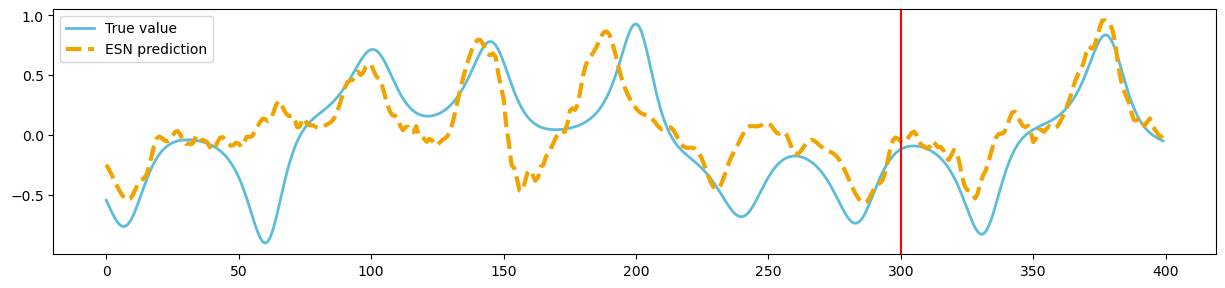

NameError: name 'rmse' is not defined

In [9]:
#Первый тестовый набор параметров 
units = 800
leak_rate = 0.5
spectral_radius = 0.6
input_scaling = 3.5
connectivity = 0.51
input_connectivity = 0.81
regularization = 1.00000001e-08
seed = 1734



#узел резервуара
reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                      lr=leak_rate, rc_connectivity=connectivity,
                      input_connectivity=input_connectivity, seed=seed)
#выходной слой(считывающее устройство)
readout = Ridge(1, ridge=regularization) # 1 - кол-во выходных нейронов
#соединяем узлы и таким образом получаем модель 
esn = reservoir >> readout

#обучение модели
esn = esn.fit(X_train1, y_train1)
#делаем предсказание
y_pred1 = esn.run(X_test1, reset=False)
results(y_pred1, X[train+forecast:])
print(rmse(y_pred1[-100:], X[-100:]))
###HERE1

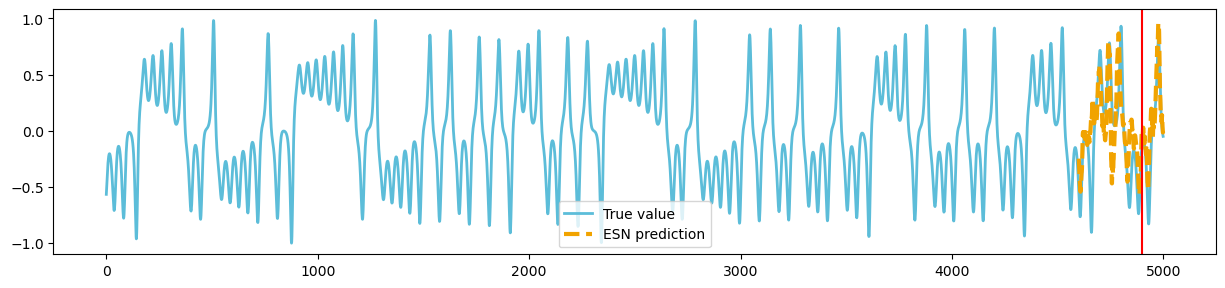

In [10]:
tmp = np.full(5000-len(y_pred1), None)
y_pred1_extended = np.concatenate([tmp.reshape(len(tmp), 1), y_pred1])
results(y_pred1_extended, X)

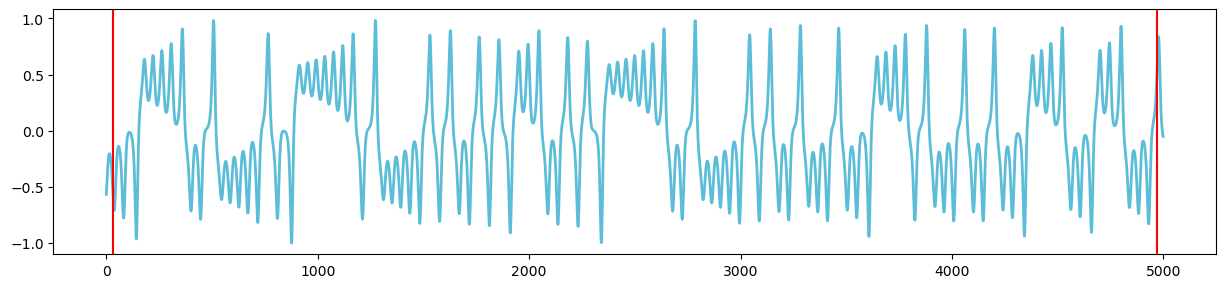

In [2]:
def results(y_test):
    fig = plt.figure(figsize=(15, 7))
    ax = plt.subplot(211)
    ax.plot(np.arange(len(y_test)), y_test, lw=2, color="#5cbdd9")
    #ax.plot(np.arange(len(y_pred)), y_pred, lw=3, label="ESN prediction", color="#f1a300", linestyle="--")
    ax.axvline(x=len(y_test)-30, color="red")  # Add vertical line
    ax.axvline(x=30, color="red")  # Add vertical line
   
    plt.show()

results(X)

Running Model-8: 490it [00:00, 1570.34it/s]           


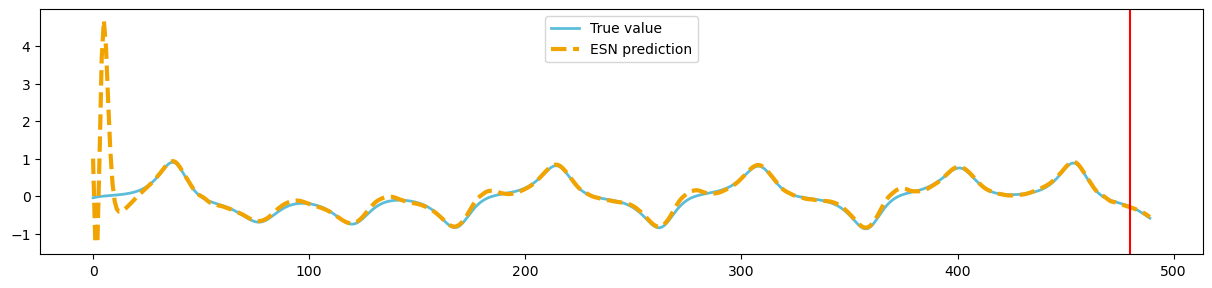

In [25]:
dt = 0.01
x0 = [-1.0, 0.1, 0.0]

#000
x1 = data.lorenz(length=6500, sample=dt, x0=x0,
               sigma=16.0, beta=4.0, rho=45.92)[1]

#11
import copy
time = copy.deepcopy(x1) 
X1 = time[:,0] 
X1 = X1.reshape(6500,1) 
X1 = 2 * (X1 - X1.min()) / (X1.max() - X1.min()) - 1 
#000
    
X = X1[:5000]
    
###HERE0
from reservoirpy.datasets import to_forecasting

x, y = to_forecasting(X, forecast=forecast)

X_train1, y_train1 = x[:train], y[:train]
X_test1, y_test1 = x[train:], y[train:]

y_pred1 = esn.run(X_test1, reset=False)
results(y_pred1, X[train+forecast:])

###HERE1